In [2]:

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

import math
import astropy
print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes

from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
print('reproject',reproject.__version__)
import spectral_cube
print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
import gc
import mpdaf
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
from astrodendro.analysis import PPVStatistic


print(astrodendro.__file__)

from matplotlib.patches import Ellipse
#%matplotlib widget

/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
reproject 0.8
spectral_cube 0.6.1.dev22+g003ef16
/home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py


Clean Notebook for NGC253

Featuring:

NOT HCO+ 4-3
HCN 4-3
H13CN 4-3

HCN_J1-0
HCO+_J1-0
H13CO+_J1-0

NOT _and_SiO_J2-1
H13CN_J1-0
CO_J3-2

NOR
CCH_N1-0
HC3NJ11-10

Part 1: Updates

Part 2: File Reads, Integrated Maps

Part 3: Image Ratios

Part 4: Channel Maps

Part 5: PV Plots

Part 6: Reporojection

Part 7: Spectra

Part 8: Dendograms

# Part 1: Updates

In [1]:

#!py -m pip uninstall astropy
#!py -m pip install git+https://github.com/astropy/astropy
#!pip install pycopy-copy
!pip install reproject
'''


!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git
!py -m pip install reproject
!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git 
!py -m pip install pyspeckit
!py -m pip install regions
!py -m pip install astrodendro
!py -m pip  install wcsaxes 
!py -m pip  install ipympl
!py -m pip install dask
!py -m pip install radio_beam
!py -m pip install casa_formats_io
#try:
#    !pip install casa_formats_io --no-binary :all:
#except:
#    !pip install casa_formats_io --no-cache --no-binary :all:

!py -m pip  install spectral_cube 
!py -m pip  install typing 
!py -m pip install mypy
!py -m pip  install typing_extensions 
'''
#!pip install mpdaf


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


'\n\n\n!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git\n!py -m pip install reproject\n!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git \n!py -m pip install pyspeckit\n!py -m pip install regions\n!py -m pip install astrodendro\n!py -m pip  install wcsaxes \n!py -m pip  install ipympl\n!py -m pip install dask\n!py -m pip install radio_beam\n!py -m pip install casa_formats_io\n#try:\n#    !pip install casa_formats_io --no-binary :all:\n#except:\n#    !pip install casa_formats_io --no-cache --no-binary :all:\n\n!py -m pip  install spectral_cube \n!py -m pip  install typing \n!py -m pip install mypy\n!py -m pip  install typing_extensions \n'

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    3                                                  NAXIS1  =                  765                                                  NAXIS2  =                  165                                                  NAXIS3  =                  200                                                  COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H LBOUND1 =                 -524 / Pixel origin along axis 1                      LBOUND2 =                 -124 / Pixel origin along axis 2                      LBOUND3 =                 -366 / Pixel origin along axis 3                      LABEL   = 'T%s60+%v30+A%^50+%<20+*%+   corrected antenna temperature' / Label ofBUNIT   = 'K       '           / Units o

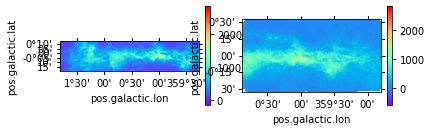

In [6]:
#path = 'HCOp_J1-0.cube.fits'

#path = "HC3N_11_10.fits"
path = "Fixed_Spliced_CO_V2.fits"
path2 = "12CO_GC_359-000_mosaic.fit"
sc = SpectralCube.read(path)
sc2 = SpectralCube.read(path2)
print(sc.header)
scW = sc.wcs[:][:][0]
scW2 = sc2.wcs[:][:][0]

vel,NA,na = sc.world[:,0,0]
print("!")
ax1 = pylab.subplot(2,2,1,projection=scW) 
RA1 = ax1.coords[0]                                                                  # 
Dec1 = ax1.coords[1]
im1 = pylab.imshow(sc.moment0().hdu.data,cmap='rainbow')
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04) 
ax2 = pylab.subplot(2,2,2,projection=scW2) 
RA2 = ax2.coords[0]                                                                  # 
Dec2 = ax2.coords[1]
im2 = pylab.imshow(sc2.moment0().hdu.data,cmap='rainbow')
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04) 
print("A")

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  765                                                  NAXIS2  =                  165                                                  NAXIS3  =                  332                                                  BLANK   =                   -1  /                                               BUNIT   = 'K       '  /                                                         CELLSCAL= 'CONSTANT'  /                                                         RESTFREQ=    8.86318473000E+10  /                                               BMAJ    =    1.08300000429E-02  /                                               BMIN    =    1.08300000429E-02  /                                               DATAMIN =   -3.23498272896E+00  /       

Text(0.02, 0.91, 'Moment 0 u')

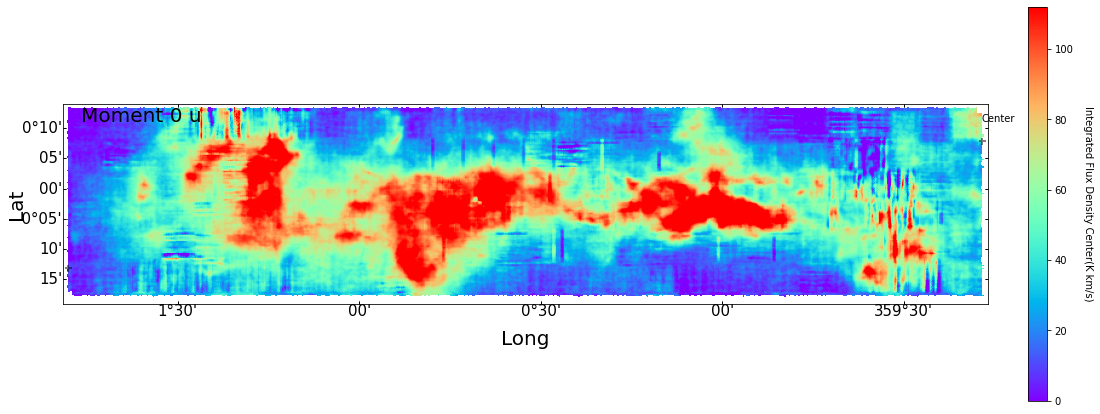

In [34]:



#path = 'H8_continuum.pbcor.fits'
#path = "ADP.2016-01-20T15:35:07.077.fits"

paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V2.fits"])
path = paths[1]
#Best
#path="12CO_GC_001-002_mosaic.fit"
#path="12CO_GC_359-000_mosaic.fit"
#path='CMZ_CO_3_2_Left.cube.reproject.K-kms.pbcor.fits'
#path='CMZ_CO_3_2_Right.cube.reproject.K-kms.pbcor.fits'
#path='Spliced_CO_V2.fits'
cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
print(cheader)
print(cube[0][0][0])
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True
scW = cube.wcs[:][:][0]
print((scW.pixel_to_world(0,0)))
print((scW.pixel_to_world(765,165)))
print(np.shape(cube))
scWCS = cube.wcs[:][:][0]
########
fig1 = pylab.figure(1,figsize=(60,60))
######Moment 0 and Max map
#print(cube[0][0])
moment_0_sub=cube.moment0()
ax3 = pylab.subplot(3,3,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]

print(moment_0_sub[0][0])
im3 = pylab.imshow(moment_0_sub.hdu.data,vmin=0,vmax=np.nanmax(moment_0_sub.hdu.data)*.5,cmap='rainbow')
center = SkyCoord('01d48m00s','-00d13m00s', frame='galactic')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
center = SkyCoord('0359d17m00s','00d08m00s', frame='galactic')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Long',fontsize=20,labelpad=1)                               
pylab.ylabel('Lat',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.02,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


-0.038981941689097646 Jy / beam
(165, 765)
nan Jy / beam
nan Jy
(165, 765)
nan Jy


Text(0.5, 1.0, 'cont+')

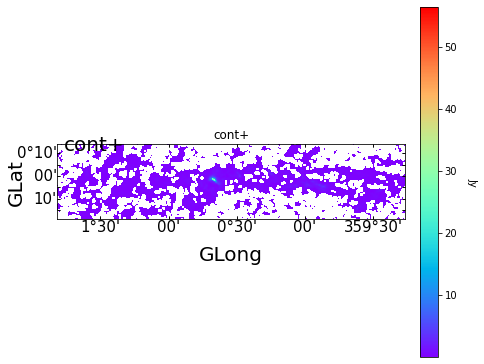

In [63]:
#Continuum
#path='ngc253_850_micron_dust.fits'
path ="ADP.2016-01-20T15:35:07.077.fits"
#path = 'HCOp_J1-0.cube.fits'
path='CMZ_Continuum_Splice.fits'
scP = spectral_cube.Projection.from_hdu(fits.open(path)[0])
#scP = SpectralCube.read(path)
print(scP[0][0])
header = scP.hdu.header
#scP = cube.apply_numpy_function(np.nansum,axis=0) #Load the important axes
scWCS = scP.wcs[:][:]
scW= scWCS
bp=np.where(scP<=0)
scP[bp]=np.nan
#print(scP.hdu.header)


print(np.shape(scP))
#make metadata for the dendrogram

metadata = {}
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
metadata['spatial_scale'] = abs(header["CDELT1"])*u.degree
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x'] 

#scP.to(u.Jy)
print(scP[0][0])
scP = scP/beam_area_ratio*u.beam*u.pix**2#Beam area ratio is pix**2/beam
print(scP[0][0])
#scW = scP.wcs


print(np.shape(scP))
print(scP[0][0])

subcube = scP[:][:]#[raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube


subcube.allow_huge_operations=True






########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(scP.hdu.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
pylab.ylabel('GLat',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Jy',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='cont+',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax3.set_title("cont+")

#fig1.savefig(bbox_inches='tight',fname="NGC253_HCO+_4-3_Integrated_Full_Note.jpeg")


# Part 8: Dendograms

46.730308958058274 46.730308958058274 nan Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits
() 46.730308958058274 (166, 20, 25)
52.16748192739124 52.16748192739124 nan Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits
() 52.16748192739124 (166, 20, 25)
0.0001694834071278174 0.0001694834071278174 nan Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits
() 0.0001694834071278174 (100, 20, 25)
26.529557329446376 26.529557329446376 nan Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits
() 26.529557329446376 (100, 20, 25)
0.6080490683549578 0.6080490683549578 nan Fixed_Spliced_CO_V3.fits
() 0.6080490683549578 (101, 16, 20)
5 5 0 5
(3, 3411573)
166
(3, 3925460)
166
(3, 575457)
166
(3, 1559953)
166
(3, 1979249)
166
(166, 165, 765)
(166, 165, 765)


Text(0.02, 0.91, 'Confidence')

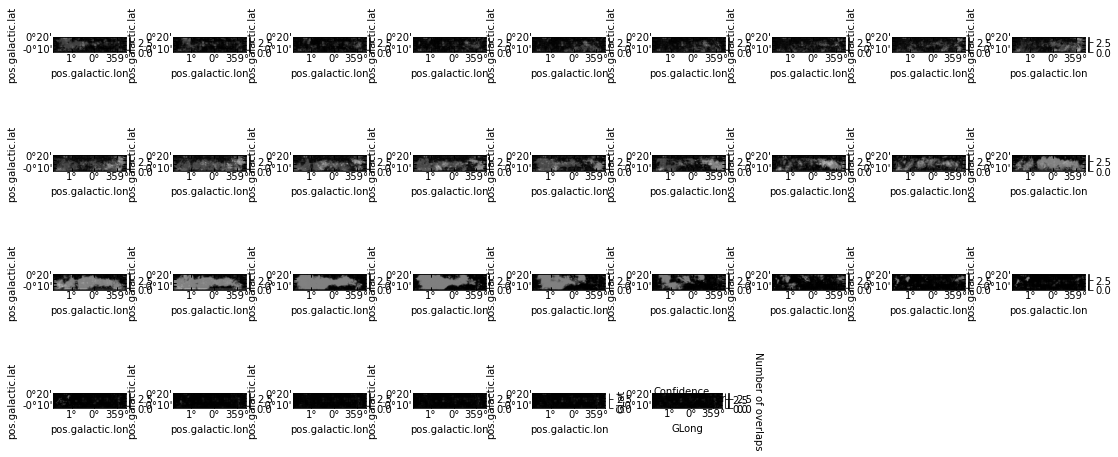

In [11]:
#Create a mask for all the cubes. 

###################No #If there is another cube that shares at least 67% of the structure, a structure is not to be masked.

#If there are multiple pixels that have greater than 3 sigma emission we will keep them (at most  (1-.95)**2 chance of incorrect label)

#Assign greater confidence to more overlaps



paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V3.fits"])
#paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V2.fits"])



FP = pylab.array(['CMZ_3mm_HCO+.fits','CMZ_3mm_HCN.fits','CMZ_3mm_H13CN.fits','CMZ_3mm_H13CO+.fits',"Spliced_CO_V3.fits" ])





SCWs=[]
cds=[]
Ns = [] #get sigmas for all cubes
Absorbtion_mask="No"

#Find noises for first cubes
for i in range(len(FP)):
    sc = SpectralCube.read(paths[i])#FP[i])  
    
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
    
    sc_slabP = sc_kms.spectral_slab(-300. *u.km / u.s, 300. *u.km / u.s)  # Crop out velocities we don't care about    
    
    sc_slabP.allow_huge_operations=True    
    
    sc_slab = sc_slabP.downsample_axis(2,axis=0)
    
    sc_slab.allow_huge_operations=True    
    
    sc_K_kms = sc_slab#.to(u.K)
    
    scW = sc_K_kms.wcs[:][:][0]

    #Find Noise 
    Np1 = SkyCoord('359d40m00s',  '00d04m00s', frame='galactic')#These are away from the sources
    Np2 = SkyCoord('359d35m00s','00d08m00s', frame='galactic')
    
    
    NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
    NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
    
        
    
    no = 3
    m=0
    while(True):

        Q = sc_K_kms[int(len(sc_K_kms)-no):len(sc_K_kms),:,:]#NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
        #Nsc1 = Q.unmasked_copy()
        
        Nsc1 = sc_K_kms[0:335,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
        #print(np.shape(Nsc1))
        if(Absorbtion_mask=="Yes"):
            bp = np.where(Nsc1.hdu.data<0)
            Nsc1.hdu.data[bp]=np.nan
        #print((Nsc1[0]))
            
        #Find StandardDev of this noise cube
        #m=Nsc1.std(axis=0)/u.K
        m=np.nanmean(np.nanstd(Nsc1.hdu.data,axis=0))#RMS noise over all channels
        #print(m)
        no+=1
        if(float(np.nanmax(m))!=0.0 and str(float(np.nanmax(m))) != str(np.nan)):
            print(float(np.nanmax(m)),str(float(np.nanmax(m))), str(np.nan),paths[i])
            break
            
    print(np.shape(m),m,np.shape(Nsc1))
    
    Ns.append(m)
    
#Find noises for pre-masked cubes

'''
for i in range(len(FP)-3,len(FP)):
    sc = SpectralCube.read(FP[i])  
    
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
    
    sc_slab = sc_kms.spectral_slab(-500. *u.km / u.s, 1000. *u.km / u.s)  # Crop out velocities we don't care about    
    sc_slab.allow_huge_operations=True    
    
    sc_K_kms = sc_slab.to(u.K)
    
    scW = sc_K_kms.wcs[:][:][0]

    #Find Noise. Should be the minimum value since it must be at least 3 sigma to be unmasked
    
    Nsc1 = sc_K_kms.unmasked_copy()
    
    
    bp = np.where(Nsc1.hdu.data<=0)
    
    Nsc1.hdu.data[bp]=np.nan
    m=np.nanmin(Nsc1)/u.K
    print(m,np.shape(Nsc1))
    Ns.append(m)
'''  
    
#print(Ns)

for i in range(1):
    cubeP=SpectralCube.read(paths[i])
    
    cubeP.allow_huge_operations=True
    
    cube = cubeP.downsample_axis(2,axis=0)
    
    #print(cube.hdu.header)
    #print(cube.max(axis=0)[0][0]/u.K,Ns[i][0][0])
    #spatial_mask = cube.max(axis=0)/u.K > 3*Ns[i]        
    
    #cubeM = cube.with_mask(spatial_mask)
    #print(np.shape(cube),np.shape(cubeM))
    cd = cube.hdu.data
    #cds.append(cd)
    #print(len(cds))
    #SCWs.append(cube.wcs[:][:][0])

Confidences=cd
Abs_Mask=cd
pix = np.where(Confidences != 0)
Confidences[pix] = 0 
Abs_Mask=np.copy(Confidences)
H13CN_MASK = np.copy(Confidences) 
H13COP_MASK = np.copy(Confidences) 
#print(Confidences.shape)
print(len(paths),len(FP),len(cds),len(Ns))

for i in range(len(paths)):
    cube=SpectralCube.read(paths[i]).downsample_axis(2,axis=0)
    
    cd = cube.hdu.data
    if(Absorbtion_mask=="No"):
        GP = np.where(abs(cd)>Ns[i]*2)#No abs for only emission
    if(Absorbtion_mask=="Yes"):
        GP = np.where(cd>Ns[i]*2)#No abs for only emission
    NP = np.where(cd<0)  
    if(i ==0):
        H13COP_MASK[GP] = 1#Mask for H13CO, only using HCO as a mask
        np.save('H13COP_MASK',H13COP_MASK)
    if(i ==1):
        H13CN_MASK[GP] = 1#Mask for H13CN, only using HCN as a mask
        np.save('H13CN_MASK',H13CN_MASK)

    print(np.shape(GP))
    print(len(Confidences))
    Confidences[GP]+=1
    Abs_Mask[NP]+=1

print(Confidences.shape)


   
print(Confidences.shape)

#Create a plot of all the confidence values

fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
#print(SCWs[0])
#print(Confidences.shape)0
for n in np.arange(0,int(len(Confidences)/5)):   
    
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(9,9,n+1,projection=scW) # We plot them in a grid    
    #im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    RA.set_ticks(size=-3)                                                                                      
    Dec.set_ticks(size=-3) 
    RA.set_ticklabel(exclude_overlapping=True) 
    Dec.set_ticklabel(exclude_overlapping=True)
    im = pylab.imshow(np.nanmean(Confidences[n*5:5*n+5],axis=0),cmap='gray',vmin=0,vmax=4)
    cb=pylab.colorbar(im,fraction=0.01,pad=0.04)  
    pylab.tight_layout(w_pad=2,h_pad=1)

'''
ax = pylab.subplot(1,1,1,projection=SCWs[0]) 
RA = ax.coords[0]                                                                  # 
Dec = ax.coords[1]
im = pylab.imshow(Confidences[int(len(Confidences)*.5)],cmap='rainbow')
'''

np.save('Confidence_data_CMZ',Confidences)

np.save('Noises_K_CMZ',Ns)

np.save('Absorption_Pixels_CMZ',Abs_Mask)
#Define common structures

center = SkyCoord(l=359.94487501*u.degree,b=-00.04391769*u.degree, frame='galactic')
y,x = [int(scW.world_to_pixel(center)[0]),int(scW.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=10,labelpad=1)                               
pylab.ylabel('GLat',fontsize=10,labelpad=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)    
cb=pylab.colorbar(im,fraction=0.01,pad=0.04)                                     
cb.set_label(label='Number of overlaps',fontsize=10,rotation=270,labelpad=15) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Confidence',fontsize=10,xy=(0.02,0.91),xycoords="axes fraction")  



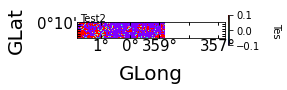

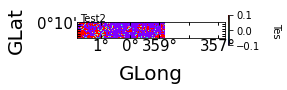

In [12]:

#Create a function that uses the dendrogram input to calculate all the quantities, and has the size and linewidth requirements of the Shetty paper
#Requires the computed dendrogram, the data from the line image, the velocity axis, and the data from the Continuum image, as well as metadata for the structures
#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
#Continuum is in Jansky/Beam, Line data should have the unit specified in the metadata as 'data_unit'
#vel,RA,Dec = scF.world[:,0,0]
def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata,Dust=True):
    SizeA,SigmaA,LuminA,CDA,SIDS,MOM0_FLUX = [[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]
    
    center = SkyCoord(l=359.94487501*u.degree,b=-00.04391769*u.degree, frame='galactic')
    x,y = [metadata["Cwcs"].world_to_pixel(center)[0],(metadata["Cwcs"].world_to_pixel(center)[1])]

    for t in Dendrogram.all_structures: 

        I = t.indices()
        Cont = True
        try:
            if(str(t.descendants[0].descendants[0].descendants[0]).find("branch") != -1):
                Cont = False#False #If we find a branch inside this structure t, then it is at least order two and will be discarded
                #order 4
        except:
            lop=12

        if(Cont and t.get_npix()<50**2*10):
            s = PPVStatistic(t,metadata=metadata)
            nproj_pix=len(set(zip(*tuple(I[i] for i in [1,2]))))
            #print(nproj_pix,(set(zip(*tuple(I[i] for i in [1,2])))))
            v_IWM = np.nansum(LineData[I]*DataVel[I[0]]/u.km*u.s)/np.nansum(LineData[I])
            sig_Sh = np.sqrt(np.nansum(LineData[I]*(DataVel[I[0]]/u.km*u.s-v_IWM)**2)/np.nansum(LineData[I])) 
            x_cent = s.x_cen/u.pix
            y_cent = s.y_cen/u.pix

            d0 = 8.178 *10**-3*u.Mpc #mpc
            D_E = d0/u.Mpc#np.sqrt(d0**2 + (d0*np.tan(u.rad*metadata['arc_per_pix']*(np.sqrt((x_cent-x)**2+(y_cent-y)**2))/3600*np.pi/180/u.arcsec*u.pix))**2 )/u.Mpc
            area_res=metadata["ARND"]*(np.pi/180*D_E)**2
            #pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_E/u.Mpc

            #Require size greater than the beam and velocity greater than the spectral resolution
            #print(sig_Sh,metadata["velocity_scale"]*u.s/u.km , ((np.sqrt(nproj_pix/np.pi))),np.sqrt(metadata['beam_area_ratio'])/u.pix,((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 )
            #print(s.radius*3600/metadata['arc_per_pix_x']/u.deg*u.arcsec,s.radius,area_res,metadata['beam_area_ratio'],(float((s.radius*np.pi/180*D_E/u.deg))))
            #if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(metadata['beam_area_ratio'])/u.pix and ((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 <24):
            #if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and (s.radius*np.pi/180*D_E/u.deg)>np.sqrt(metadata['beam_area_ratio']*area_res)/u.pix and (s.radius*np.pi/180*D_E/u.deg)*10**6<24):
            #If I require the radius to be larger than the beam I miss the clusters with this definition
            #if(sig_Sh*(s.radius*3600/metadata['arc_per_pix_x']*u.deg/u.arcsec)**2*np.pi>5*metadata["velocity_scale"]*u.s/u.km*metadata['beam_area_ratio'] and (s.radius*np.pi/180*D_E/u.deg)*10**6<24 and sig_Sh>metadata["velocity_scale"]*u.s/u.km):
            #if(sig_Sh*(s.radius*3600/metadata['arc_per_pix_x']/u.deg*u.arcsec)**2>3*metadata["velocity_scale"]*u.s/u.km*metadata['beam_area_ratio'] and (s.radius*np.pi/180*D_E/u.deg)*10**6<20 and sig_Sh>.1 and s.radius*3600/metadata['arc_per_pix_x']/u.deg*u.arcsec>2*u.pix):
            if(s.radius*3600/metadata['arc_per_pix_x']/u.deg*u.arcsec>.25*u.pix and sig_Sh>.1):
                if Dust==True:
                    #The flux from the continuum
                    #Convert to Jansky from Jansky per beam:
                    Cont_Flux=0

                    proj = tuple(set(zip(*tuple(I[i] for i in [1,2]))))
                    #print(x_cent,y_cent,proj)
                    for lmi in range(len(proj)):

                        Cont_Flux+=ContData[proj[lmi]]
                    Cont_Flux=Cont_Flux/(metadata['beam_area_ratioc']*(2*np.sqrt(2*np.log(2))))*u.pix**2*u.beam/u.beam*u.Jy#SHould be input as Jansky /beam and will be converted to Jansky, then to unitless. The beam is changed from FWHM to Gaussian

                    
                    Dust_Column = Flux_to_Mass(Cont_Flux,metadata,D_E=D_E*u.Mpc)*Num_per_kg/((s.radius*np.pi/180*D_E/u.deg)**2*(3.086*10**24)**2)/np.pi*(1.989*10**30*u.kg/u.M_sun)/u.kg
                else:
                    Dust_Column=1
                if(str(Dust_Column)==str(np.nan) and str(Dust_Column) ==str(np.inf)):
                    Dust_Column=1
                lum = Flux_to_Lum(s.flux,metadata,D_E=D_E*u.Mpc)

                #Flux from the strcuture
                s_flux = s.flux
                #FR = s_flux/Cont_Flux

                #Line_Mass=Flux_to_Mass(freq,s_flux)/u.Hz/u.mJy/u.s/u.solMass*u.erg
                #Dust_Mass=Flux_to_Mass(freqC,Cont_Flux)#/u.Hz/u.mJy/u.s/u.solMass*u.erg
                #Dust_Column = Flux_to_Mass(Cont_Flux,metadata,D_E=D_E*u.Mpc)*Num_per_kg/(np.sqrt(nproj_pix*(area_res)/np.pi)**2*(3.086*10**24)**2)/np.pi*(1.989*10**30*u.kg/u.M_sun)/u.kg

                Index = tuple(I[i] for i in [0,1,2])
                K_Km_s_Flux=np.nansum(LineData[Index]*metadata["velocity_scale"])#Find the total flux from the structures in K km/s, assuming the input data is in K as it should be, otherwise it shouldnt realy matter
                    
                #Line_N = (Line_Mass/float(np.sqrt(nproj_pix*(area_res)/np.pi))/u.Mpc).to(u.kg)
                #print(t.idx,t.is_leaf,(float((s.radius*np.pi/180*D_E/u.deg))),(float(sig_Sh)),float(Dust_Column),float(lum*u.Hz*u.s/u.erg),float(K_Km_s_Flux*u.s/u.km))
                if(t.is_leaf):
                    #SizeA[0].append((float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                    SizeA[0].append((float((s.radius*np.pi/180*D_E/u.deg)))) #define size as astrodendro
                    SigmaA[0].append((float(sig_Sh)))#
                    CDA[0].append(float(Dust_Column))
                    LuminA[0].append(float(lum*u.Hz*u.s/u.erg))
                    SIDS[0].append(float(t.idx))
                    MOM0_FLUX[0].append(float(K_Km_s_Flux*u.s/u.km))
                if(t.is_branch	):
                    #SizeA[1].append((float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                    SizeA[1].append((float((s.radius*np.pi/180*D_E/u.deg)))) #define size as astrodendro
                    SigmaA[1].append((float(sig_Sh)))#
                    CDA[1].append(float(Dust_Column))
                    LuminA[1].append(float(lum*u.Hz*u.s/u.erg))
                    SIDS[1].append(float(t.idx))
                    MOM0_FLUX[1].append(float(K_Km_s_Flux*u.s/u.km))
    SizeA[0] = np.array(SizeA[0])
    SizeA[1] = np.array(SizeA[1])
    SigmaA[0] = np.array(SigmaA[0])
    SigmaA[1] = np.array(SigmaA[1])
    CDA[0] = np.array(CDA[0])
    CDA[1] = np.array(CDA[1])
    LuminA[0] = np.array(LuminA[0])
    LuminA[1] = np.array(LuminA[1])
    SIDS[0] = np.array(SIDS[0])
    SIDS[1] = np.array(SIDS[1])
    MOM0_FLUX[0] = np.array(MOM0_FLUX[0])
    MOM0_FLUX[1] = np.array(MOM0_FLUX[1])
    
    return np.array(SizeA),np.array(SigmaA),np.array(CDA),np.array(LuminA),np.array(SIDS),np.array(MOM0_FLUX)

#Make a function to make an image 

#Data to plot, minimum of color bar, maximum, WCS projection for coords, and position of the image in the larger figure
def Make_Plot(Name,Name2,Data,vmin,vmax,WCS,rows,columns,index,show):
    
    axA = np.empty((rows,columns),dtype = type(pylab.subplot(1,1,1,projection=WCS)))
    ax = pylab.subplot(rows,columns,index,projection=WCS) 
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    im = pylab.imshow(Data,vmin=vmin,vmax=vmax,cmap='rainbow')
    RA.set_ticks(size=-3)                                                                                      
    Dec.set_ticks(size=-3) 
    RA.set_ticklabel(exclude_overlapping=True) 
    Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
    pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
    pylab.ylabel('GLat',fontsize=20,labelpad=1)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    cb=pylab.colorbar(im,fraction=0.01,pad=0.02)                                     
    cb.set_label(label=Name,fontsize=10,rotation=270,labelpad=20) 
    cb.ax.tick_params(which = 'major', labelsize = 10)   
    pylab.annotate(s=Name2,fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  
    if(show==True):
        pylab.show()
def Make_Plot_Anno(Name,Name2,Data,vmin,vmax,WCS,rows,columns,index,show,pos1,pos2):
    
    axA = np.empty((rows,columns),dtype = type(pylab.subplot(1,1,1,projection=WCS)))
    ax = pylab.subplot(rows,columns,index,projection=WCS) 
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    im = pylab.imshow(Data,vmin=vmin,vmax=vmax,cmap='rainbow')
    RA.set_ticks(size=-3)                                                                                      
    Dec.set_ticks(size=-3) 
    RA.set_ticklabel(exclude_overlapping=True) 
    Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
    pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
    pylab.ylabel('GLat',fontsize=20,labelpad=1)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    cb=pylab.colorbar(im,fraction=0.016,pad=0.04)                                     
    cb.set_label(label=Name,fontsize=10,rotation=270,labelpad=20) 
    cb.ax.tick_params(which = 'major', labelsize = 10)   
    pylab.annotate(s=Name2,fontsize=10,xy=(pos1,pos2),xycoords="axes fraction")  
    if(show==True):
        pylab.show()
        
        
#Put this up here for the column density map
def Flux_to_Mass(flux,metadata,D_E="NO",D_Name="Pixel_D.npy"):
    
    
    center = SkyCoord(l=359.94487501*u.degree,b=-00.04391769*u.degree, frame='galactic')
    x,y = [metadata["Cwcs"].world_to_pixel(center)[0],(metadata["Cwcs"].world_to_pixel(center)[1])]
    
    D_Es = 8.178 *10**-3*u.Mpc#np.load(D_Name)*u.Mpc
            
    
    
    
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    try:
        if(len(flux)>2):
            L = 4*np.pi*(D_Es*3.086*10**24*u.cm/u.Mpc)**2*flux_erg #Megaparsec is converted to cm
    except:
        
        L = 4*np.pi*(D_E*3.086*10**24*u.cm/u.Mpc)**2*flux_erg #Megaparsec is converted to cm
    
    
    

    
    a_850 = 6.7*10**19*u.erg/u.s/u.Hz/u.M_sun #6.7+-1.7
    
    aCO3_2 = 2.2*u.M_sun/u.pc**2/(u.K*u.km/u.s)#from nico
    aCO3_2 = aCO3_2*(3.086*10**18*u.cm/u.pc)**2#solar mass per cm^2 per K km/s
    M_mol = L/a_850#Just in Solar mass   *1.989*10**30*u.kg/u.M_sun#Determines mass of the cont for 850 in kg
    return M_mol
def Flux_to_Lum(flux,metadata,D_E="NO",D_Name="Pixel_D.npy"):
    
    center = SkyCoord(l=359.94487501*u.degree,b=-00.04391769*u.degree, frame='galactic')
    x,y = [metadata["Cwcs"].world_to_pixel(center)[0],(metadata["Cwcs"].world_to_pixel(center)[1])]
    
    D_Es =  8.178 *10**-3*u.Mpc#np.load(D_Name)*u.Mpc
    
    
    
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    try:
        if(len(flux)>2):
            L = 4*np.pi*(D_Es*3.086*10**24*u.cm/u.Mpc)**2*flux_erg #Megaparsec is converted to cm
    except:
        
        L = 4*np.pi*(D_E*3.086*10**24*u.cm/u.Mpc)**2*flux_erg #Megaparsec is converted to cm
    
    
    return L


def Find_Pixel_D(flux,metadata,sub = "Nope"):
    center = SkyCoord(l=359.94487501*u.degree,b=-00.04391769*u.degree, frame='galactic')
    
    x,y = [metadata["Cwcs"].world_to_pixel(center)[0],(metadata["Cwcs"].world_to_pixel(center)[1])]
    d0 = 8.178 *10**-3*u.Mpc #mpc
    D_Es = np.empty(np.shape(flux))
    for lmi in range(len(flux)):
        for lmj in range(len(flux[lmi])):
            #Find the distance to earth from every pixel
            #No longer do that, assume d0 for each pixel
            D_Es[lmi][lmj] = d0/u.Mpc#np.sqrt(d0**2 + (d0*np.tan(u.rad*metadata['arc_per_pix']*(np.sqrt((lmj-x)**2+(lmi-y)**2))/3600*np.pi/180/u.arcsec*u.pix))**2 )/u.Mpc#Has to be unitless so it saves, so bring the unit back when it is loaded
            
    #print(D_Es)
    if(sub=="Nope"):
        np.save("Pixel_D",D_Es)
    else:
        np.save(sub,D_Es)
pathCont = 'CMZ_Continuum_Splice.fits'
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
scContW = scCont[30:np.shape(scCont)[0]-30,20:np.shape(scCont)[1]-20] # Make a subcube
metadata = {}
metadata["Cwcs"] = scContW.wcs
metadata["arc_per_pix"]= abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix

Find_Pixel_D(scContW.hdu.data,metadata)

#Return a cropped cube for some ra and dec, also crops the velocity axis if needed (0 for no crop)
def Crop(cube,WCS,Np1,Np2,BadVel,D2):
    NraDP1 = [int(WCS.world_to_pixel(Np1)[0]),int(WCS.world_to_pixel(Np1)[1])]
    NraDP2 = [int(WCS.world_to_pixel(Np2)[0]),int(WCS.world_to_pixel(Np2)[1])]
    if(D2==False):
        return cube[BadVel:np.shape(cube)[0]-BadVel,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]
    if(D2==True):
        return cube[NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]
    
Make_Plot("Tes","Test2",Q.moment0().hdu.data,0,0,Q.wcs[:][:][0],2,2,1,True)
Make_Plot("Tes","Test2",Q.moment0().hdu.data,0,0,Q.wcs[:][:][0],2,2,2,True)

In [19]:
Names=[1,2,3,4,5,6,7,8,9,10,11]

#Bars = np.load("CZM_Beam_Area_Ratios.npy")
#NBars = np.load("NGC_Beam_Area_Ratios.npy")

#SpecRes = np.load("CZM_Sres.npy")
#NSpecRes = np.load("NGC_Sres.npy")

In [4]:
#Splice the continuum cubes

import sys

import math
import astropy
#print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes

from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
#print('reproject',reproject.__version__)
import spectral_cube
#print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
import gc
import mpdaf
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from astrodendro.analysis import PPVStatistic


#print(astrodendro.__file__)

from matplotlib.patches import Ellipse





#Splice the continuum cubes

pathCont = 'CMZ_Continuum_Reproject.fits'

#Continuum image Right
scContR = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])

pathCont = 'CMZ_Continuum_Reproject_Left_Half.fits'
#Continuum image Left
scContL = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])


L = np.copy(scContL.hdu.data)
R = np.copy(scContR.hdu.data)
C = np.copy(L)
header = scContL.header
pathWCS= 'cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits'
sss  =SpectralCube.read(pathWCS)[0:1]
wcs = sss.wcs

for lmi in range(len(R)):

    for lmj in range(len(R[lmi])):
            C[lmi][lmj] = np.nanmean([R[lmi][lmj],L[lmi][lmj]])
    print(lmi)
hdu = scContL.hdu
C = np.array([C,C])
print(np.shape(C))
Comb = SpectralCube(data=C, wcs=wcs,header=header)*u.Jy/u.beam

print(Comb)
Comb=Comb[0]
print(Comb)
Comb.write('CMZ_Continuum_Splice.fits',overwrite=True) 
print(C[1],"JJ",Comb.hdu.data[1])



(165, 765) ()
[['' '' '' ... 'B' 'B' 'B']
 ['' '' '' ... 'B' 'B' 'B']
 ['' '' '' ... 'B' 'B' 'B']
 ...
 ['' '' '' ... 'B' 'B' 'B']
 ['' '' '' ... 'B' 'B' 'B']
 ['' '' '' ... 'B' 'B' 'B']]
[ 0.06291707 -0.02281309 -0.0290147  ...         nan         nan
         nan] Jy / beam


NameError: name 'Comb' is not defined

In [ ]:
#Splice Chimps2

import sys

import math
import astropy
#print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes

from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
#print('reproject',reproject.__version__)
import spectral_cube
#print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
import gc
import mpdaf
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from astrodendro.analysis import PPVStatistic


#print(astrodendro.__file__)

from matplotlib.patches import Ellipse

pathL='CMZ_CO_3_2_Left.cube.reproject.K-kms.pbcor.fits'
pathR='CMZ_CO_3_2_Right.cube.reproject.K-kms.pbcor.fits'
SCR = SpectralCube.read(pathR)
SCL=SpectralCube.read(pathL)

RD = SCR.hdu.data
LD=SCL.hdu.data


C = np.copy(LD)
wcs = SCR.wcs
header=SCR.hdu.header
hdu=SCR.hdu
world=SCR.world
#Comb = (SCR.unmasked_copy())
#Comb = np.copy(SCR.hdu.data)

#for lmi in range(1):

#for lmi in range(2):
print(header)
for lmi in range(len(RD)):

    for lmj in range(len(RD[lmi])):

        
        
        
        #for lmk in range(2):
        for lmk in range(len(RD[lmi][lmj])):
            C[lmi][lmj][lmk] = np.nanmean([RD[lmi][lmj][lmk],LD[lmi][lmj][lmk]])
    print(lmi)

#C = SpectralCube.read("Spliced_CO.fits").hdu.data
Comb = SpectralCube(data=C, wcs=wcs,header=header)*u.K
#Comb.hdu.data=C
print(C[1],"JJ",Comb.hdu.data[1])
#print(Comb.hdu.data[0][0][0])

Comb.write("Spliced_CO_V2.fits",overwrite=True)



[INFO]                     filename                     ...           crval          
[INFO] ------------------------------------------------ ... -------------------------
[INFO]  CMZ_CO_3_2_Left.cube.reproject.K-kms.pbcor.fits ... [ 0.54166668 -0.04166667]
[INFO] CMZ_CO_3_2_Right.cube.reproject.K-kms.pbcor.fits ... [ 0.54166668 -0.04166667]
[INFO] Detailed information per file:
[INFO] 332 x 165 x 765 Cube (CMZ_CO_3_2_Left.cube.reproject.K-kms.pbcor.fits)
[INFO] .data(332 x 165 x 765) (K), no noise
[INFO] center:(-00:02:30.0000166,00:02:10.00000289) size:(1980.000",9180.001") step:(12.000",12.000") rot:-0.0 deg frame:
[INFO] wavelength: min:-299.58 max:300.15 step:1.81 km / s
[INFO] 332 x 165 x 765 Cube (CMZ_CO_3_2_Right.cube.reproject.K-kms.pbcor.fits)


None


[INFO] .data(332 x 165 x 765) (K), no noise
[INFO] center:(-00:02:30.0000166,00:02:10.00000289) size:(1980.000",9180.001") step:(12.000",12.000") rot:-0.0 deg frame:
[INFO] wavelength: min:-299.58 max:300.15 step:1.81 km / s


In [ ]:
import glob
cubes = glob.glob('CMZ_CO_3_2_*')
from mpdaf.obj import CubeList
l = CubeList(cubes)
print(l)
cube, expmap, statpix = l.median()

HCOp-J1_Dend_CMZ HCOp-J1_Dend_CMZ
HCOp-J1_Dend_CMZ
Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits
46.730308958058274
(28, 165, 765) (28, 165, 765)
(18, 105, 725) (105, 725)


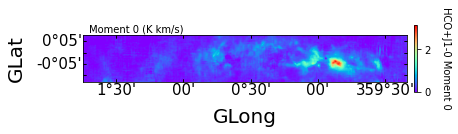

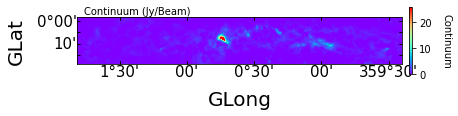

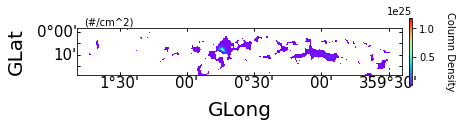

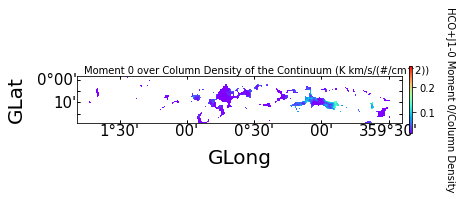

[42] [78] (155, 100)
<class 'float'> <class 'float'> 0.4


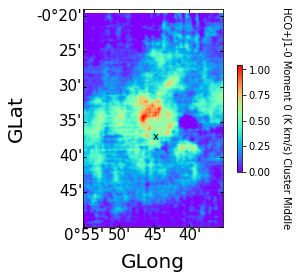

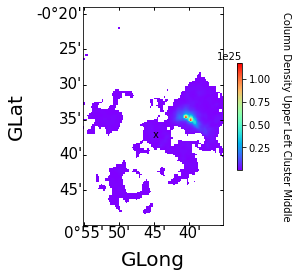

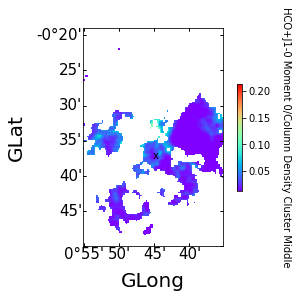

-0.024660746681633632

89188523000.0 Hz
38.98800015444 arcsec 38.98800015444 arcsec
11.960897802424157 pix2
(402,)
2676.682373046875
(98,)
(98,) (98,)
[3.05963147 0.00666502] [[ 0.2114242  -0.03223088]
 [-0.03223088  0.00542411]] Size Linewidth All_structures:
a =  3.05963147463173 +- 0.4598088760592904
b =  0.006665022218047091 +- 0.07364857709991075
[8.61328811e+28 1.89538756e+00] [[ 6.22511260e+56 -2.81196679e+27]
 [-2.81196679e+27  1.27678116e-02]] Radius to Luminosity:
c =  8.613288112222985e+28 +- 2.4950175557586076e+28
d =  1.8953875557491342 +- 0.11299474144978605
[3.75161902e-05 2.06941010e-01] [[ 1.50590299e-06 -7.50464046e-04]
 [-7.50464046e-04  3.74015816e-01]] Column Density to linewidth^2/size:
e =  3.75161901908702e-05 +- 0.001227152392065446
f =  0.20694100973801266 +- 0.6115683250036201
(98,) (98,) (0,) (0,) (98,) (98,) <class 'numpy.ndarray'>
(15,) (15,)
[0.46426185 1.16227583] [[ 0.03255532 -0.04409452]
 [-0.04409452  0.06059311]] Size Linewidth Region of Interest:
a

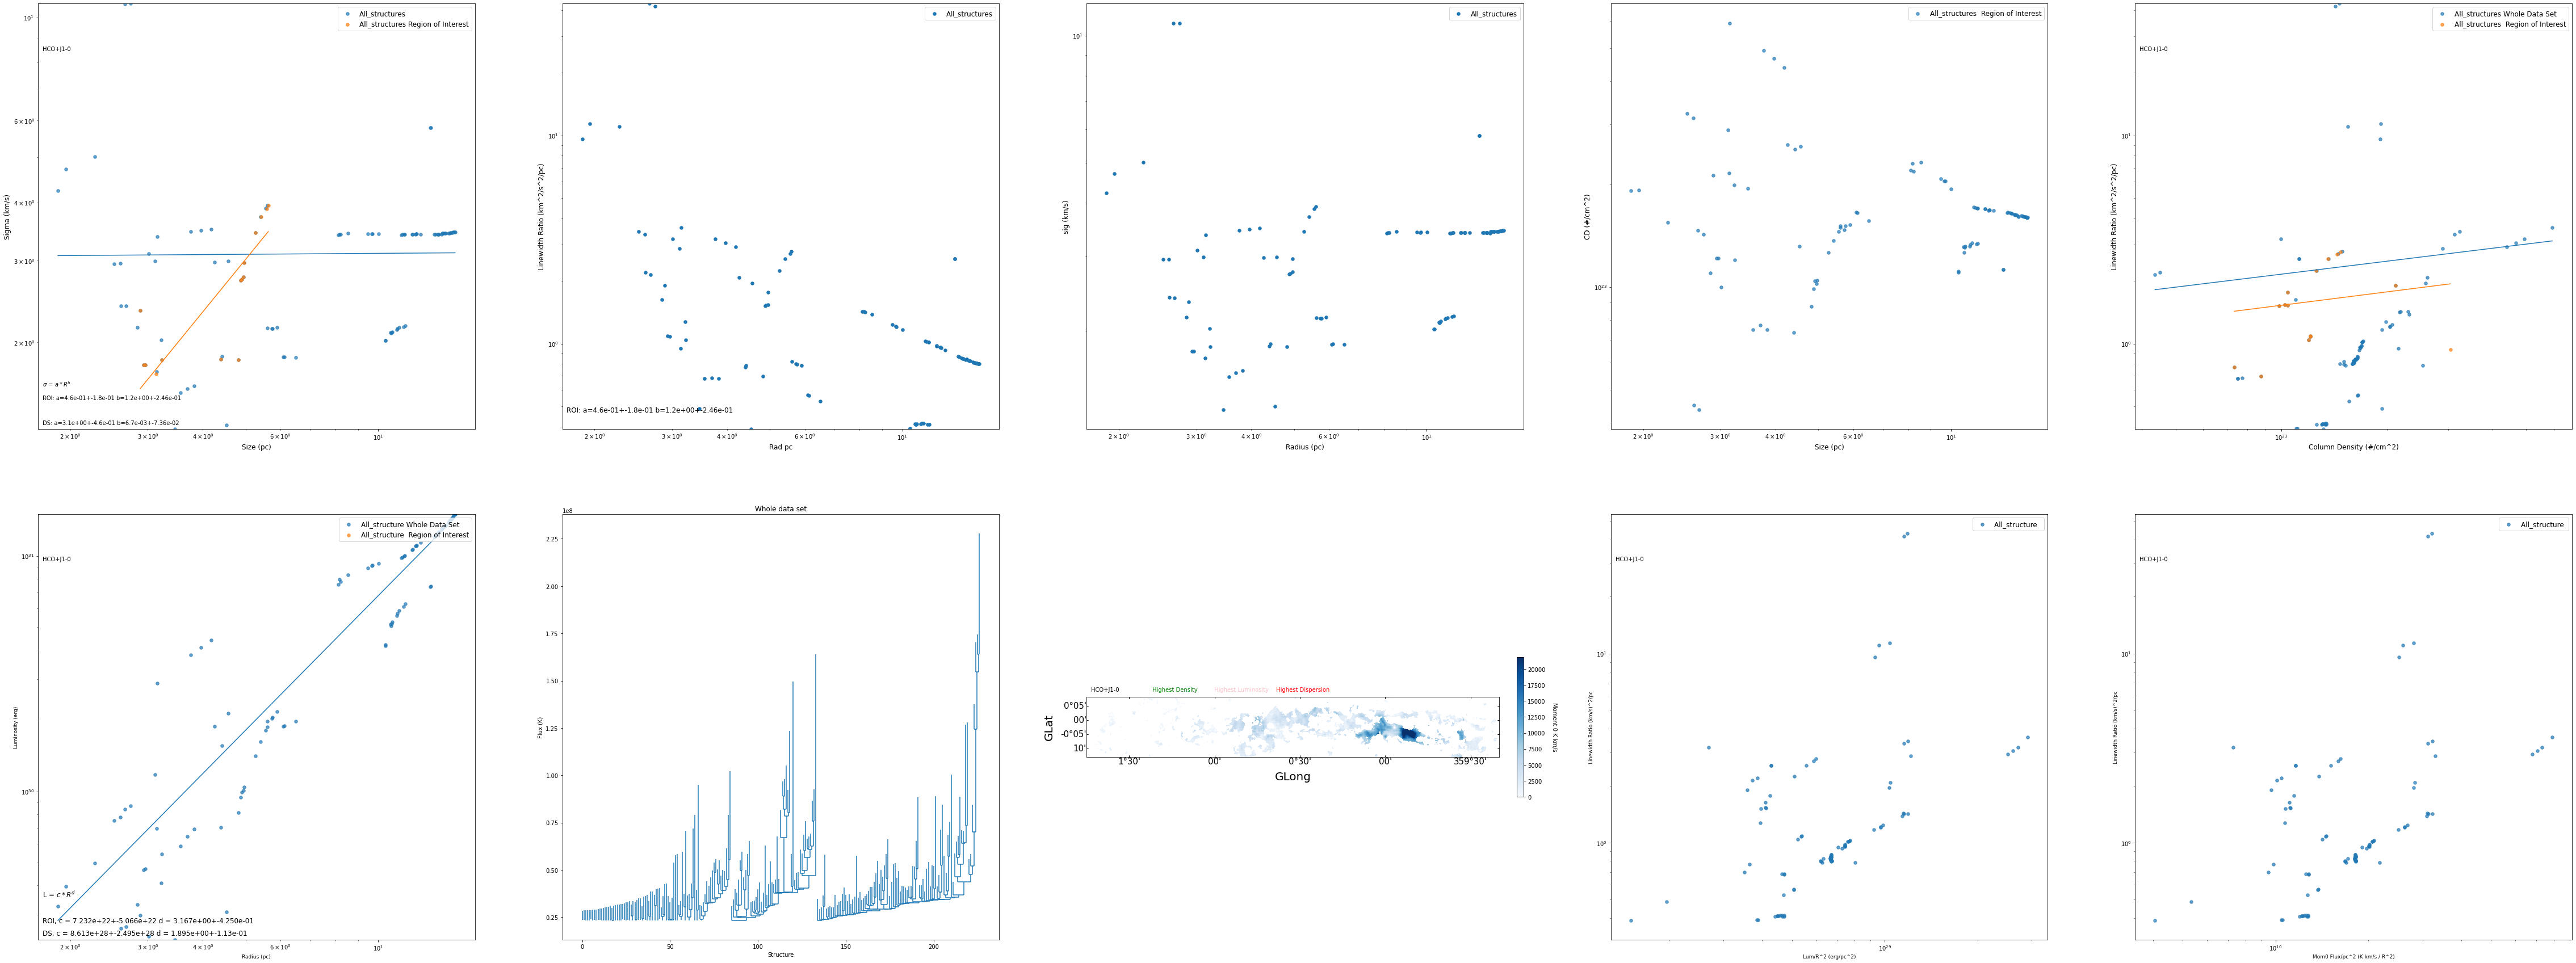

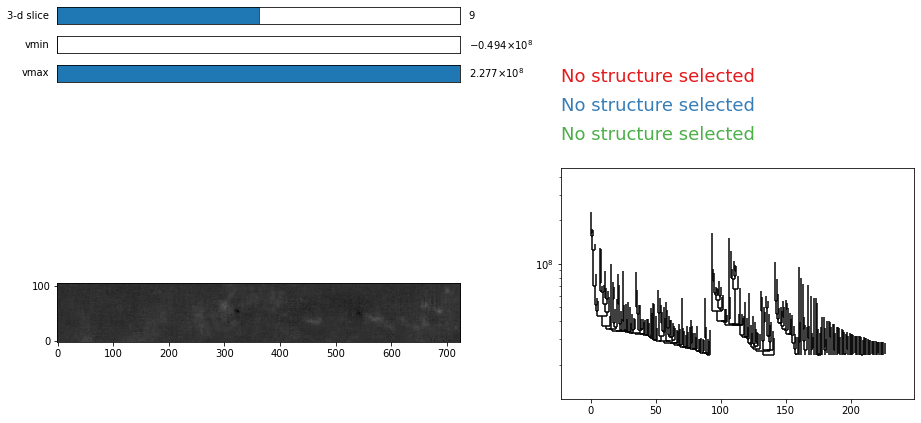

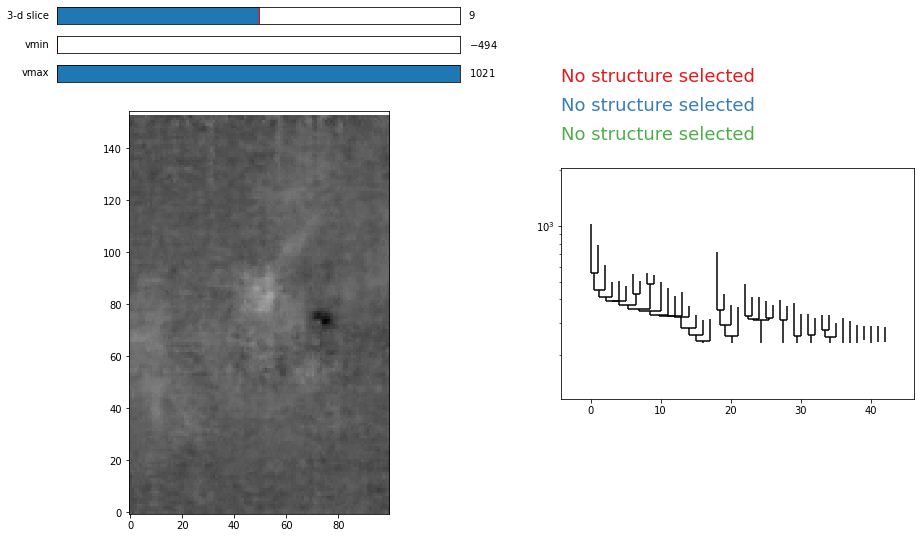

In [127]:
#HCOp
Num = 0
Overlaps=0
Ram_Limiter = .1
Name = "HCOp-J1_Dend_CMZ"
LineN="HCO+J1-0"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2

Names = np.load("Names_CMZ.npy")
Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

print(Names[0],Name)
np.save("Names_CMZ",Names)

print(Name)


paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V2.fits"])
paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V2.fits"])
path = paths[Num]

#pathCont = 'CMZ_Continuum_Reproject.fits'

#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data_CMZ.npy')

Noises = np.load('Noises_K_CMZ.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image

#Put this up here for the column density map


pathCont = 'CMZ_Continuum_Splice.fits'
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
scContW = scCont[30:np.shape(scCont)[0]-30,20:np.shape(scCont)[1]-20] # Make a subcube
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

#Q = SpectralCube.read(path).downsample_axis(2,axis=0).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)
Q = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat =np.copy( sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))

datn = dat[5:np.shape(dat)[0]-5,30:np.shape(dat)[1]-30,20:np.shape(dat)[2]-20] # Make a subcube
scF= scn[5:np.shape(dat)[0]-5,30:np.shape(scn)[1]-30,20:np.shape(scn)[2]-20] # Make a subcube




#Do the same thing to the continuum image

metadata = {}
metadata["Cwcs"] = scContW.wcs
print(np.shape(datn),np.shape(scContW))

try:
    #
    sssss=1
except:
    #
    sssss=1
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#For gaussian beam#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam

metadata['beam_area_ratioc']=beam_area_ratioc

metadata["arc_per_pix"]= abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
D_Es = np.load("Pixel_D.npy")*u.Mpc
#print(D_Es)
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_Es/u.Mpc


#Cubes with little dense gas and abs
'''
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))
'''
UL1 = SkyCoord('00d55m00s',  '-00d50m00s', frame='galactic')#These are away from the sources
UL2 = SkyCoord('00d35m00s','01d30m00s', frame='galactic')
scWCS = scF.wcs[:][:][0]
#scWCSNA = SCNA.wcs[:][:][0]
#moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
ROI = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
ROI_Line = Crop(scn,scn.wcs[:][:][0],UL1,UL2,5,False)
moment_0_ROI = ROI_Line.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 

moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot((LineN+" Moment 0"),"Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data)*.2,scCont.wcs,1,1,1,True)
#Make_Plot((LineN+" Moment 0"),"Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
#print(rmU[0][0])
######ratio

Np1 = SkyCoord('359d40m00s',  '00d04m00s', frame='galactic')#These are away from the sources
Np2 = SkyCoord('359d35m00s','00d08m00s', frame='galactic')
NraDP1 = [int(scContW.wcs.world_to_pixel(Np1)[0]),int(scContW.wcs.world_to_pixel(Np1)[1])]
NraDP2 = [int(scContW.wcs.world_to_pixel(Np2)[0]),int(scContW.wcs.world_to_pixel(Np2)[1])]
#print(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])
#if(str(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])))!=str(np.nan)):
#bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
bp = np.where(cSD<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_sub.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
cSD[bp]=np.nan
rmU[bp]=np.nan
    #rmU[bp2]=np.nan

#print(cSD[0][0])

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",np.array(cSD*u.cm**2,dtype=type(.08)),float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot((LineN+" Moment 0/Column Density"),"Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)


#Region of interest in the cont

Find_Pixel_D(ROI.hdu.data,metadata,"Brightest_CD")

D_EROI = np.load("Brightest_CD.npy")*u.Mpc
pc_per_pixelcROI = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_EROI/u.Mpc

cSDROI = (Flux_to_Mass(ROI.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata,D_Name = "Brightest_CD.npy")/(pc_per_pixelcROI*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmROI=moment_0_ROI.hdu.data/cSDROI
rmUROI = rmROI*u.K*u.km/u.s#Just put back in the units
rmUROI = np.array(rmUROI /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all

######ratio
    
#bproi = np.where(cSDROI<=np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
bproi = np.where(cSDROI<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_ROI.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
cSDROI[bproi]=np.nan
rmUROI[bproi]=np.nan
#rmUROI[bp2]=np.nan

z,yf,xf = np.where(ROI_Line.hdu.data==np.nanmax(ROI_Line.hdu.data))
print(xf,yf,np.shape(ROI.hdu.data))
xf,yf = float(xf/np.shape(ROI.hdu.data)[1]),float(yf/np.shape(ROI.hdu.data)[0])
xf,yf = .5,.4
print(type(xf),type(.5),yf)
Make_Plot_Anno((LineN+" Moment 0 (K km/s) Cluster Middle"),"x",moment_0_ROI.hdu.data,0,np.nanmax(moment_0_ROI.hdu.data),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster Middle","x",np.array(cSDROI*u.cm**2,dtype=type(.08)),float(np.nanmin(cSDROI*u.cm**2)),float(np.nanmax(cSDROI*u.cm**2)),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno((LineN+" Moment 0/Column Density Cluster Middle"),"x",rmUROI,np.nanmean(rmUROI)*.5,abs(np.nanmean(rmUROI))*8,ROI.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))




header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
    print(freq)
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =scF[0][0][0].unit# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio =1.13309* metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] = np.sqrt(abs(header["CDELT1"])*u.degree**2*abs(header["CDELT2"]))
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*D_Es/u.Mpc)**2#mpc^2/pix^2

#print(area_res,type(area_res))
print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0



metadata["ARND"] = abs(header["CDELT1"])*abs(header["CDELT2"])




d = astrodendro.Dendrogram.compute(datn,min_delta=m*1,min_value=m*5,min_npix=beam_area_ratio.value) #The main culprit
#dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit


dUL = astrodendro.Dendrogram.compute(ROI_Line.hdu.data,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit



##Analyze dendograms
print(np.shape(d))




fig = plt.figure(1,figsize=(80,80))


axAlpha = pylab.subplot(5, 5, 7)


axGamma = pylab.subplot(5, 5, 9)




p=d.plotter()
p.plot_tree(axAlpha)
axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")

            
'''

p=dNA.plotter()
p.plot_tree(axBeta)
axBeta.set_xlabel("Structure")
axBeta.set_ylabel("Flux (K)")
axBeta.set_title("No absorption region")

'''
#p=dUL.plotter()
#p.plot_tree(axGamma)
#xGamma.set_xlabel("Structure")
#axGamma.set_ylabel("Flux (K)")
#axGamma.set_title("Region of Interest")
''''''

pc_per_pixel = abs(header["CDELT1"])/180*np.pi*D_Es/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
#print(vel,scF.header)
Rads,Sigmas,CD,Lumin ,SIDS,MOM0FLUX= Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)

#Plot contours for the top ten clusters


scCropped =scF.moment0().hdu.data
scCropped[np.where(scF.moment0().hdu.data<.22)]=np.nan
print(np.nanmean(np.nanstd(scF.moment0().hdu.data))*1)
scCropped[bp]=np.nan
axBeta = pylab.subplot(5,5,8,projection=scF.moment0().wcs)
#axBeta.imshow(scCropped.moment0().hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,norm=colors.LogNorm(vmin=5))
imBeta = axBeta.imshow(scCropped, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(scCropped)*.7 )



ColumnCon= np.concatenate((CD[0],CD[1]))
SIDScon = np.concatenate((SIDS[0],SIDS[1]))
#nth = 0#sorted(ColumnCon)[len(ColumnCon)-30]
nth = 0#sorted(CD[0])[len(CD[0])-10]
nth2 = 0#sorted(Lumin[0])[len(Lumin[0])-10]
nth3 = 0#sorted(Sigmas[0])[len(Sigmas[0])-10]
#top = np.where(CD[0]>=nth)
#print(list(top))
'''
for n in range(len(ColumnCon)):
    
    if(ColumnCon[n]>=nth):
        #print(n,SIDS[0])
        p.plot_contour(axBeta, structure=int(SIDScon[n]), lw=.1, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
'''
G1 = True
G2 = True
G3 = True
for n in range(len(CD[0])):
    
    if(CD[0][n]>=nth):
        #print(n,SIDS[0])
        if(G1):
            G1=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green',label="Higest Density")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Lumin[0][n]>=nth2):
        #print(n,SIDS[0])
        if(G2):
            G2=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink",label="Highest Luminosity (Leaves)")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink")
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Sigmas[0][n]>=nth3):
        #print(n,SIDS[0])
        if(G3):
            G3=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red',label="Highest Dispersion")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
   
  


RA = axBeta.coords[0]                                                                  # 
Dec = axBeta.coords[1]

RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
pylab.ylabel('GLat',fontsize=20,labelpad=1)
axBeta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=LineN,fontsize=10,xy=(.01,1.1),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.16,1.1),xycoords="axes fraction",c="green")  
pylab.annotate(s="Highest Luminosity",fontsize=10,xy=(.31,1.1),xycoords="axes fraction",c="pink")  
pylab.annotate(s="Highest Dispersion",fontsize=10,xy=(.46,1.1),xycoords="axes fraction",c="red")  

    
    
    
    
#RadsNA,SigmasNA,CDNA,LuminNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL = Dendro_Arrays(dUL,ROI_Line.hdu.data,vel,ROI.hdu.data,metadata)

#print(RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL)
#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)







    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)



xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])



LuminCon = np.concatenate((Lumin[0],Lumin[1]))

MOM0FLUXcon = np.concatenate((MOM0FLUX[0],MOM0FLUX[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])



#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)

cgp = ColumnCon[gp2]
radgpFORRAT = Rcon[gp2]*10**6
siggpFORRAT = Scon[gp2]


lumFORRAT = LuminCon[gp2]
mom0FORRAT = MOM0FLUXcon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])


print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))



print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))






print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))



ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)



print(np.shape(Rcon*10**6),np.shape(Scon),np.shape(Rads[0]*10**6),np.shape(Sigmas[0]),np.shape(Rads[1]*10**6),np.shape(Sigmas[1]),type(Rads[0]))
#xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(Rads[0]*10**6,Sigmas[0],s=30),ax2.scatter(Rads[1]*10**6,Sigmas[1],s=30)
xpcon = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30,alpha=.7)
#p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)
p = ax2.plot(xs,ysCon)

#pNA = ax2.plot(xsNA,ysNA)
#xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30,alpha=.7)

xpconhh = ax2.scatter(RconUL*10**6,SconUL,label="All_structures Region of Interest",s=30,alpha=.7)
xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])
p22 = ax2.plot(xsUL,ysUL)


st="DS: a="+ str(np.format_float_scientific(poptCon[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[0][0]),1))+" b="+str(np.format_float_scientific(poptCon[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")

st="ROI: a="+ str(np.format_float_scientific(poptUL[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[0][0]),1))+" b="+str(np.format_float_scientific(poptUL[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.07),xycoords="axes fraction")
ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)





xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)
#pF = ax3.plot(xsCD,ysCD)
#ax3.annotate(s=r'$\sigma^2/R$ = $e*N^f$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#st = "e = "+ str(np.format_float_scientific(CDpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[0][0]),3))+" f = "+str(np.format_float_scientific(CDpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[1][1]),3))

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad pc",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)
#pFLL = ax4.plot(xsRL,ysRL)

#st = "c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
#ax4.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#ax4.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
#ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")














LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
print(np.shape(radgpUL),np.shape(lgpUL))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6
CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])
print(poptUL,pcovUL,"Size Linewidth Region of Interest:")
print("a = ",poptUL[0],"+-",np.sqrt(pcovUL[0][0]))
print("b = ",poptUL[1],"+-",np.sqrt(pcovUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity  Region of Interest:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(radgpFORRAT,cgp,label="All_structures  Region of Interest",s=30,alpha=.7)
#p2 = ax5.plot(xsUL,ysUL)


ax5.set_yscale('log')
ax5.set_xscale('log')
#ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=12)
ax5.set_ylabel("CD (#/cm^2)",fontsize=12)
ax5.legend(prop={'size': 12},loc="upper right")


#gp = np.where(FRs>0)



xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Data Set",s=30,alpha=.7)
pFUL2 = ax6.plot(xsCD,ysCD)


#xspFNA = ax6.scatter(cgpNA,rgpNA,label="All_structures Sparse Region",s=30,alpha=.7)
#pFNA = ax6.plot(xsCDNA,ysCDNA)


xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures  Region of Interest",s=30,alpha=.7)
pFUL = ax6.plot(xsCDUL,ysCDUL)

#ax6.annotate(s=st,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=12)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax6.legend(prop={'size': 12},loc="upper right")
ax6.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")




xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)
#xspLu2NA = ax7.scatter(radgpNA,lgpNA,label="All_structure Sparse Region",s=30,alpha=.7)
#pFLLu2NA = ax7.plot(xsRLNA,ysRLNA)

xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure  Region of Interest",s=30,alpha=.7)

pFLLu = ax7.plot(xsRLUL,ysRLUL)


st = "DS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.10),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")
st2 = "ROI, c = "+ str(np.format_float_scientific(RLpoptUL[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptUL[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[1][1]),3))
ax7.annotate(s=st2,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

#st3 = "SR, c = "+ str(np.format_float_scientific(RLpoptNA[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptNA[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[1][1]),3))
#ax7.annotate(s=st3,fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#print(FRs)



lum_rat = axGamma.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axGamma.set_yscale('log')
axGamma.set_xscale('log')
axGamma.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axGamma.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axGamma.legend(prop={'size': 12},loc="upper right")
axGamma.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)



#mom0_rat = axDelta.scatter(mom0FORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  Region of Interest",s=30,alpha=.7)
gp4=np.where(MOM0FLUXcon>0)
mom0FORFlux=MOM0FLUXcon[gp4]
radgpFORFlux=Rcon[gp4]*10**6
rgpFORFlux=Scon[gp4]**2/Rcon[gp4]/10**6
mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")

NameColROI = (Name+"_Column_ROI")
NameLumROI = (Name+"_Luminosities_ROI")
NameRROI = (NameR+"_ROI")
NameSROI = (NameS+"_ROI")
NameFlux = (Name+"Flux_Dense")
NameRFF = (Name+"Rad_For_Flux")

v1 = d.viewer()
v1.show()
v3 = dUL.viewer()
v3.show()

np.save(NameCol,CD)
np.save(NameLum,Lumin)

np.save(NameS,Sigmas)
np.save(NameR,Rads) #Still in [leaves] [breanches] format

np.save(NameColROI,CDUL)
np.save(NameLumROI,LuminUL)

np.save(NameSROI,SigmasUL)
np.save(NameRROI,RadsUL) #Still in [leaves] [breanches] format

np.save(NameFlux,mom0FORFlux/radgpFORFlux**2)
np.save(NameRFF,rgpFORFlux)



HCN_1_0_Abs_CMZ
Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits
52.16748192739124
(277, 165, 765) (277, 165, 765)
(267, 105, 725) (105, 725)


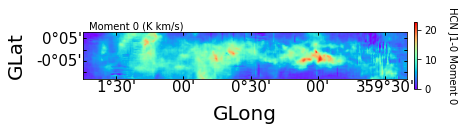

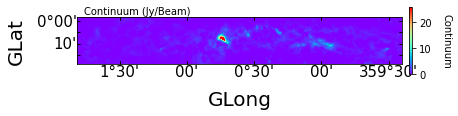

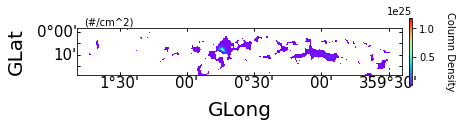

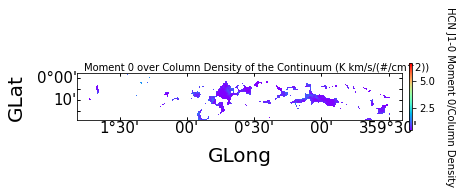

[74] [74] (155, 100)
<class 'float'> <class 'float'> 0.4


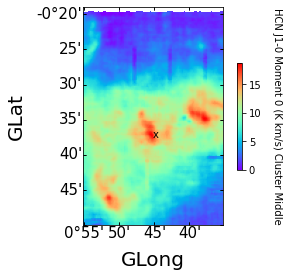

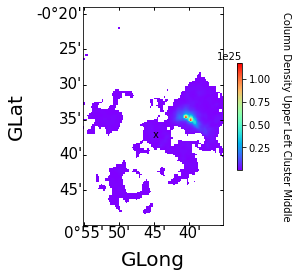

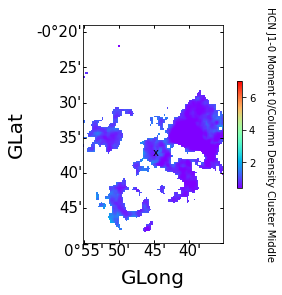

-0.4632101062399116

88631847000.0 Hz
38.98800015444 arcsec 38.98800015444 arcsec
11.960897802424157 pix2
(2701,)
33789.0234375
(356,)
(356,) (356,)
[5.50083284 0.51443879] [[ 0.09592913 -0.00829342]
 [-0.00829342  0.00079965]] Size Linewidth All_structures:
a =  5.50083284086486 +- 0.30972427642924805
b =  0.5144387898686258 +- 0.028278057476966576
[9.61274185e+24 1.96797999e+00] [[ 2.34415792e+48 -9.88557955e+22]
 [-9.88557955e+22  4.21830993e-03]] Radius to Luminosity:
c =  9.612741849266692e+24 +- 1.5310643111453487e+24
d =  1.9679799939132996 +- 0.06494851751853108
[0.00054411 0.20899719] [[ 1.84422727e-06 -6.31407990e-05]
 [-6.31407990e-05  2.16238550e-03]] Column Density to linewidth^2/size:
e =  0.0005441091623510703 +- 0.001358023294400482
f =  0.20899718806628612 +- 0.04650145691808507
(356,) (356,) (6,) (6,) (350,) (350,) <class 'numpy.ndarray'>
(193,) (193,)
[3.93983558 0.75461684] [[ 0.08264169 -0.00850333]
 [-0.00850333  0.00088927]] Size Linewidth Region of Interest:
a =

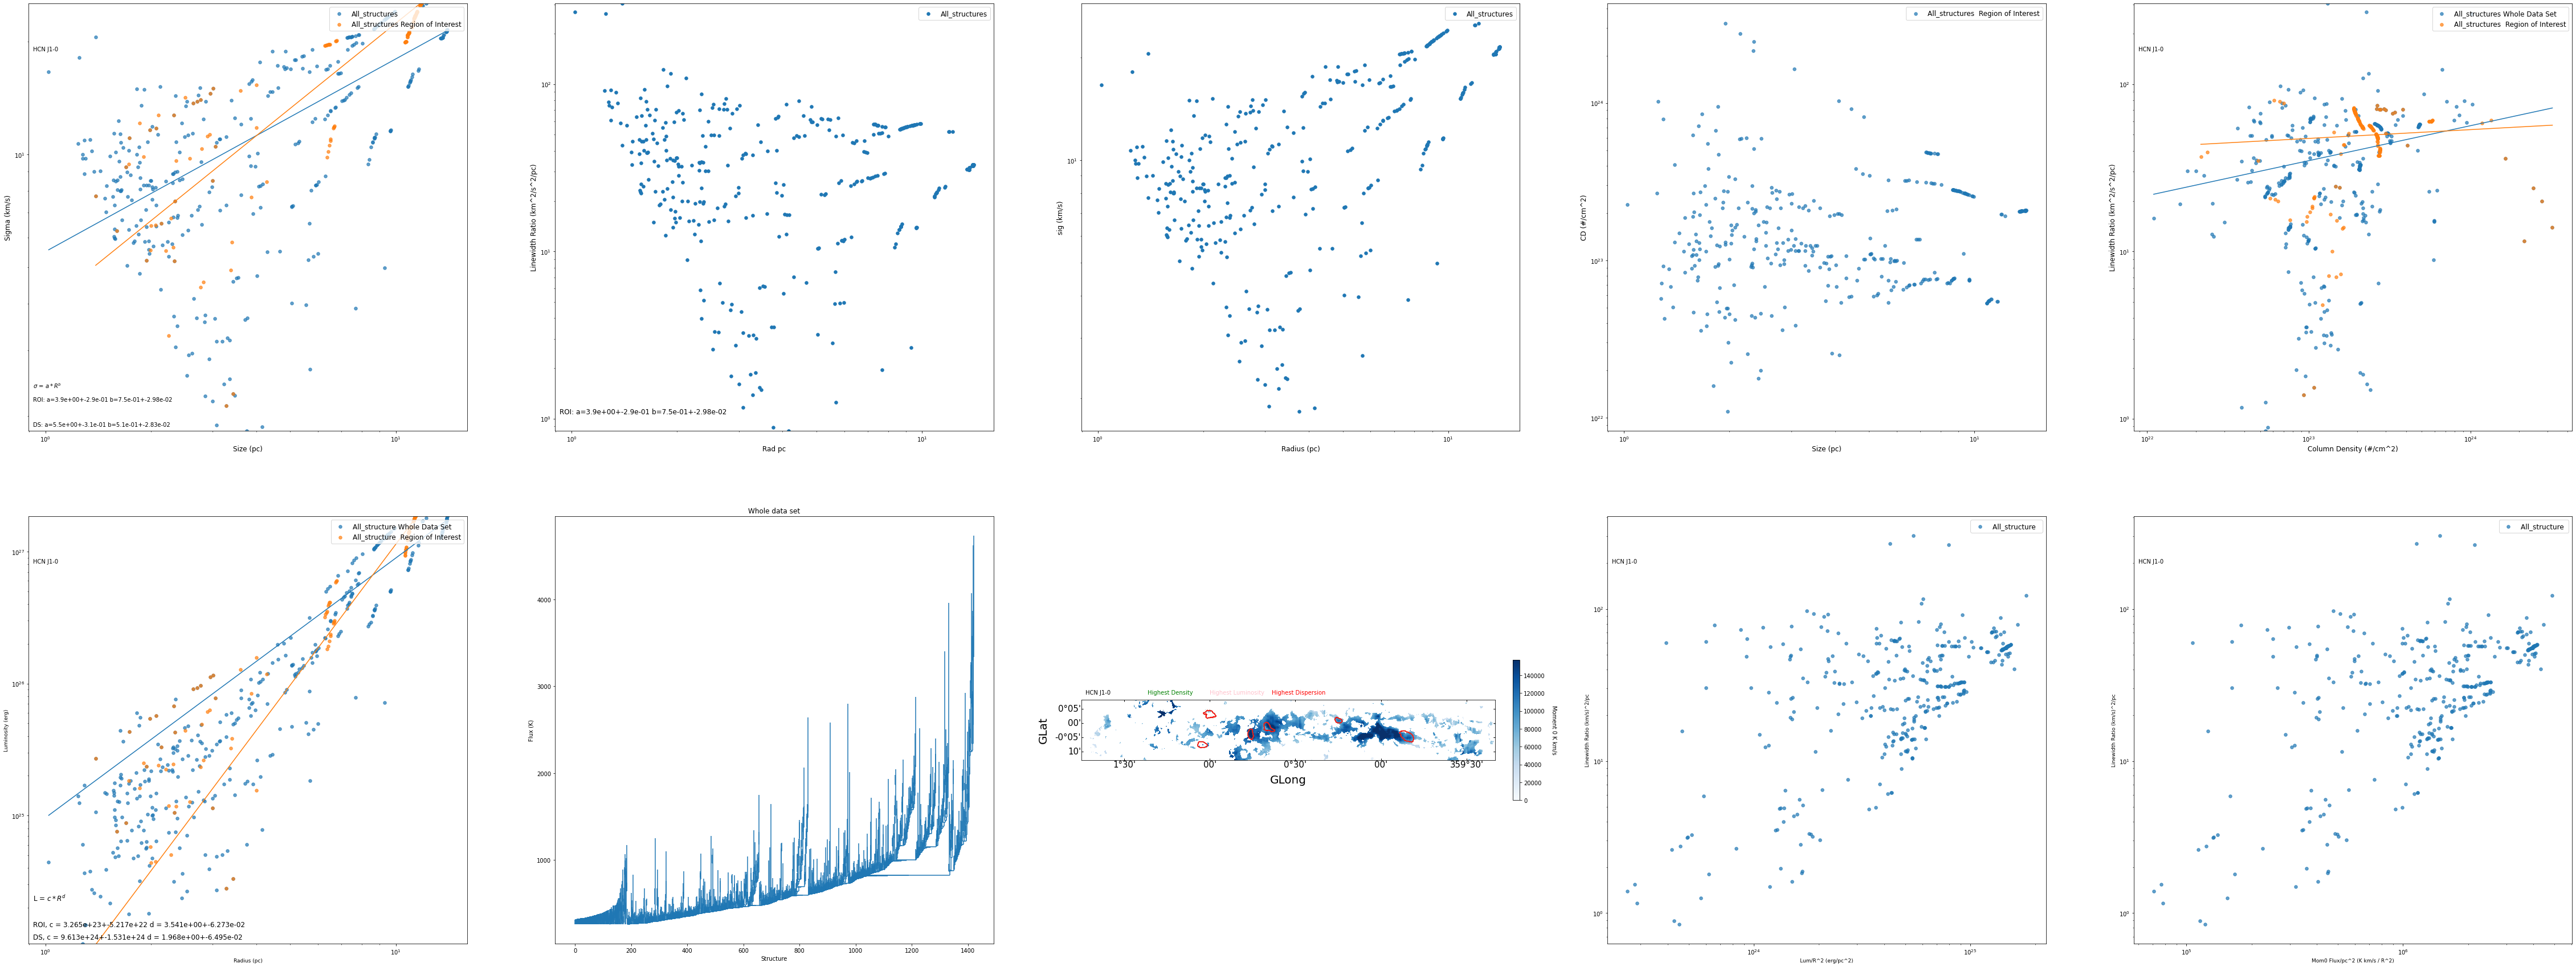

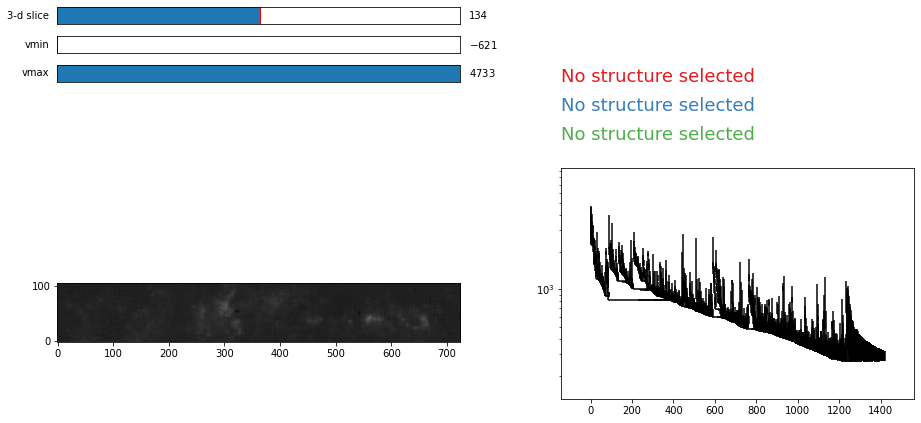

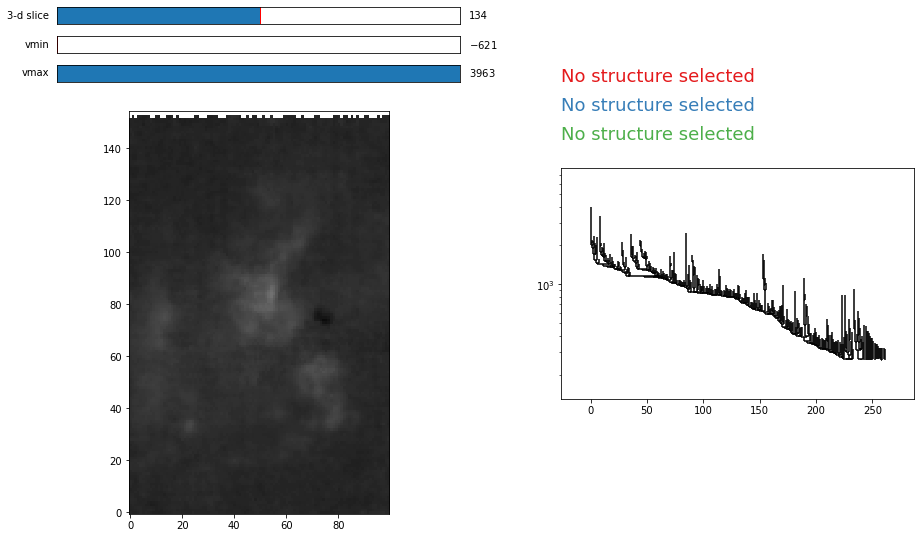

In [117]:
###### HCN


Num = 1
Overlaps=0
Ram_Limiter = 1
Name = "HCN_1_0_Abs_CMZ"
name = "HCN_1_0_CM_Contours_DS_10_Abs_CMZ.jpeg"
LineN="HCN J1-0"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2


Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

np.save("Names_CMZ",Names)

print(Name)


paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V2.fits"])
path = paths[Num]

#pathCont = 'CMZ_Continuum_Reproject.fits'

#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data_CMZ.npy')

Noises = np.load('Noises_K_CMZ.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image

#Put this up here for the column density map


pathCont = 'CMZ_Continuum_Splice.fits'
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
scContW = scCont[30:np.shape(scCont)[0]-30,20:np.shape(scCont)[1]-20] # Make a subcube
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

#Q = SpectralCube.read(path).downsample_axis(2,axis=0).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)
Q = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat =np.copy( sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))

datn = dat[5:np.shape(dat)[0]-5,30:np.shape(dat)[1]-30,20:np.shape(dat)[2]-20] # Make a subcube
scF= scn[5:np.shape(dat)[0]-5,30:np.shape(scn)[1]-30,20:np.shape(scn)[2]-20] # Make a subcube

#Do the same thing to the continuum image

metadata = {}
metadata["Cwcs"] = scContW.wcs
print(np.shape(datn),np.shape(scContW))

try:
    #
    sssss=1
except:
    #
    sssss=1
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#For gaussian beam#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam

metadata['beam_area_ratioc']=beam_area_ratioc

metadata["arc_per_pix"]= abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
D_Es = np.load("Pixel_D.npy")*u.Mpc
#print(D_Es)
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_Es/u.Mpc


#Cubes with little dense gas and abs
'''
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))
'''
UL1 = SkyCoord('00d55m00s',  '-00d50m00s', frame='galactic')#These are away from the sources
UL2 = SkyCoord('00d35m00s','01d30m00s', frame='galactic')
scWCS = scF.wcs[:][:][0]
#scWCSNA = SCNA.wcs[:][:][0]
#moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
ROI = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
ROI_Line = Crop(scn,scn.wcs[:][:][0],UL1,UL2,5,False)
moment_0_ROI = ROI_Line.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 

moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot((LineN+" Moment 0"),"Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data)*.2,scCont.wcs,1,1,1,True)
#Make_Plot((LineN+" Moment 0"),"Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
#print(rmU[0][0])
######ratio

Np1 = SkyCoord('359d40m00s',  '00d04m00s', frame='galactic')#These are away from the sources
Np2 = SkyCoord('359d35m00s','00d08m00s', frame='galactic')
NraDP1 = [int(scContW.wcs.world_to_pixel(Np1)[0]),int(scContW.wcs.world_to_pixel(Np1)[1])]
NraDP2 = [int(scContW.wcs.world_to_pixel(Np2)[0]),int(scContW.wcs.world_to_pixel(Np2)[1])]
#print(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])
#if(str(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])))!=str(np.nan)):
#bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
bp = np.where(cSD<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_sub.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
cSD[bp]=np.nan
rmU[bp]=np.nan
    #rmU[bp2]=np.nan

#print(cSD[0][0])

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",np.array(cSD*u.cm**2,dtype=type(.08)),float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot((LineN+" Moment 0/Column Density"),"Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)


#Region of interest in the cont

Find_Pixel_D(ROI.hdu.data,metadata,"Brightest_CD")

D_EROI = np.load("Brightest_CD.npy")*u.Mpc
pc_per_pixelcROI = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_EROI/u.Mpc

cSDROI = (Flux_to_Mass(ROI.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata,D_Name = "Brightest_CD.npy")/(pc_per_pixelcROI*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmROI=moment_0_ROI.hdu.data/cSDROI
rmUROI = rmROI*u.K*u.km/u.s#Just put back in the units
rmUROI = np.array(rmUROI /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all

######ratio
    
#bproi = np.where(cSDROI<=np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
bproi = np.where(cSDROI<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_ROI.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
cSDROI[bproi]=np.nan
rmUROI[bproi]=np.nan
#rmUROI[bp2]=np.nan

z,yf,xf = np.where(ROI_Line.hdu.data==np.nanmax(ROI_Line.hdu.data))
print(xf,yf,np.shape(ROI.hdu.data))
xf,yf = float(xf/np.shape(ROI.hdu.data)[1]),float(yf/np.shape(ROI.hdu.data)[0])
xf,yf = .5,.4
print(type(xf),type(.5),yf)
Make_Plot_Anno((LineN+" Moment 0 (K km/s) Cluster Middle"),"x",moment_0_ROI.hdu.data,0,np.nanmax(moment_0_ROI.hdu.data),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster Middle","x",np.array(cSDROI*u.cm**2,dtype=type(.08)),float(np.nanmin(cSDROI*u.cm**2)),float(np.nanmax(cSDROI*u.cm**2)),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno((LineN+" Moment 0/Column Density Cluster Middle"),"x",rmUROI,np.nanmean(rmUROI)*.5,abs(np.nanmean(rmUROI))*8,ROI.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))




header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
    print(freq)
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =scF[0][0][0].unit# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio =1.13309* metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] = np.sqrt(abs(header["CDELT1"])*u.degree**2*abs(header["CDELT2"]))
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*D_Es/u.Mpc)**2#mpc^2/pix^2

#print(area_res,type(area_res))
print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0



metadata["ARND"] = abs(header["CDELT1"])*abs(header["CDELT2"])




d = astrodendro.Dendrogram.compute(datn,min_delta=m*1,min_value=m*5,min_npix=beam_area_ratio.value) #The main culprit
#dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit


dUL = astrodendro.Dendrogram.compute(ROI_Line.hdu.data,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit



##Analyze dendograms
print(np.shape(d))




fig = plt.figure(1,figsize=(80,80))


axAlpha = pylab.subplot(5, 5, 7)


axGamma = pylab.subplot(5, 5, 9)




p=d.plotter()
p.plot_tree(axAlpha)
axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")

            
'''

p=dNA.plotter()
p.plot_tree(axBeta)
axBeta.set_xlabel("Structure")
axBeta.set_ylabel("Flux (K)")
axBeta.set_title("No absorption region")

'''
#p=dUL.plotter()
#p.plot_tree(axGamma)
#xGamma.set_xlabel("Structure")
#axGamma.set_ylabel("Flux (K)")
#axGamma.set_title("Region of Interest")
''''''

pc_per_pixel = abs(header["CDELT1"])/180*np.pi*D_Es/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
Rads,Sigmas,CD,Lumin ,SIDS,MOM0FLUX= Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)

#Plot contours for the top ten clusters


scCropped =scF.moment0().hdu.data
scCropped[np.where(scF.moment0().hdu.data<.22)]=np.nan
print(np.nanmean(np.nanstd(scF.moment0().hdu.data))*1)
scCropped[bp]=np.nan
axBeta = pylab.subplot(5,5,8,projection=scF.moment0().wcs)
#axBeta.imshow(scCropped.moment0().hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,norm=colors.LogNorm(vmin=5))
imBeta = axBeta.imshow(scCropped, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(scCropped)*.7 )



ColumnCon= np.concatenate((CD[0],CD[1]))
SIDScon = np.concatenate((SIDS[0],SIDS[1]))
#nth = 0#sorted(ColumnCon)[len(ColumnCon)-30]
nth = 0#sorted(CD[0])[len(CD[0])-10]
nth2 = 0#sorted(Lumin[0])[len(Lumin[0])-10]
nth3 = 0#sorted(Sigmas[0])[len(Sigmas[0])-10]
#top = np.where(CD[0]>=nth)
#print(list(top))
'''
for n in range(len(ColumnCon)):
    
    if(ColumnCon[n]>=nth):
        #print(n,SIDS[0])
        p.plot_contour(axBeta, structure=int(SIDScon[n]), lw=.1, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
'''
G1 = True
G2 = True
G3 = True
for n in range(len(CD[0])):
    
    if(CD[0][n]>=nth):
        #print(n,SIDS[0])
        if(G1):
            G1=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green',label="Higest Density")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Lumin[0][n]>=nth2):
        #print(n,SIDS[0])
        if(G2):
            G2=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink",label="Highest Luminosity (Leaves)")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink")
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Sigmas[0][n]>=nth3):
        #print(n,SIDS[0])
        if(G3):
            G3=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red',label="Highest Dispersion")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
   
  


RA = axBeta.coords[0]                                                                  # 
Dec = axBeta.coords[1]

RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
pylab.ylabel('GLat',fontsize=20,labelpad=1)
axBeta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=LineN,fontsize=10,xy=(.01,1.1),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.16,1.1),xycoords="axes fraction",c="green")  
pylab.annotate(s="Highest Luminosity",fontsize=10,xy=(.31,1.1),xycoords="axes fraction",c="pink")  
pylab.annotate(s="Highest Dispersion",fontsize=10,xy=(.46,1.1),xycoords="axes fraction",c="red")  

    
    
    
    
#RadsNA,SigmasNA,CDNA,LuminNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL = Dendro_Arrays(dUL,ROI_Line.hdu.data,vel,ROI.hdu.data,metadata)


#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)







    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)



xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])



LuminCon = np.concatenate((Lumin[0],Lumin[1]))

MOM0FLUXcon = np.concatenate((MOM0FLUX[0],MOM0FLUX[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])



#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)

cgp = ColumnCon[gp2]
radgpFORRAT = Rcon[gp2]*10**6
siggpFORRAT = Scon[gp2]


lumFORRAT = LuminCon[gp2]
mom0FORRAT = MOM0FLUXcon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])


print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))



print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))






print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))



ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)



print(np.shape(Rcon*10**6),np.shape(Scon),np.shape(Rads[0]*10**6),np.shape(Sigmas[0]),np.shape(Rads[1]*10**6),np.shape(Sigmas[1]),type(Rads[0]))
#xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(Rads[0]*10**6,Sigmas[0],s=30),ax2.scatter(Rads[1]*10**6,Sigmas[1],s=30)
xpcon = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30,alpha=.7)
#p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)
p = ax2.plot(xs,ysCon)

#pNA = ax2.plot(xsNA,ysNA)
#xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30,alpha=.7)

xpconhh = ax2.scatter(RconUL*10**6,SconUL,label="All_structures Region of Interest",s=30,alpha=.7)
xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])
p22 = ax2.plot(xsUL,ysUL)


st="DS: a="+ str(np.format_float_scientific(poptCon[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[0][0]),1))+" b="+str(np.format_float_scientific(poptCon[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")

st="ROI: a="+ str(np.format_float_scientific(poptUL[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[0][0]),1))+" b="+str(np.format_float_scientific(poptUL[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.07),xycoords="axes fraction")
ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)





xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)
#pF = ax3.plot(xsCD,ysCD)
#ax3.annotate(s=r'$\sigma^2/R$ = $e*N^f$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#st = "e = "+ str(np.format_float_scientific(CDpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[0][0]),3))+" f = "+str(np.format_float_scientific(CDpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[1][1]),3))

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad pc",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)
#pFLL = ax4.plot(xsRL,ysRL)

#st = "c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
#ax4.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#ax4.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
#ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")














LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
print(np.shape(radgpUL),np.shape(lgpUL))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6
CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])

print(poptUL,pcovUL,"Size Linewidth Region of Interest:")
print("a = ",poptUL[0],"+-",np.sqrt(pcovUL[0][0]))
print("b = ",poptUL[1],"+-",np.sqrt(pcovUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity  Region of Interest:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(radgpFORRAT,cgp,label="All_structures  Region of Interest",s=30,alpha=.7)
#p2 = ax5.plot(xsUL,ysUL)


ax5.set_yscale('log')
ax5.set_xscale('log')
#ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=12)
ax5.set_ylabel("CD (#/cm^2)",fontsize=12)
ax5.legend(prop={'size': 12},loc="upper right")


#gp = np.where(FRs>0)



xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Data Set",s=30,alpha=.7)
pFUL2 = ax6.plot(xsCD,ysCD)


#xspFNA = ax6.scatter(cgpNA,rgpNA,label="All_structures Sparse Region",s=30,alpha=.7)
#pFNA = ax6.plot(xsCDNA,ysCDNA)


xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures  Region of Interest",s=30,alpha=.7)
pFUL = ax6.plot(xsCDUL,ysCDUL)

#ax6.annotate(s=st,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=12)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax6.legend(prop={'size': 12},loc="upper right")
ax6.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")




xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)
#xspLu2NA = ax7.scatter(radgpNA,lgpNA,label="All_structure Sparse Region",s=30,alpha=.7)
#pFLLu2NA = ax7.plot(xsRLNA,ysRLNA)

xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure  Region of Interest",s=30,alpha=.7)

pFLLu = ax7.plot(xsRLUL,ysRLUL)


st = "DS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.10),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")
st2 = "ROI, c = "+ str(np.format_float_scientific(RLpoptUL[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptUL[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[1][1]),3))
ax7.annotate(s=st2,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

#st3 = "SR, c = "+ str(np.format_float_scientific(RLpoptNA[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptNA[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[1][1]),3))
#ax7.annotate(s=st3,fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#print(FRs)



lum_rat = axGamma.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axGamma.set_yscale('log')
axGamma.set_xscale('log')
axGamma.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axGamma.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axGamma.legend(prop={'size': 12},loc="upper right")
axGamma.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)



#mom0_rat = axDelta.scatter(mom0FORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  Region of Interest",s=30,alpha=.7)
gp4=np.where(MOM0FLUXcon>0)
mom0FORFlux=MOM0FLUXcon[gp4]
radgpFORFlux=Rcon[gp4]*10**6
rgpFORFlux=Scon[gp4]**2/Rcon[gp4]/10**6
mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")

NameColROI = (Name+"_Column_ROI")
NameLumROI = (Name+"_Luminosities_ROI")
NameRROI = (NameR+"_ROI")
NameSROI = (NameS+"_ROI")
NameFlux = (Name+"Flux_Dense")
NameRFF = (Name+"Rad_For_Flux")

v1 = d.viewer()
v1.show()
v3 = dUL.viewer()
v3.show()

np.save(NameCol,CD)
np.save(NameLum,Lumin)

np.save(NameS,Sigmas)
np.save(NameR,Rads) #Still in [leaves] [breanches] format

np.save(NameColROI,CDUL)
np.save(NameLumROI,LuminUL)

np.save(NameSROI,SigmasUL)
np.save(NameRROI,RadsUL) #Still in [leaves] [breanches] format

np.save(NameFlux,mom0FORFlux/radgpFORFlux**2)
np.save(NameRFF,rgpFORFlux)



H13CN_1_0_Abs_CMZ
Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits
37.261537045299654
(277, 165, 765) (277, 165, 765)
(267, 105, 725) (105, 725)


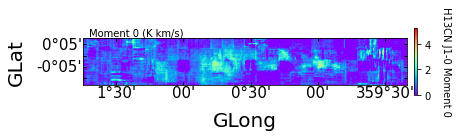

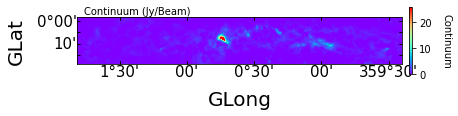

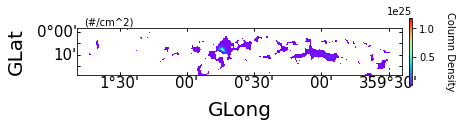

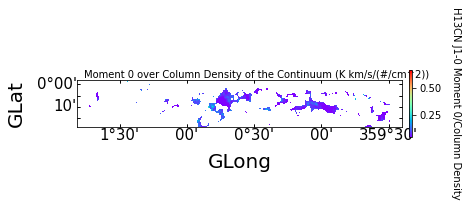

[77] [75] (155, 100)
<class 'float'> <class 'float'> 0.4


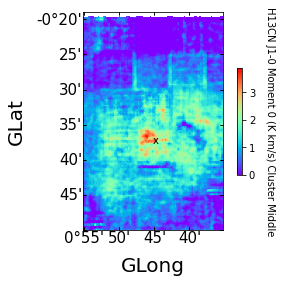

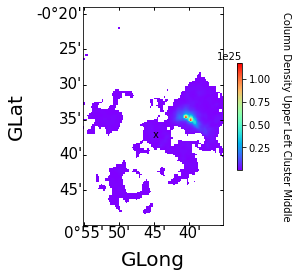

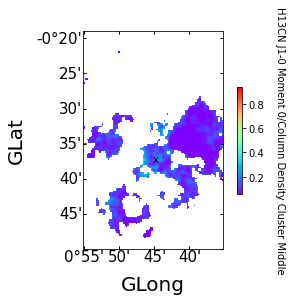

-0.38533936002757857

86338767000.0 Hz
38.98800015444 arcsec 38.98800015444 arcsec
11.960897802424157 pix2
(1588,)
7124.4287109375
(396,)
(396,) (396,)
[5.06203768 0.67719559] [[ 0.07909764 -0.00779488]
 [-0.00779488  0.00081124]] Size Linewidth All_structures:
a =  5.062037681028544 +- 0.28124303255348254
b =  0.6771955873880241 +- 0.028482324219562885
[4.89912196e+23 2.53993303e+00] [[ 4.12626979e+45 -3.85465839e+21]
 [-3.85465839e+21  3.61948587e-03]] Radius to Luminosity:
c =  4.8991219562011726e+23 +- 6.423604741394902e+22
d =  2.5399330281478414 +- 0.06016216313731287
[2.97852857e-07 3.50938865e-01] [[ 2.57376901e-13 -1.59267592e-08]
 [-1.59267592e-08  9.85742827e-04]] Column Density to linewidth^2/size:
e =  2.978528568446403e-07 +- 5.073232704902507e-07
f =  0.3509388648612847 +- 0.031396541645079316
(396,) (396,) (0,) (0,) (396,) (396,) <class 'numpy.ndarray'>
(217,) (217,)
[6.12519099 0.63902764] [[ 0.11364225 -0.00921691]
 [-0.00921691  0.00077253]] Size Linewidth Region of 

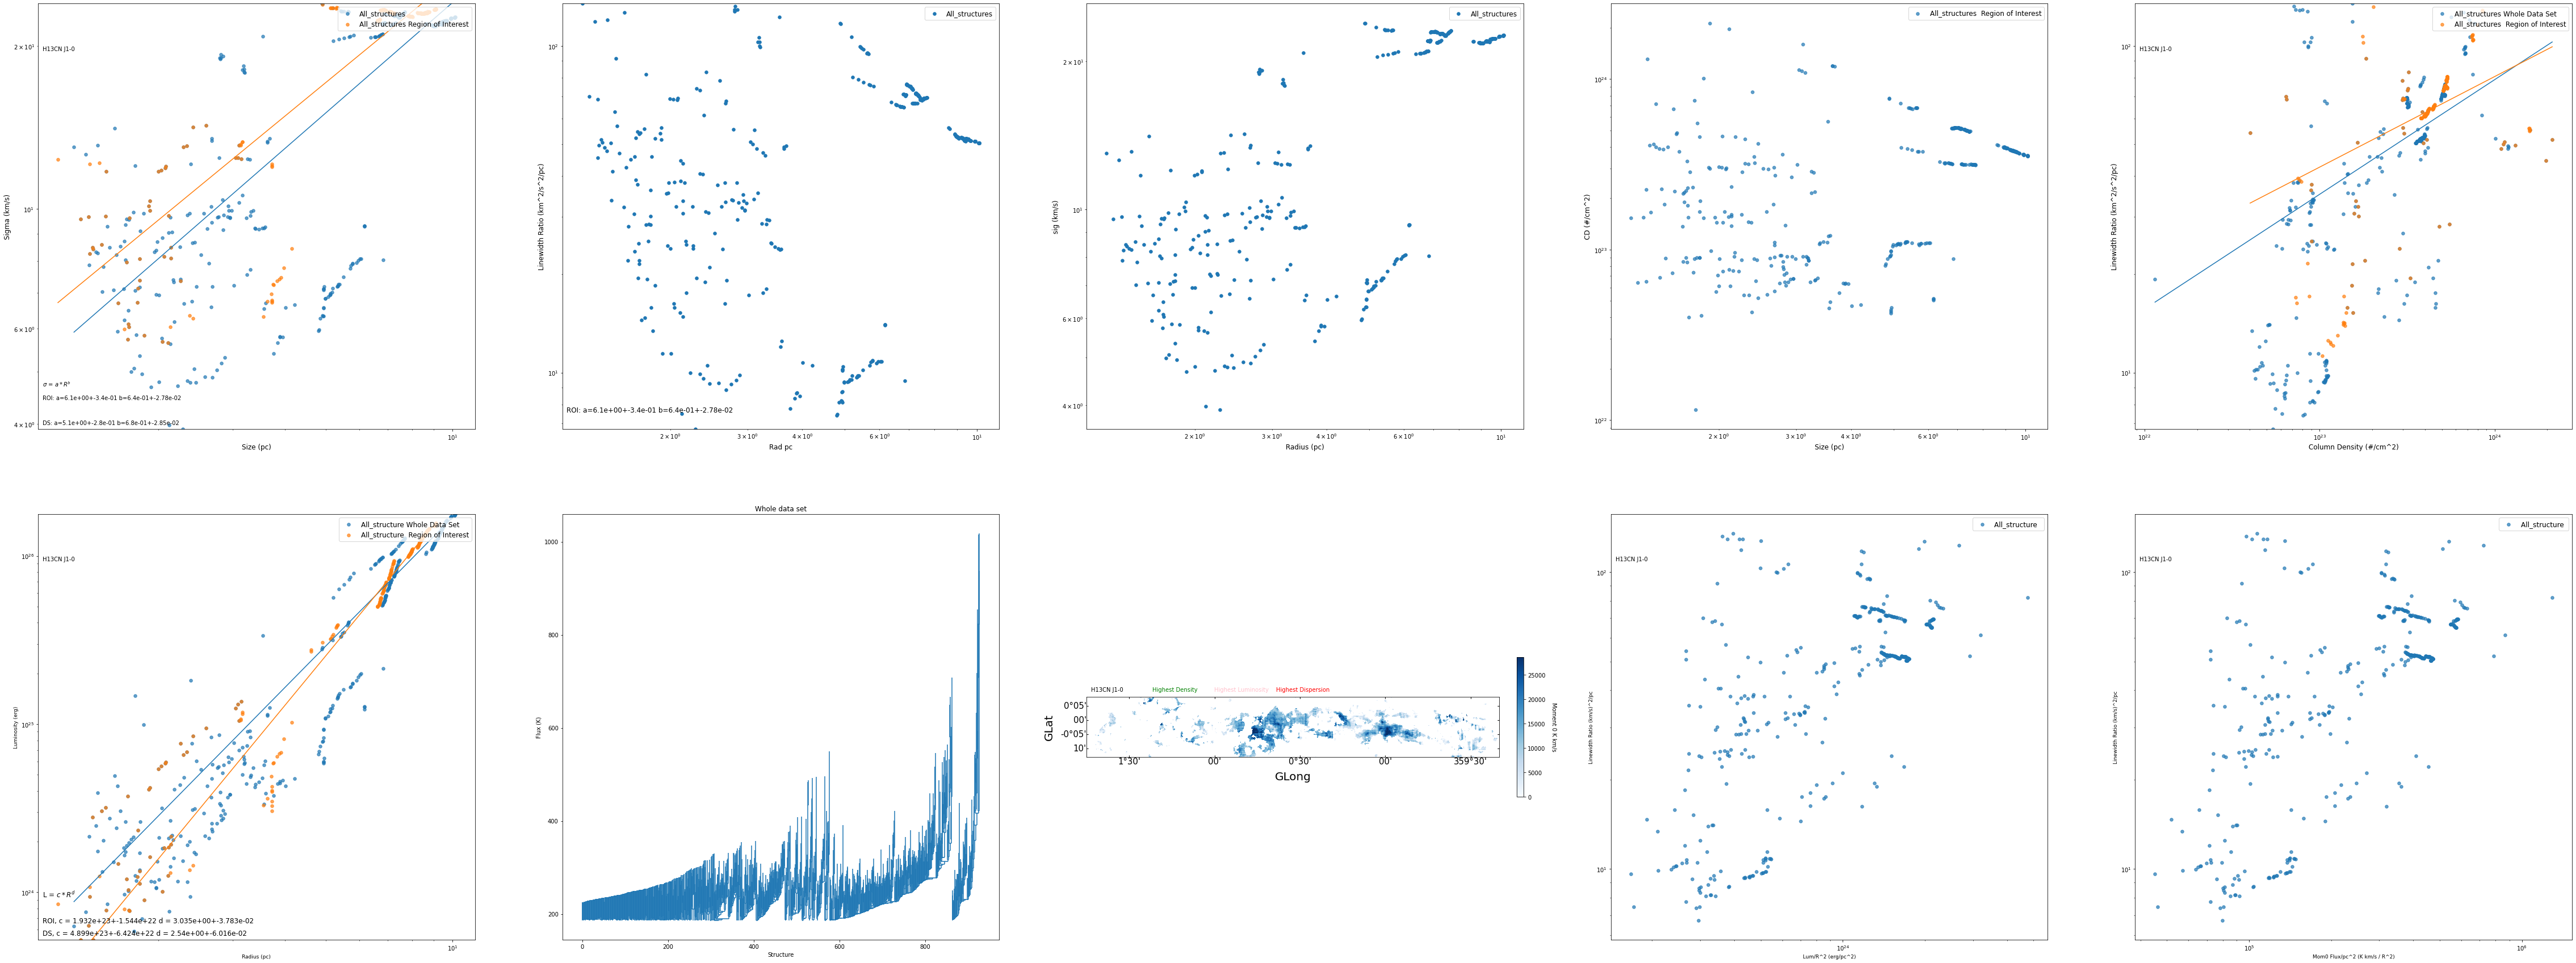

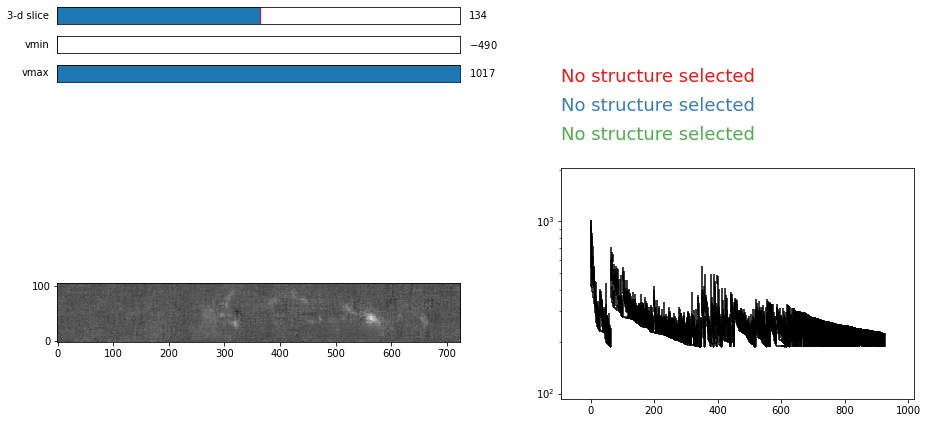

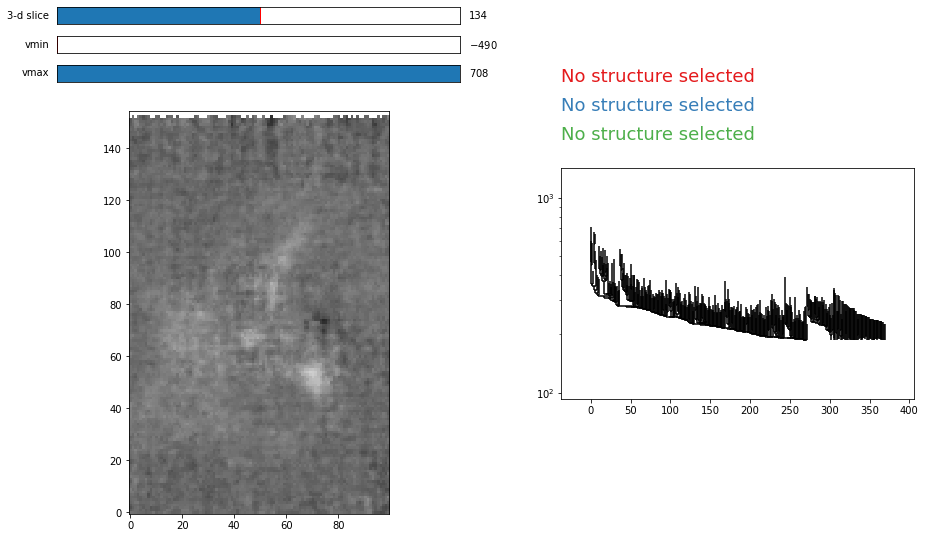

In [118]:
#H13CN


Num = 2
Overlaps=0
Ram_Limiter = 1
Name = "H13CN_1_0_Abs_CMZ"
name = "H13CN_1_0_CM_Contours_DS_10_Abs_CMZ.jpeg"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2
LineN="H13CN J1-0"





Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

np.save("Names_CMZ",Names)

print(Name)


paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V2.fits"])
path = paths[Num]

#pathCont = 'CMZ_Continuum_Reproject.fits'

#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data_CMZ.npy')

Noises = np.load('Noises_K_CMZ.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image

#Put this up here for the column density map


pathCont = 'CMZ_Continuum_Splice.fits'
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
scContW = scCont[30:np.shape(scCont)[0]-30,20:np.shape(scCont)[1]-20] # Make a subcube
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

#Q = SpectralCube.read(path).downsample_axis(2,axis=0).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)
Q = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat =np.copy( sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))

datn = dat[5:np.shape(dat)[0]-5,30:np.shape(dat)[1]-30,20:np.shape(dat)[2]-20] # Make a subcube
scF= scn[5:np.shape(dat)[0]-5,30:np.shape(scn)[1]-30,20:np.shape(scn)[2]-20] # Make a subcube

#Do the same thing to the continuum image

metadata = {}
metadata["Cwcs"] = scContW.wcs
print(np.shape(datn),np.shape(scContW))

try:
    #
    sssss=1
except:
    #
    sssss=1
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#For gaussian beam#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam

metadata['beam_area_ratioc']=beam_area_ratioc

metadata["arc_per_pix"]= abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
D_Es = np.load("Pixel_D.npy")*u.Mpc
#print(D_Es)
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_Es/u.Mpc


#Cubes with little dense gas and abs
'''
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))
'''
UL1 = SkyCoord('00d55m00s',  '-00d50m00s', frame='galactic')#These are away from the sources
UL2 = SkyCoord('00d35m00s','01d30m00s', frame='galactic')
scWCS = scF.wcs[:][:][0]
#scWCSNA = SCNA.wcs[:][:][0]
#moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
ROI = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
ROI_Line = Crop(scn,scn.wcs[:][:][0],UL1,UL2,5,False)
moment_0_ROI = ROI_Line.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 

moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot((LineN+" Moment 0"),"Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data)*.2,scCont.wcs,1,1,1,True)
#Make_Plot((LineN+" Moment 0"),"Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
#print(rmU[0][0])
######ratio

Np1 = SkyCoord('359d40m00s',  '00d04m00s', frame='galactic')#These are away from the sources
Np2 = SkyCoord('359d35m00s','00d08m00s', frame='galactic')
NraDP1 = [int(scContW.wcs.world_to_pixel(Np1)[0]),int(scContW.wcs.world_to_pixel(Np1)[1])]
NraDP2 = [int(scContW.wcs.world_to_pixel(Np2)[0]),int(scContW.wcs.world_to_pixel(Np2)[1])]
#print(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])
#if(str(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])))!=str(np.nan)):
#bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
bp = np.where(cSD<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_sub.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
cSD[bp]=np.nan
rmU[bp]=np.nan
    #rmU[bp2]=np.nan

#print(cSD[0][0])

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",np.array(cSD*u.cm**2,dtype=type(.08)),float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot((LineN+" Moment 0/Column Density"),"Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)


#Region of interest in the cont

Find_Pixel_D(ROI.hdu.data,metadata,"Brightest_CD")

D_EROI = np.load("Brightest_CD.npy")*u.Mpc
pc_per_pixelcROI = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_EROI/u.Mpc

cSDROI = (Flux_to_Mass(ROI.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata,D_Name = "Brightest_CD.npy")/(pc_per_pixelcROI*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmROI=moment_0_ROI.hdu.data/cSDROI
rmUROI = rmROI*u.K*u.km/u.s#Just put back in the units
rmUROI = np.array(rmUROI /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all

######ratio
    
#bproi = np.where(cSDROI<=np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
bproi = np.where(cSDROI<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_ROI.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
cSDROI[bproi]=np.nan
rmUROI[bproi]=np.nan
#rmUROI[bp2]=np.nan

z,yf,xf = np.where(ROI_Line.hdu.data==np.nanmax(ROI_Line.hdu.data))
print(xf,yf,np.shape(ROI.hdu.data))
xf,yf = float(xf/np.shape(ROI.hdu.data)[1]),float(yf/np.shape(ROI.hdu.data)[0])
xf,yf = .5,.4
print(type(xf),type(.5),yf)
Make_Plot_Anno((LineN+" Moment 0 (K km/s) Cluster Middle"),"x",moment_0_ROI.hdu.data,0,np.nanmax(moment_0_ROI.hdu.data),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster Middle","x",np.array(cSDROI*u.cm**2,dtype=type(.08)),float(np.nanmin(cSDROI*u.cm**2)),float(np.nanmax(cSDROI*u.cm**2)),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno((LineN+" Moment 0/Column Density Cluster Middle"),"x",rmUROI,np.nanmean(rmUROI)*.5,abs(np.nanmean(rmUROI))*8,ROI.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))




header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
    print(freq)
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =scF[0][0][0].unit# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio =1.13309* metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] = np.sqrt(abs(header["CDELT1"])*u.degree**2*abs(header["CDELT2"]))
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*D_Es/u.Mpc)**2#mpc^2/pix^2

#print(area_res,type(area_res))
print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0



metadata["ARND"] = abs(header["CDELT1"])*abs(header["CDELT2"])





d = astrodendro.Dendrogram.compute(datn,min_delta=m*1,min_value=m*5,min_npix=beam_area_ratio.value) #The main culprit
#dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit


dUL = astrodendro.Dendrogram.compute(ROI_Line.hdu.data,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit



##Analyze dendograms
print(np.shape(d))




fig = plt.figure(1,figsize=(80,80))


axAlpha = pylab.subplot(5, 5, 7)


axGamma = pylab.subplot(5, 5, 9)




p=d.plotter()
p.plot_tree(axAlpha)
axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")

            
'''

p=dNA.plotter()
p.plot_tree(axBeta)
axBeta.set_xlabel("Structure")
axBeta.set_ylabel("Flux (K)")
axBeta.set_title("No absorption region")

'''
#p=dUL.plotter()
#p.plot_tree(axGamma)
#xGamma.set_xlabel("Structure")
#axGamma.set_ylabel("Flux (K)")
#axGamma.set_title("Region of Interest")
''''''

pc_per_pixel = abs(header["CDELT1"])/180*np.pi*D_Es/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
Rads,Sigmas,CD,Lumin ,SIDS,MOM0FLUX= Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)

#Plot contours for the top ten clusters


scCropped =scF.moment0().hdu.data
scCropped[np.where(scF.moment0().hdu.data<.22)]=np.nan
print(np.nanmean(np.nanstd(scF.moment0().hdu.data))*1)
scCropped[bp]=np.nan
axBeta = pylab.subplot(5,5,8,projection=scF.moment0().wcs)
#axBeta.imshow(scCropped.moment0().hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,norm=colors.LogNorm(vmin=5))
imBeta = axBeta.imshow(scCropped, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(scCropped)*.7 )



ColumnCon= np.concatenate((CD[0],CD[1]))
SIDScon = np.concatenate((SIDS[0],SIDS[1]))
#nth = 0#sorted(ColumnCon)[len(ColumnCon)-30]
nth = 0#sorted(CD[0])[len(CD[0])-10]
nth2 = 0#sorted(Lumin[0])[len(Lumin[0])-10]
nth3 = 0#sorted(Sigmas[0])[len(Sigmas[0])-10]
#top = np.where(CD[0]>=nth)
#print(list(top))
'''
for n in range(len(ColumnCon)):
    
    if(ColumnCon[n]>=nth):
        #print(n,SIDS[0])
        p.plot_contour(axBeta, structure=int(SIDScon[n]), lw=.1, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
'''
G1 = True
G2 = True
G3 = True
for n in range(len(CD[0])):
    
    if(CD[0][n]>=nth):
        #print(n,SIDS[0])
        if(G1):
            G1=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green',label="Higest Density")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Lumin[0][n]>=nth2):
        #print(n,SIDS[0])
        if(G2):
            G2=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink",label="Highest Luminosity (Leaves)")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink")
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Sigmas[0][n]>=nth3):
        #print(n,SIDS[0])
        if(G3):
            G3=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red',label="Highest Dispersion")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
   
  


RA = axBeta.coords[0]                                                                  # 
Dec = axBeta.coords[1]

RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
pylab.ylabel('GLat',fontsize=20,labelpad=1)
axBeta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=LineN,fontsize=10,xy=(.01,1.1),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.16,1.1),xycoords="axes fraction",c="green")  
pylab.annotate(s="Highest Luminosity",fontsize=10,xy=(.31,1.1),xycoords="axes fraction",c="pink")  
pylab.annotate(s="Highest Dispersion",fontsize=10,xy=(.46,1.1),xycoords="axes fraction",c="red")  

    
    
    
    
#RadsNA,SigmasNA,CDNA,LuminNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL = Dendro_Arrays(dUL,ROI_Line.hdu.data,vel,ROI.hdu.data,metadata)


#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)







    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)



xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])



LuminCon = np.concatenate((Lumin[0],Lumin[1]))

MOM0FLUXcon = np.concatenate((MOM0FLUX[0],MOM0FLUX[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])



#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)

cgp = ColumnCon[gp2]
radgpFORRAT = Rcon[gp2]*10**6
siggpFORRAT = Scon[gp2]


lumFORRAT = LuminCon[gp2]
mom0FORRAT = MOM0FLUXcon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])


print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))



print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))






print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))



ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)



print(np.shape(Rcon*10**6),np.shape(Scon),np.shape(Rads[0]*10**6),np.shape(Sigmas[0]),np.shape(Rads[1]*10**6),np.shape(Sigmas[1]),type(Rads[0]))
#xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(Rads[0]*10**6,Sigmas[0],s=30),ax2.scatter(Rads[1]*10**6,Sigmas[1],s=30)
xpcon = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30,alpha=.7)
#p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)
p = ax2.plot(xs,ysCon)

#pNA = ax2.plot(xsNA,ysNA)
#xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30,alpha=.7)

xpconhh = ax2.scatter(RconUL*10**6,SconUL,label="All_structures Region of Interest",s=30,alpha=.7)
xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])
p22 = ax2.plot(xsUL,ysUL)


st="DS: a="+ str(np.format_float_scientific(poptCon[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[0][0]),1))+" b="+str(np.format_float_scientific(poptCon[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")

st="ROI: a="+ str(np.format_float_scientific(poptUL[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[0][0]),1))+" b="+str(np.format_float_scientific(poptUL[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.07),xycoords="axes fraction")
ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)





xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)
#pF = ax3.plot(xsCD,ysCD)
#ax3.annotate(s=r'$\sigma^2/R$ = $e*N^f$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#st = "e = "+ str(np.format_float_scientific(CDpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[0][0]),3))+" f = "+str(np.format_float_scientific(CDpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[1][1]),3))

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad pc",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)
#pFLL = ax4.plot(xsRL,ysRL)

#st = "c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
#ax4.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#ax4.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
#ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")














LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
print(np.shape(radgpUL),np.shape(lgpUL))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6
CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])

print(poptUL,pcovUL,"Size Linewidth Region of Interest:")
print("a = ",poptUL[0],"+-",np.sqrt(pcovUL[0][0]))
print("b = ",poptUL[1],"+-",np.sqrt(pcovUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity  Region of Interest:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(radgpFORRAT,cgp,label="All_structures  Region of Interest",s=30,alpha=.7)
#p2 = ax5.plot(xsUL,ysUL)


ax5.set_yscale('log')
ax5.set_xscale('log')
#ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=12)
ax5.set_ylabel("CD (#/cm^2)",fontsize=12)
ax5.legend(prop={'size': 12},loc="upper right")


#gp = np.where(FRs>0)



xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Data Set",s=30,alpha=.7)
pFUL2 = ax6.plot(xsCD,ysCD)


#xspFNA = ax6.scatter(cgpNA,rgpNA,label="All_structures Sparse Region",s=30,alpha=.7)
#pFNA = ax6.plot(xsCDNA,ysCDNA)


xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures  Region of Interest",s=30,alpha=.7)
pFUL = ax6.plot(xsCDUL,ysCDUL)

#ax6.annotate(s=st,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=12)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax6.legend(prop={'size': 12},loc="upper right")
ax6.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")




xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)
#xspLu2NA = ax7.scatter(radgpNA,lgpNA,label="All_structure Sparse Region",s=30,alpha=.7)
#pFLLu2NA = ax7.plot(xsRLNA,ysRLNA)

xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure  Region of Interest",s=30,alpha=.7)

pFLLu = ax7.plot(xsRLUL,ysRLUL)


st = "DS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.10),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")
st2 = "ROI, c = "+ str(np.format_float_scientific(RLpoptUL[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptUL[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[1][1]),3))
ax7.annotate(s=st2,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

#st3 = "SR, c = "+ str(np.format_float_scientific(RLpoptNA[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptNA[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[1][1]),3))
#ax7.annotate(s=st3,fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#print(FRs)



lum_rat = axGamma.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axGamma.set_yscale('log')
axGamma.set_xscale('log')
axGamma.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axGamma.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axGamma.legend(prop={'size': 12},loc="upper right")
axGamma.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)



#mom0_rat = axDelta.scatter(mom0FORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  Region of Interest",s=30,alpha=.7)
gp4=np.where(MOM0FLUXcon>0)
mom0FORFlux=MOM0FLUXcon[gp4]
radgpFORFlux=Rcon[gp4]*10**6
rgpFORFlux=Scon[gp4]**2/Rcon[gp4]/10**6
mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")

NameColROI = (Name+"_Column_ROI")
NameLumROI = (Name+"_Luminosities_ROI")
NameRROI = (NameR+"_ROI")
NameSROI = (NameS+"_ROI")
NameFlux = (Name+"Flux_Dense")
NameRFF = (Name+"Rad_For_Flux")

v1 = d.viewer()
v1.show()
v3 = dUL.viewer()
v3.show()

np.save(NameCol,CD)
np.save(NameLum,Lumin)

np.save(NameS,Sigmas)
np.save(NameR,Rads) #Still in [leaves] [breanches] format

np.save(NameColROI,CDUL)
np.save(NameLumROI,LuminUL)

np.save(NameSROI,SigmasUL)
np.save(NameRROI,RadsUL) #Still in [leaves] [breanches] format

np.save(NameFlux,mom0FORFlux/radgpFORFlux**2)
np.save(NameRFF,rgpFORFlux)



H13CoP_1_0_Abs_CMZ
Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits
35.99142116563138
(277, 165, 765) (277, 165, 765)
(267, 105, 725) (105, 725)


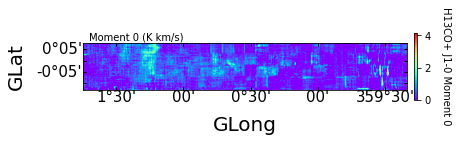

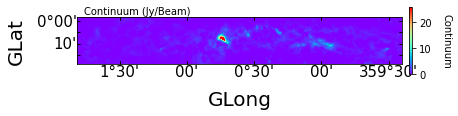

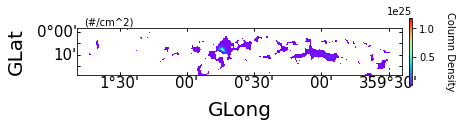

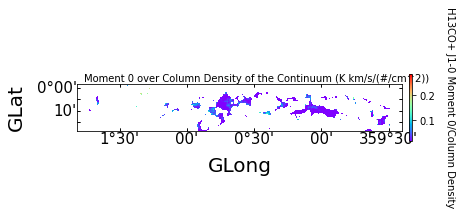

[76] [74] (155, 100)
<class 'float'> <class 'float'> 0.4


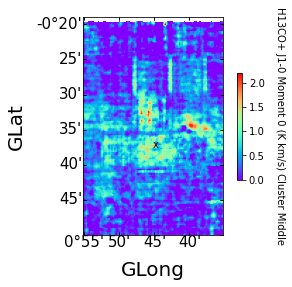

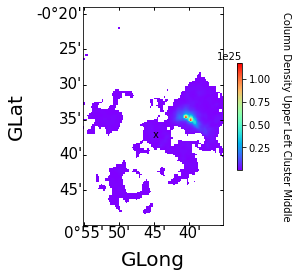

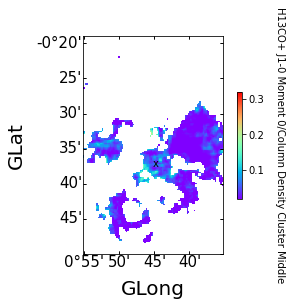

-0.7082405910663252

86754288000.0 Hz
38.98800015444 arcsec 38.98800015444 arcsec
11.960897802424157 pix2
(832,)
5094.36572265625
(189,)
(189,) (189,)
[4.50292878 0.40752308] [[ 0.10063092 -0.01076991]
 [-0.01076991  0.00129216]] Size Linewidth All_structures:
a =  4.502928776842909 +- 0.3172237658492194
b =  0.4075230824372898 +- 0.03594662578831216
[6.66313234e+23 1.95867313e+00] [[ 6.68128892e+45 -4.11237009e+21]
 [-4.11237009e+21  2.55137518e-03]] Radius to Luminosity:
c =  6.663132337755782e+23 +- 8.173915170606847e+22
d =  1.958673125528847 +- 0.05051113914586219
[0.00357667 0.16005587] [[ 4.27947234e-05 -2.22241208e-04]
 [-2.22241208e-04  1.15501425e-03]] Column Density to linewidth^2/size:
e =  0.00357667487752959 +- 0.006541767607431402
f =  0.16005587455650758 +- 0.03398550057512681
(189,) (189,) (0,) (0,) (189,) (189,) <class 'numpy.ndarray'>
(41,) (41,)
[5.89198738 0.14239576] [[ 1.25344093 -0.18418459]
 [-0.18418459  0.0289778 ]] Size Linewidth Region of Interest:
a =  5.8

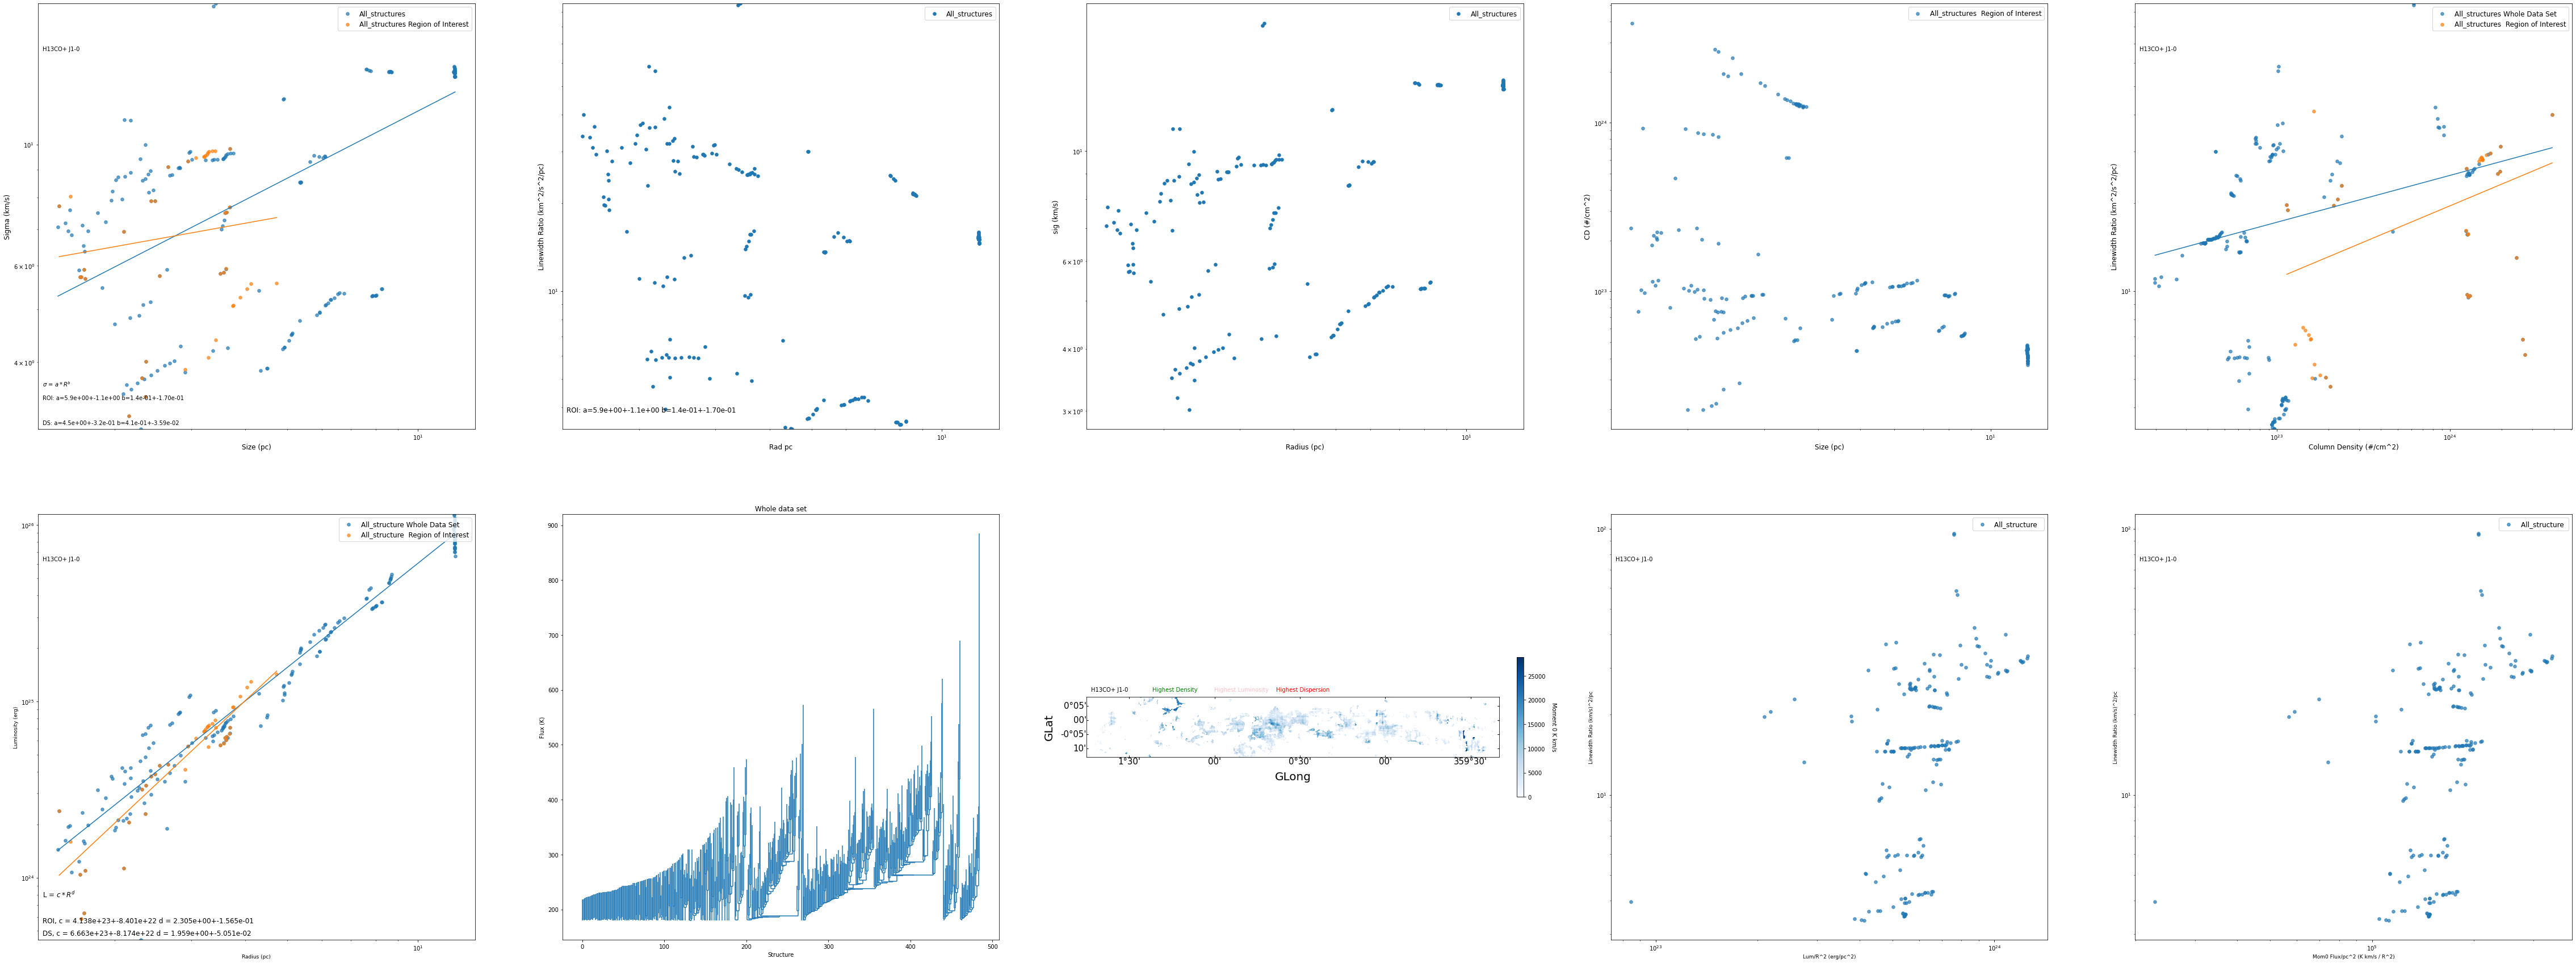

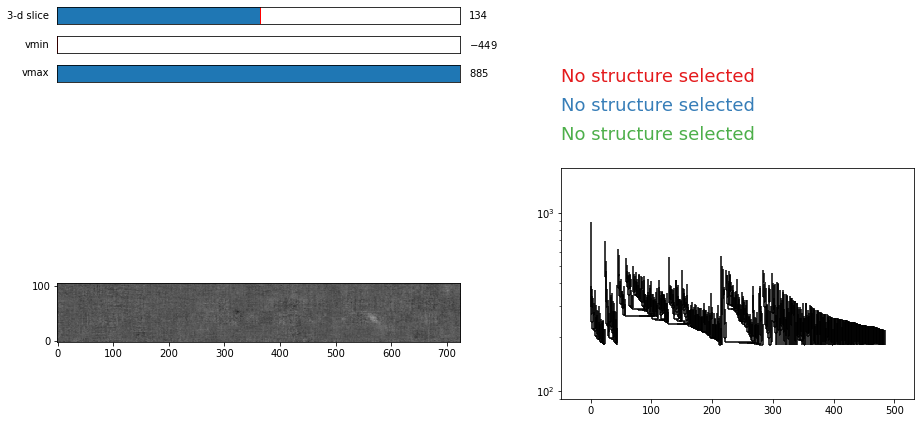

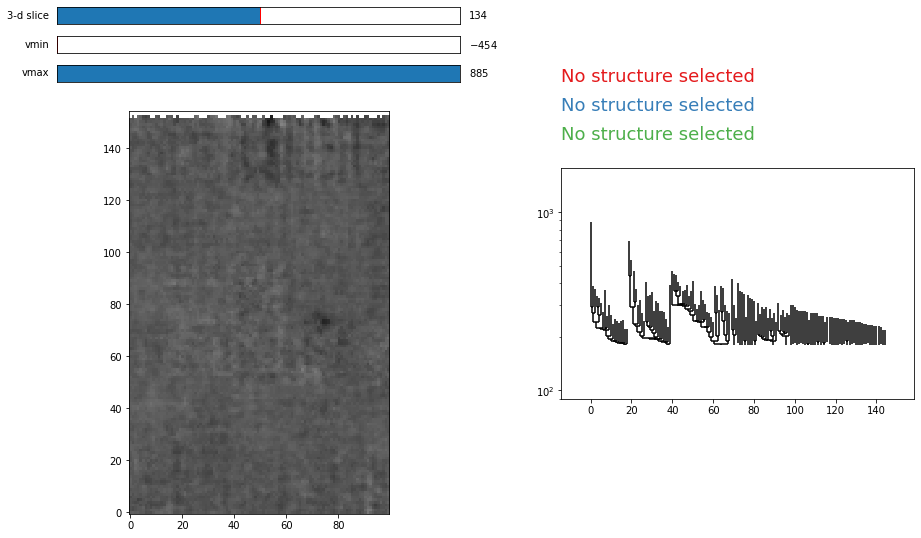

In [119]:
#H13CoP


Num = 3
Overlaps=0
Ram_Limiter = 1
Name = "H13CoP_1_0_Abs_CMZ"
name = "H13CoP_1_0_CM_Contours_DS_10_Abs_CMZ.jpeg"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2
LineN="H13CO+ J1-0"

Names = np.load("Names_CMZ.npy")
Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

np.save("Names_CMZ",Names)

print(Name)


paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V2.fits"])
path = paths[Num]

#pathCont = 'CMZ_Continuum_Reproject.fits'

#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data_CMZ.npy')

Noises = np.load('Noises_K_CMZ.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image

#Put this up here for the column density map


pathCont = 'CMZ_Continuum_Splice.fits'
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
scContW = scCont[30:np.shape(scCont)[0]-30,20:np.shape(scCont)[1]-20] # Make a subcube
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

#Q = SpectralCube.read(path).downsample_axis(2,axis=0).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)
Q = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat =np.copy( sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))

datn = dat[5:np.shape(dat)[0]-5,30:np.shape(dat)[1]-30,20:np.shape(dat)[2]-20] # Make a subcube
scF= scn[5:np.shape(dat)[0]-5,30:np.shape(scn)[1]-30,20:np.shape(scn)[2]-20] # Make a subcube

#Do the same thing to the continuum image

metadata = {}
metadata["Cwcs"] = scContW.wcs
print(np.shape(datn),np.shape(scContW))

try:
    #
    sssss=1
except:
    #
    sssss=1
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#For gaussian beam#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam

metadata['beam_area_ratioc']=beam_area_ratioc

metadata["arc_per_pix"]= abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
D_Es = np.load("Pixel_D.npy")*u.Mpc
#print(D_Es)
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_Es/u.Mpc


#Cubes with little dense gas and abs
'''
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))
'''
UL1 = SkyCoord('00d55m00s',  '-00d50m00s', frame='galactic')#These are away from the sources
UL2 = SkyCoord('00d35m00s','01d30m00s', frame='galactic')
scWCS = scF.wcs[:][:][0]
#scWCSNA = SCNA.wcs[:][:][0]
#moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
ROI = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
ROI_Line = Crop(scn,scn.wcs[:][:][0],UL1,UL2,5,False)
moment_0_ROI = ROI_Line.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 

moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot((LineN+" Moment 0"),"Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data)*.2,scCont.wcs,1,1,1,True)
#Make_Plot((LineN+" Moment 0"),"Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
#print(rmU[0][0])
######ratio

Np1 = SkyCoord('359d40m00s',  '00d04m00s', frame='galactic')#These are away from the sources
Np2 = SkyCoord('359d35m00s','00d08m00s', frame='galactic')
NraDP1 = [int(scContW.wcs.world_to_pixel(Np1)[0]),int(scContW.wcs.world_to_pixel(Np1)[1])]
NraDP2 = [int(scContW.wcs.world_to_pixel(Np2)[0]),int(scContW.wcs.world_to_pixel(Np2)[1])]
#print(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])
#if(str(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])))!=str(np.nan)):
#bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
bp = np.where(cSD<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_sub.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
cSD[bp]=np.nan
rmU[bp]=np.nan
    #rmU[bp2]=np.nan

#print(cSD[0][0])

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",np.array(cSD*u.cm**2,dtype=type(.08)),float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot((LineN+" Moment 0/Column Density"),"Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)


#Region of interest in the cont

Find_Pixel_D(ROI.hdu.data,metadata,"Brightest_CD")

D_EROI = np.load("Brightest_CD.npy")*u.Mpc
pc_per_pixelcROI = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_EROI/u.Mpc

cSDROI = (Flux_to_Mass(ROI.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata,D_Name = "Brightest_CD.npy")/(pc_per_pixelcROI*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmROI=moment_0_ROI.hdu.data/cSDROI
rmUROI = rmROI*u.K*u.km/u.s#Just put back in the units
rmUROI = np.array(rmUROI /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all

######ratio
    
#bproi = np.where(cSDROI<=np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
bproi = np.where(cSDROI<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_ROI.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
cSDROI[bproi]=np.nan
rmUROI[bproi]=np.nan
#rmUROI[bp2]=np.nan

z,yf,xf = np.where(ROI_Line.hdu.data==np.nanmax(ROI_Line.hdu.data))
print(xf,yf,np.shape(ROI.hdu.data))
xf,yf = float(xf/np.shape(ROI.hdu.data)[1]),float(yf/np.shape(ROI.hdu.data)[0])
xf,yf = .5,.4
print(type(xf),type(.5),yf)
Make_Plot_Anno((LineN+" Moment 0 (K km/s) Cluster Middle"),"x",moment_0_ROI.hdu.data,0,np.nanmax(moment_0_ROI.hdu.data),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster Middle","x",np.array(cSDROI*u.cm**2,dtype=type(.08)),float(np.nanmin(cSDROI*u.cm**2)),float(np.nanmax(cSDROI*u.cm**2)),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno((LineN+" Moment 0/Column Density Cluster Middle"),"x",rmUROI,np.nanmean(rmUROI)*.5,abs(np.nanmean(rmUROI))*8,ROI.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))




header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
    print(freq)
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =scF[0][0][0].unit# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio =1.13309* metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] = np.sqrt(abs(header["CDELT1"])*u.degree**2*abs(header["CDELT2"]))
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*D_Es/u.Mpc)**2#mpc^2/pix^2

#print(area_res,type(area_res))
print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0



metadata["ARND"] = abs(header["CDELT1"])*abs(header["CDELT2"])







d = astrodendro.Dendrogram.compute(datn,min_delta=m*1,min_value=m*5,min_npix=beam_area_ratio.value) #The main culprit
#dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit


dUL = astrodendro.Dendrogram.compute(ROI_Line.hdu.data,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit



##Analyze dendograms
print(np.shape(d))




fig = plt.figure(1,figsize=(80,80))


axAlpha = pylab.subplot(5, 5, 7)


axGamma = pylab.subplot(5, 5, 9)




p=d.plotter()
p.plot_tree(axAlpha)
axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")

            
'''

p=dNA.plotter()
p.plot_tree(axBeta)
axBeta.set_xlabel("Structure")
axBeta.set_ylabel("Flux (K)")
axBeta.set_title("No absorption region")

'''
#p=dUL.plotter()
#p.plot_tree(axGamma)
#xGamma.set_xlabel("Structure")
#axGamma.set_ylabel("Flux (K)")
#axGamma.set_title("Region of Interest")
''''''

pc_per_pixel = abs(header["CDELT1"])/180*np.pi*D_Es/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
Rads,Sigmas,CD,Lumin ,SIDS,MOM0FLUX= Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)

#Plot contours for the top ten clusters


scCropped =scF.moment0().hdu.data
scCropped[np.where(scF.moment0().hdu.data<.22)]=np.nan
print(np.nanmean(np.nanstd(scF.moment0().hdu.data))*1)
scCropped[bp]=np.nan
axBeta = pylab.subplot(5,5,8,projection=scF.moment0().wcs)
#axBeta.imshow(scCropped.moment0().hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,norm=colors.LogNorm(vmin=5))
imBeta = axBeta.imshow(scCropped, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(scCropped)*.7 )



ColumnCon= np.concatenate((CD[0],CD[1]))
SIDScon = np.concatenate((SIDS[0],SIDS[1]))
#nth = 0#sorted(ColumnCon)[len(ColumnCon)-30]
nth = 0#sorted(CD[0])[len(CD[0])-10]
nth2 = 0#sorted(Lumin[0])[len(Lumin[0])-10]
nth3 = 0#sorted(Sigmas[0])[len(Sigmas[0])-10]
#top = np.where(CD[0]>=nth)
#print(list(top))
'''
for n in range(len(ColumnCon)):
    
    if(ColumnCon[n]>=nth):
        #print(n,SIDS[0])
        p.plot_contour(axBeta, structure=int(SIDScon[n]), lw=.1, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
'''
G1 = True
G2 = True
G3 = True
for n in range(len(CD[0])):
    
    if(CD[0][n]>=nth):
        #print(n,SIDS[0])
        if(G1):
            G1=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green',label="Higest Density")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Lumin[0][n]>=nth2):
        #print(n,SIDS[0])
        if(G2):
            G2=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink",label="Highest Luminosity (Leaves)")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink")
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Sigmas[0][n]>=nth3):
        #print(n,SIDS[0])
        if(G3):
            G3=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red',label="Highest Dispersion")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
   
  


RA = axBeta.coords[0]                                                                  # 
Dec = axBeta.coords[1]

RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
pylab.ylabel('GLat',fontsize=20,labelpad=1)
axBeta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=LineN,fontsize=10,xy=(.01,1.1),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.16,1.1),xycoords="axes fraction",c="green")  
pylab.annotate(s="Highest Luminosity",fontsize=10,xy=(.31,1.1),xycoords="axes fraction",c="pink")  
pylab.annotate(s="Highest Dispersion",fontsize=10,xy=(.46,1.1),xycoords="axes fraction",c="red")  

    
    
    
    
#RadsNA,SigmasNA,CDNA,LuminNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL = Dendro_Arrays(dUL,ROI_Line.hdu.data,vel,ROI.hdu.data,metadata)


#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)







    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)



xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])



LuminCon = np.concatenate((Lumin[0],Lumin[1]))

MOM0FLUXcon = np.concatenate((MOM0FLUX[0],MOM0FLUX[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])



#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)

cgp = ColumnCon[gp2]
radgpFORRAT = Rcon[gp2]*10**6
siggpFORRAT = Scon[gp2]


lumFORRAT = LuminCon[gp2]
mom0FORRAT = MOM0FLUXcon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])


print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))



print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))






print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))



ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)



print(np.shape(Rcon*10**6),np.shape(Scon),np.shape(Rads[0]*10**6),np.shape(Sigmas[0]),np.shape(Rads[1]*10**6),np.shape(Sigmas[1]),type(Rads[0]))
#xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(Rads[0]*10**6,Sigmas[0],s=30),ax2.scatter(Rads[1]*10**6,Sigmas[1],s=30)
xpcon = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30,alpha=.7)
#p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)
p = ax2.plot(xs,ysCon)

#pNA = ax2.plot(xsNA,ysNA)
#xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30,alpha=.7)

xpconhh = ax2.scatter(RconUL*10**6,SconUL,label="All_structures Region of Interest",s=30,alpha=.7)
xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])
p22 = ax2.plot(xsUL,ysUL)


st="DS: a="+ str(np.format_float_scientific(poptCon[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[0][0]),1))+" b="+str(np.format_float_scientific(poptCon[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")

st="ROI: a="+ str(np.format_float_scientific(poptUL[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[0][0]),1))+" b="+str(np.format_float_scientific(poptUL[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.07),xycoords="axes fraction")
ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)





xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)
#pF = ax3.plot(xsCD,ysCD)
#ax3.annotate(s=r'$\sigma^2/R$ = $e*N^f$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#st = "e = "+ str(np.format_float_scientific(CDpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[0][0]),3))+" f = "+str(np.format_float_scientific(CDpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[1][1]),3))

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad pc",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)
#pFLL = ax4.plot(xsRL,ysRL)

#st = "c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
#ax4.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#ax4.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
#ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")














LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
print(np.shape(radgpUL),np.shape(lgpUL))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6
CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])

print(poptUL,pcovUL,"Size Linewidth Region of Interest:")
print("a = ",poptUL[0],"+-",np.sqrt(pcovUL[0][0]))
print("b = ",poptUL[1],"+-",np.sqrt(pcovUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity  Region of Interest:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(radgpFORRAT,cgp,label="All_structures  Region of Interest",s=30,alpha=.7)
#p2 = ax5.plot(xsUL,ysUL)


ax5.set_yscale('log')
ax5.set_xscale('log')
#ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=12)
ax5.set_ylabel("CD (#/cm^2)",fontsize=12)
ax5.legend(prop={'size': 12},loc="upper right")


#gp = np.where(FRs>0)



xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Data Set",s=30,alpha=.7)
pFUL2 = ax6.plot(xsCD,ysCD)


#xspFNA = ax6.scatter(cgpNA,rgpNA,label="All_structures Sparse Region",s=30,alpha=.7)
#pFNA = ax6.plot(xsCDNA,ysCDNA)


xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures  Region of Interest",s=30,alpha=.7)
pFUL = ax6.plot(xsCDUL,ysCDUL)

#ax6.annotate(s=st,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=12)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax6.legend(prop={'size': 12},loc="upper right")
ax6.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")




xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)
#xspLu2NA = ax7.scatter(radgpNA,lgpNA,label="All_structure Sparse Region",s=30,alpha=.7)
#pFLLu2NA = ax7.plot(xsRLNA,ysRLNA)

xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure  Region of Interest",s=30,alpha=.7)

pFLLu = ax7.plot(xsRLUL,ysRLUL)


st = "DS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.10),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")
st2 = "ROI, c = "+ str(np.format_float_scientific(RLpoptUL[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptUL[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[1][1]),3))
ax7.annotate(s=st2,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

#st3 = "SR, c = "+ str(np.format_float_scientific(RLpoptNA[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptNA[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[1][1]),3))
#ax7.annotate(s=st3,fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#print(FRs)



lum_rat = axGamma.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axGamma.set_yscale('log')
axGamma.set_xscale('log')
axGamma.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axGamma.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axGamma.legend(prop={'size': 12},loc="upper right")
axGamma.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)



#mom0_rat = axDelta.scatter(mom0FORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  Region of Interest",s=30,alpha=.7)
gp4=np.where(MOM0FLUXcon>0)
mom0FORFlux=MOM0FLUXcon[gp4]
radgpFORFlux=Rcon[gp4]*10**6
rgpFORFlux=Scon[gp4]**2/Rcon[gp4]/10**6
mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")

NameColROI = (Name+"_Column_ROI")
NameLumROI = (Name+"_Luminosities_ROI")
NameRROI = (NameR+"_ROI")
NameSROI = (NameS+"_ROI")
NameFlux = (Name+"Flux_Dense")
NameRFF = (Name+"Rad_For_Flux")

v1 = d.viewer()
v1.show()
v3 = dUL.viewer()
v3.show()

np.save(NameCol,CD)
np.save(NameLum,Lumin)

np.save(NameS,Sigmas)
np.save(NameR,Rads) #Still in [leaves] [breanches] format

np.save(NameColROI,CDUL)
np.save(NameLumROI,LuminUL)

np.save(NameSROI,SigmasUL)
np.save(NameRROI,RadsUL) #Still in [leaves] [breanches] format

np.save(NameFlux,mom0FORFlux/radgpFORFlux**2)
np.save(NameRFF,rgpFORFlux)



CO_3_2_Abs_CMZ
Fixed_Spliced_CO_V3.fits
0.6080490683549578
(201, 131, 1200) (201, 131, 1200)
(191, 71, 1160) (71, 1160)
4.7577678323926253e-07 PC per pix


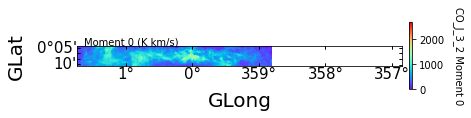

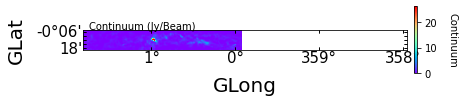

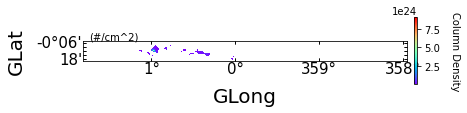

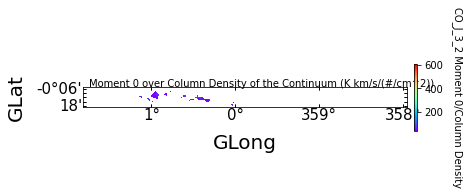

[60] [59] (124, 79)
<class 'float'> <class 'float'> 0.4


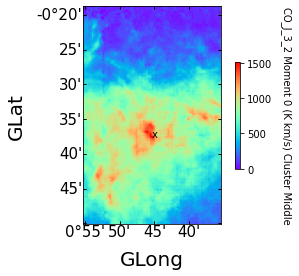

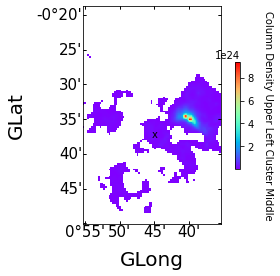

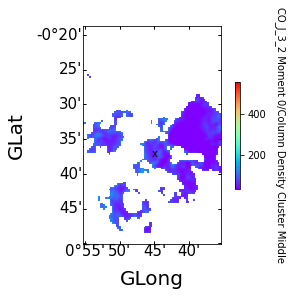

0.7664647648256748

345795989900.0 Hz 0.0008669633736547851 m
38.98800015444 arcsec 38.98800015444 arcsec
7.520864604102317 pix2
{'Cwcs': WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-SIN'  'GLAT-SIN'  
CRVAL : 1.8151153422254  -0.3149907670066  
CRPIX : -20.0  -30.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.004203652201987  0.004203652201987  
NAXIS : 1160  71, 'beam_area_ratioc': <Quantity 2.61283831 pix2>, 'arc_per_pix': <Quantity 12.00000074 arcsec / pix>, 'wavelength': <Quantity 0.00086696 m>, 'data_unit': Unit("K"), 'arc_per_pix_y': <Quantity 15.13314793 arcsec / pix>, 'arc_per_pix_x': <Quantity 15.13314793 arcsec / pix>, 'beam_major': <Quantity 38.98800015 arcsec>, 'beam_minor': <Quantity 38.98800015 arcsec>, 'beam_area_ratio': <Quantity 7.5208646 pix2>, 'spatial_scale': <Quantity 0.00420365 deg>, 'velocity_scale': <Quantity 2.5 km / s>, 'vaxis': 0, 'ARND': 1.7670691835270152e-05}
(9077,)
268.6874084472656
(6830,)
(6830,) (6830,)
[4.56048229 0.52582204

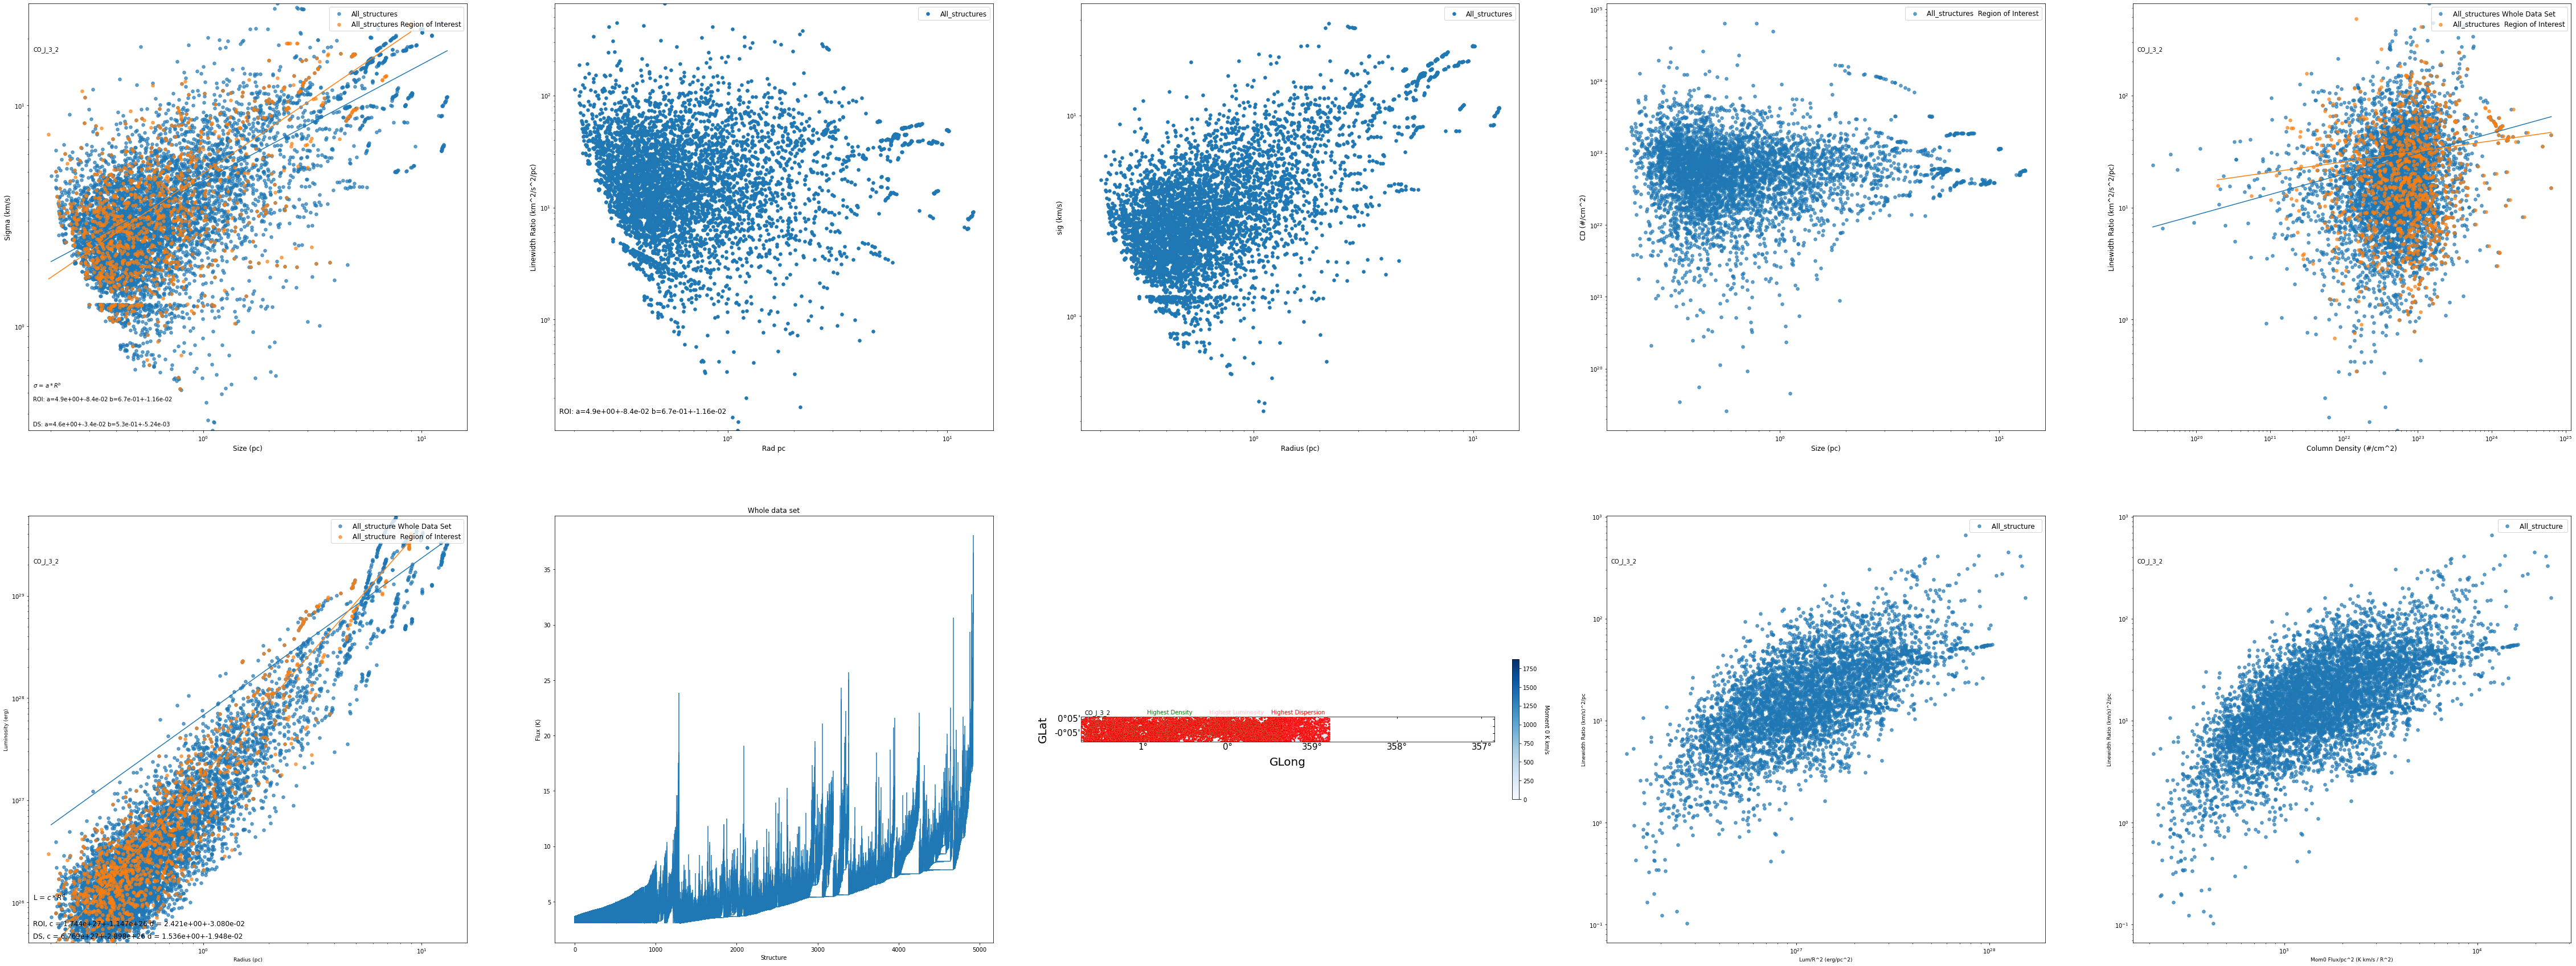

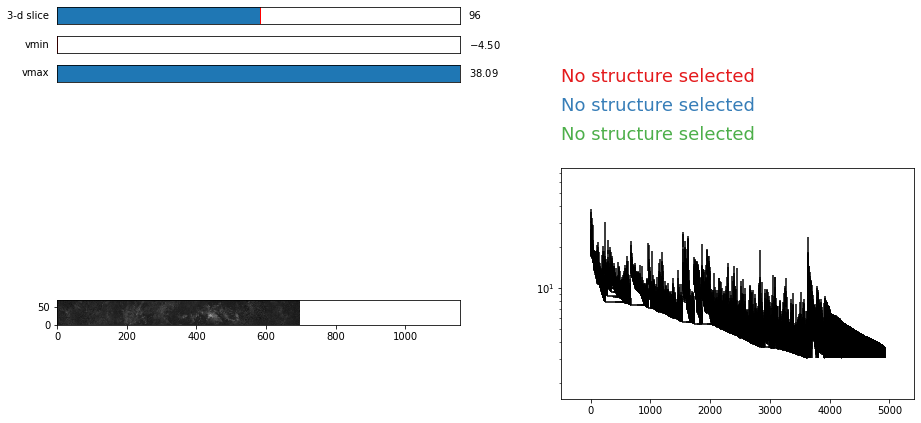

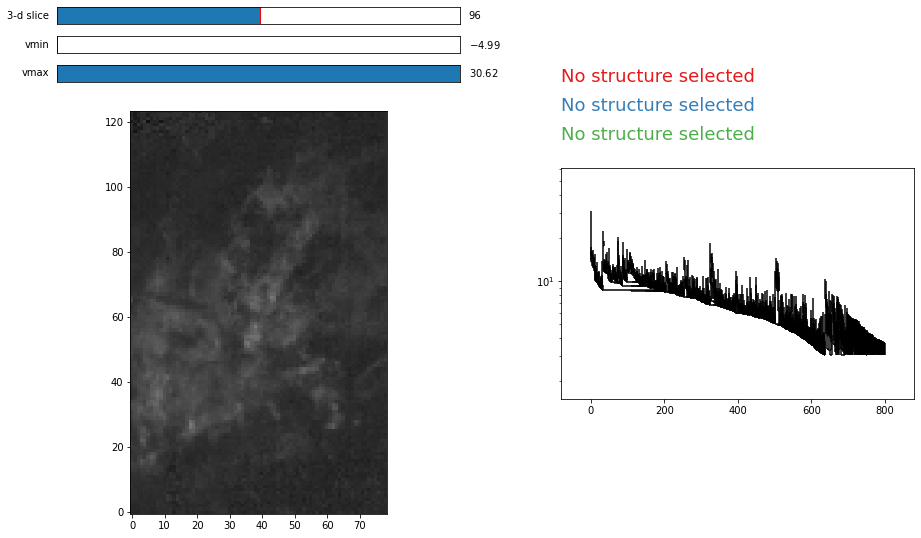

In [13]:

#CO3-2


Num = 4
Overlaps=0
Ram_Limiter = 1
Name = "CO_3_2_Abs_CMZ"
name = "CO_3_2_CM_Contours_DS_10_Abs_CMZ.jpeg"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2
LineN="CO_J_3_2"

Names=np.load("Names_CMZ.npy")
Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

np.save("Names_CMZ",Names)

print(Name)


paths = pylab.array(['Fixed_cmz_HCOp.cube.mJy-kms.pbcor.fits','Fixed_cmz_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_cmz_H13COp.cube.reproject.mJy-kms.pbcor.fits',"Fixed_Spliced_CO_V2.fits"])
path = paths[Num]
path= "Fixed_Spliced_CO_V3.fits" #Nico reproj, no beam, repro to hco+, splice

#pathCont = 'CMZ_Continuum_Reproject.fits'
pathCont = 'CMZ_Continuum_Splice.fits'
#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data_CMZ.npy')

Noises = np.load('Noises_K_CMZ.npy')
#Noises = Ns
m = Noises[Num]
#m=.115
print(m)
#Continuum image
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
#Put this up here for the column density map



#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
#print(Qp.world[:,0,0])
h = Qp.hdu.header
#print(sss.world[:,0,0])
Qp.allow_huge_operations=True

#Q = SpectralCube.read(path).downsample_axis(2,axis=0).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)
Q = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s).to(u.K)
#print(Q[0][0][0],Q.world[:,0,0][0])

#print(Q.world[:,0,0])
sc = Q.unmasked_copy()

#scQ = Q
scW = sc.wcs[:][:][0]


dat =np.copy( sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))

datn = dat[5:np.shape(dat)[0]-5,30:np.shape(dat)[1]-30,20:np.shape(dat)[2]-20] # Make a subcube
scF= scn[5:np.shape(dat)[0]-5,30:np.shape(scn)[1]-30,20:np.shape(scn)[2]-20] # Make a subcube

#Do the same thing to the continuum image
scContW = scContW.reproject(scF.moment0().hdu.header)#[30:np.shape(scn)[1]-30,20:np.shape(scn)[2]-20] # Make a subcube
metadata = {}
metadata["Cwcs"] = scContW.wcs
print(np.shape(datn),np.shape(scContW))

try:
    #
    sssss=1
except:
    #
    sssss=1
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#For gaussian beam#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam

metadata['beam_area_ratioc']=beam_area_ratioc

metadata["arc_per_pix"]= abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
D_Es =  8.178 *10**-3*u.Mpc#np.load("Pixel_D.npy")*u.Mpc
#print(D_Es)
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_Es/u.Mpc
print(pc_per_pixelc, "PC per pix")

#Cubes with little dense gas and abs

UL1 = SkyCoord('00d55m00s',  '-00d50m00s', frame='galactic')#These are away from the sources
UL2 = SkyCoord('00d35m00s','01d30m00s', frame='galactic')
scWCS = scF.wcs[:][:][0]
#scWCSNA = SCNA.wcs[:][:][0]
#moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 

ROI_Line = Crop(scn,scn.wcs[:][:][0],UL1,UL2,5,False)
ROI = ROI.reproject(moment_0_ROI.hdu.header)#Crop(scCont,scCont.wcs,UL1,UL2,5,True)

moment_0_ROI = ROI_Line.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 

moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot((LineN+" Moment 0"),"Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data)*.2,scCont.wcs,1,1,1,True)
#Make_Plot((LineN+" Moment 0"),"Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
#print(rmU[0][0])
######ratio

Np1 = SkyCoord('359d40m00s',  '00d04m00s', frame='galactic')#These are away from the sources
Np2 = SkyCoord('359d35m00s','00d08m00s', frame='galactic')
NraDP1 = [int(scContW.wcs.world_to_pixel(Np1)[0]),int(scContW.wcs.world_to_pixel(Np1)[1])]
NraDP2 = [int(scContW.wcs.world_to_pixel(Np2)[0]),int(scContW.wcs.world_to_pixel(Np2)[1])]
#print(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])
#if(str(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])))!=str(np.nan)):
#bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
bp = np.where(cSD<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_sub.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
cSD[bp]=np.nan
rmU[bp]=np.nan
    #rmU[bp2]=np.nan

#print(cSD[0][0])

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",np.array(cSD*u.cm**2,dtype=type(.08)),float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot((LineN+" Moment 0/Column Density"),"Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)


#Region of interest in the cont

Find_Pixel_D(ROI.hdu.data,metadata,"Brightest_CD")

D_EROI = np.load("Brightest_CD.npy")*u.Mpc
pc_per_pixelcROI = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_EROI/u.Mpc

cSDROI = (Flux_to_Mass(ROI.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata,D_Name = "Brightest_CD.npy")/(pc_per_pixelcROI*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmROI=moment_0_ROI.hdu.data/cSDROI
rmUROI = rmROI*u.K*u.km/u.s#Just put back in the units
rmUROI = np.array(rmUROI /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all

######ratio
    
#bproi = np.where(cSDROI<=np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
bproi = np.where(cSDROI<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_ROI.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
cSDROI[bproi]=np.nan
rmUROI[bproi]=np.nan
#rmUROI[bp2]=np.nan

z,yf,xf = np.where(ROI_Line.hdu.data==np.nanmax(ROI_Line.hdu.data))
print(xf,yf,np.shape(ROI.hdu.data))
xf,yf = float(xf/np.shape(ROI.hdu.data)[1]),float(yf/np.shape(ROI.hdu.data)[0])
xf,yf = .5,.4
print(type(xf),type(.5),yf)
Make_Plot_Anno((LineN+" Moment 0 (K km/s) Cluster Middle"),"x",moment_0_ROI.hdu.data,0,np.nanmax(moment_0_ROI.hdu.data),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster Middle","x",np.array(cSDROI*u.cm**2,dtype=type(.08)),float(np.nanmin(cSDROI*u.cm**2)),float(np.nanmax(cSDROI*u.cm**2)),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno((LineN+" Moment 0/Column Density Cluster Middle"),"x",rmUROI,np.nanmean(rmUROI)*.5,abs(np.nanmean(rmUROI))*8,ROI.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))



header = scF.hdu.header
header2= SpectralCube.read(paths[0]).hdu.header
print()
#make metadata for the dendrogram


freq = header["SPEC2A_A"]*u.Hz#
metadata['wavelength']=299792458*u.m/header["SPEC2A_A"]#
print(freq,metadata['wavelength'])
metadata['data_unit'] =scF[0][0][0].unit# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header2["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header2["BMIN"]*3600.0 * u.arcsec
beam_area_ratio =1.13309* metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] = np.sqrt(abs(header["CDELT1"])*u.degree**2*abs(header["CDELT2"]))
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*D_Es/u.Mpc)**2#mpc^2/pix^2

#print(area_res,type(area_res))
print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0



metadata["ARND"] = abs(header["CDELT1"])*abs(header["CDELT2"])



print(metadata)


d = astrodendro.Dendrogram.compute(datn,min_delta=m*1,min_value=m*5,min_npix=beam_area_ratio.value) #The main culprit
#dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit


dUL = astrodendro.Dendrogram.compute(ROI_Line.hdu.data,min_value=m*5,min_delta=m*1,min_npix=beam_area_ratio.value) #The main culprit



##Analyze dendograms
print(np.shape(d))




fig = plt.figure(1,figsize=(80,80))


axAlpha = pylab.subplot(5, 5, 7)


axGamma = pylab.subplot(5, 5, 9)




p=d.plotter()
p.plot_tree(axAlpha)
axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")

            


#p=dUL.plotter()
#p.plot_tree(axGamma)
#xGamma.set_xlabel("Structure")
#axGamma.set_ylabel("Flux (K)")
#axGamma.set_title("Region of Interest")
''''''

pc_per_pixel = abs(header["CDELT1"])/180*np.pi*D_Es/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
#print(vel,header)
Rads,Sigmas,CD,Lumin ,SIDS,MOM0FLUX= Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)

#Plot contours for the top ten clusters


scCropped =scF.moment0().hdu.data
scCropped[np.where(scF.to(u.K).moment0().hdu.data<.22)]=np.nan
print(np.nanmean(np.nanstd(scF.moment0().hdu.data))*1)
scCropped[bp]=np.nan
axBeta = pylab.subplot(5,5,8,projection=scF.moment0().wcs)
#axBeta.imshow(scCropped.moment0().hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,norm=colors.LogNorm(vmin=5))
imBeta = axBeta.imshow(scCropped, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(scCropped)*.7 )



ColumnCon= np.concatenate((CD[0],CD[1]))
SIDScon = np.concatenate((SIDS[0],SIDS[1]))
#nth = 0#sorted(ColumnCon)[len(ColumnCon)-30]
nth = 10**22#sorted(CD[0])[len(CD[0])-10]
nth2 = 10**25#sorted(Lumin[0])[len(Lumin[0])-10]
nth3 = 1#sorted(Sigmas[0])[len(Sigmas[0])-10]
#top = np.where(CD[0]>=nth)
#print(list(top))

for n in range(len(ColumnCon)):
    
    if(ColumnCon[n]>=nth):
        #print(n,SIDS[0])
        p.plot_contour(axBeta, structure=int(SIDScon[n]), lw=.1, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?

G1 = True
G2 = True
G3 = True

for n in range(len(CD[0])):
    
    if(CD[0][n]>=nth):
        #print(n,SIDS[0])
        if(G1):
            G1=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green',label="Higest Density")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Lumin[0][n]>=nth2):
        #print(n,SIDS[0])
        if(G2):
            G2=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink",label="Highest Luminosity (Leaves)")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink")
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Sigmas[0][n]>=nth3):
        #print(n,SIDS[0])
        if(G3):
            G3=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red',label="Highest Dispersion")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
   
  




RA = axBeta.coords[0]                                                                  # 
Dec = axBeta.coords[1]

RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
pylab.ylabel('GLat',fontsize=20,labelpad=1)
axBeta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=LineN,fontsize=10,xy=(.01,1.1),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.16,1.1),xycoords="axes fraction",c="green")  
pylab.annotate(s="Highest Luminosity",fontsize=10,xy=(.31,1.1),xycoords="axes fraction",c="pink")  
pylab.annotate(s="Highest Dispersion",fontsize=10,xy=(.46,1.1),xycoords="axes fraction",c="red")  

    
    
    
    
#RadsNA,SigmasNA,CDNA,LuminNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL = Dendro_Arrays(dUL,ROI_Line.hdu.data,vel,ROI.hdu.data,metadata)


#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)







    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)



xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])



LuminCon = np.concatenate((Lumin[0],Lumin[1]))

MOM0FLUXcon = np.concatenate((MOM0FLUX[0],MOM0FLUX[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])



#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)

cgp = ColumnCon[gp2]
radgpFORRAT = Rcon[gp2]*10**6
siggpFORRAT = Scon[gp2]


lumFORRAT = LuminCon[gp2]
mom0FORRAT = MOM0FLUXcon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])


print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))



print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))






print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))



ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)



print(np.shape(Rcon*10**6),np.shape(Scon),np.shape(Rads[0]*10**6),np.shape(Sigmas[0]),np.shape(Rads[1]*10**6),np.shape(Sigmas[1]),type(Rads[0]))
#xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(Rads[0]*10**6,Sigmas[0],s=30),ax2.scatter(Rads[1]*10**6,Sigmas[1],s=30)
xpcon = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30,alpha=.7)
#p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)
p = ax2.plot(xs,ysCon)

#pNA = ax2.plot(xsNA,ysNA)
#xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30,alpha=.7)

xpconhh = ax2.scatter(RconUL*10**6,SconUL,label="All_structures Region of Interest",s=30,alpha=.7)
xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])
p22 = ax2.plot(xsUL,ysUL)


st="DS: a="+ str(np.format_float_scientific(poptCon[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[0][0]),1))+" b="+str(np.format_float_scientific(poptCon[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")

st="ROI: a="+ str(np.format_float_scientific(poptUL[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[0][0]),1))+" b="+str(np.format_float_scientific(poptUL[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.07),xycoords="axes fraction")
ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)





xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)
#pF = ax3.plot(xsCD,ysCD)
#ax3.annotate(s=r'$\sigma^2/R$ = $e*N^f$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#st = "e = "+ str(np.format_float_scientific(CDpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[0][0]),3))+" f = "+str(np.format_float_scientific(CDpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[1][1]),3))

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad pc",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)
#pFLL = ax4.plot(xsRL,ysRL)

#st = "c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
#ax4.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#ax4.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
#ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")














LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
print(np.shape(radgpUL),np.shape(lgpUL))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6
CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])

print(poptUL,pcovUL,"Size Linewidth Region of Interest:")
print("a = ",poptUL[0],"+-",np.sqrt(pcovUL[0][0]))
print("b = ",poptUL[1],"+-",np.sqrt(pcovUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity  Region of Interest:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(radgpFORRAT,cgp,label="All_structures  Region of Interest",s=30,alpha=.7)
#p2 = ax5.plot(xsUL,ysUL)


ax5.set_yscale('log')
ax5.set_xscale('log')
#ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=12)
ax5.set_ylabel("CD (#/cm^2)",fontsize=12)
ax5.legend(prop={'size': 12},loc="upper right")


#gp = np.where(FRs>0)



xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Data Set",s=30,alpha=.7)
pFUL2 = ax6.plot(xsCD,ysCD)


#xspFNA = ax6.scatter(cgpNA,rgpNA,label="All_structures Sparse Region",s=30,alpha=.7)
#pFNA = ax6.plot(xsCDNA,ysCDNA)


xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures  Region of Interest",s=30,alpha=.7)
pFUL = ax6.plot(xsCDUL,ysCDUL)

#ax6.annotate(s=st,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=12)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax6.legend(prop={'size': 12},loc="upper right")
ax6.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")




xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)
#xspLu2NA = ax7.scatter(radgpNA,lgpNA,label="All_structure Sparse Region",s=30,alpha=.7)
#pFLLu2NA = ax7.plot(xsRLNA,ysRLNA)

xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure  Region of Interest",s=30,alpha=.7)

pFLLu = ax7.plot(xsRLUL,ysRLUL)


st = "DS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.10),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")
st2 = "ROI, c = "+ str(np.format_float_scientific(RLpoptUL[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptUL[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[1][1]),3))
ax7.annotate(s=st2,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

#st3 = "SR, c = "+ str(np.format_float_scientific(RLpoptNA[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptNA[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[1][1]),3))
#ax7.annotate(s=st3,fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#print(FRs)



lum_rat = axGamma.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axGamma.set_yscale('log')
axGamma.set_xscale('log')
axGamma.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axGamma.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axGamma.legend(prop={'size': 12},loc="upper right")
axGamma.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)



#mom0_rat = axDelta.scatter(mom0FORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  Region of Interest",s=30,alpha=.7)
gp4=np.where(MOM0FLUXcon>0)
mom0FORFlux=MOM0FLUXcon[gp4]
radgpFORFlux=Rcon[gp4]*10**6
rgpFORFlux=Scon[gp4]**2/Rcon[gp4]/10**6
mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")

NameColROI = (Name+"_Column_ROI")
NameLumROI = (Name+"_Luminosities_ROI")
NameRROI = (NameR+"_ROI")
NameSROI = (NameS+"_ROI")
NameFlux = (Name+"Flux_Dense")
NameRFF = (Name+"Rad_For_Flux")

v1 = d.viewer()
v1.show()
v3 = dUL.viewer()
v3.show()

np.save(NameCol,CD)
np.save(NameLum,Lumin)

np.save(NameS,Sigmas)
np.save(NameR,Rads) #Still in [leaves] [breanches] format

np.save(NameColROI,CDUL)
np.save(NameLumROI,LuminUL)

np.save(NameSROI,SigmasUL)
np.save(NameRROI,RadsUL) #Still in [leaves] [breanches] format

np.save(NameFlux,mom0FORFlux/radgpFORFlux**2)
np.save(NameRFF,rgpFORFlux)



['HCOp-J1_Dend_AbsRadii', '2', '3', '6'] ['HCOp-J1_Dend_AbsSigmas', '2', '3', '6']
['HCOp_1_0_Abs_CMZRadii' 'HCN_1_0_Abs_CMZRadii' 'H13CN_1_0_Abs_CMZRadii'
 'H13CoP_1_0_Abs_CMZRad' '5'] ['HCOp_1_0_Abs_CMZSigmas' 'HCN_1_0_Abs_CMZSigmas'
 'H13CN_1_0_Abs_CMZSigmas' 'H13CoP_1_0_Abs_CMZSig' '5']
(10,) (10,) (10,) (10,)
[0.1, 0.6444444444444445, 1.188888888888889, 1.7333333333333336, 2.277777777777778, 2.8222222222222224, 3.366666666666667, 3.911111111111112, 4.455555555555556, 5.0] [712.1950433055091, 17.148572683634434, 5.038675736548714, 2.3704716678067976, 1.3727019276084766, 0.8941626651953971, 0.6283457886236233, 0.4655846341340572, 0.3587527347948473, 0.2848780173222037] 1.8118575705196 0.4757767832392624


FileNotFoundError: [Errno 2] No such file or directory: '2_Leaves.npy'

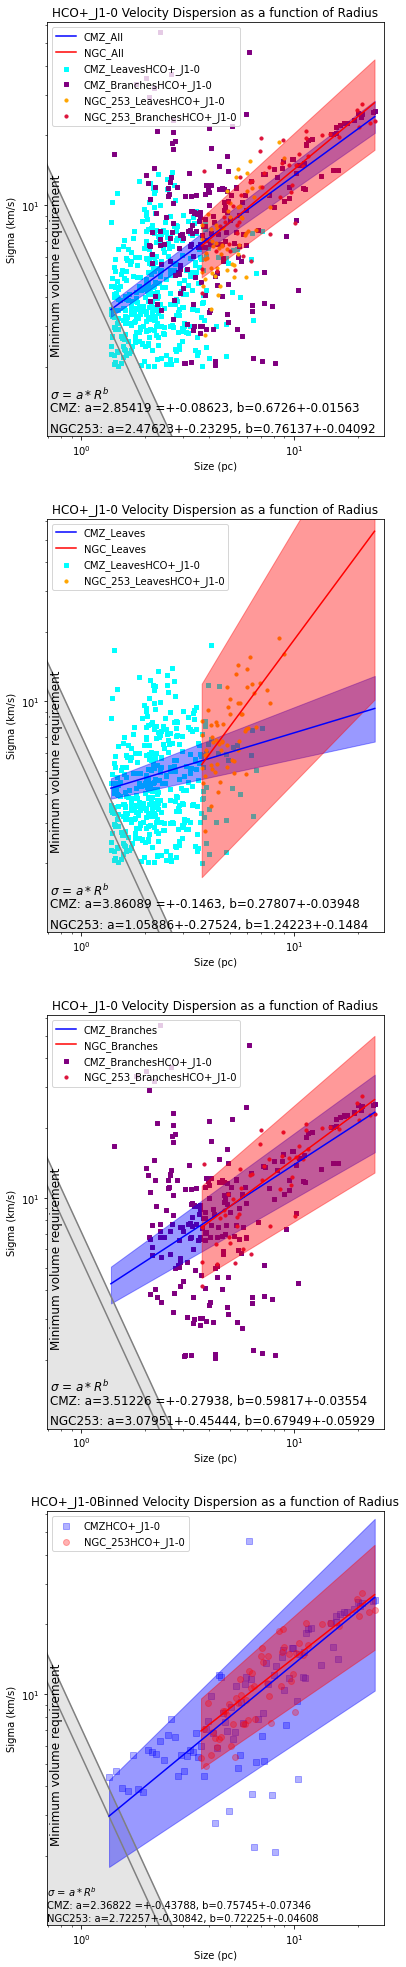

In [114]:
RNames = np.load("RNames_CMZ.npy")
SNames = np.load("SNames_CMZ.npy")
CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0"]
NGCRNames = np.load("RNames.npy")
NGCSNames = np.load("SNames.npy")

#ONGCR = [NGCRNames[9],NGCRNames[10],NGCRNames[8]]
#ONGCS = [NGCSNames[9],NGCSNames[10],NGCSNames[8]] 4-3
ONGCR = [NGCRNames[0],NGCRNames[1],NGCRNames[2],NGCRNames[5]]
ONGCS = [NGCSNames[0],NGCSNames[1],NGCSNames[2],NGCSNames[5]] #1-0

Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")

SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

SpRes= np.load("CZM_Spres.npy")
NSpRes = np.load("NGC_Spres.npy")

print(ONGCR,ONGCS)
print(RNames,SNames)
#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(35,35))


for i in range(4):
    #make minimum space line
    
    ysp=SpecRes[i]
    xsp=SpRes[i]
    Nysp=NSpecRes[i]
    Nxsp=NSpRes[i]
    
    
    #def space(v,*args):
    #    r,bar,vres,sres = args[0],args[1],args[2],args[3]
    #    return  float(50*vres*sres**2/np.sqrt(50))-v*r**2*np.pi
    def MinSpace(*args):
        r,vres,sres = args[0],args[1],args[2]
        if (math.floor(1/sres**2*r**2*np.pi)==0):
            return np.nan
        else:

            vp = math.ceil(50/math.floor(1/sres**2*r**2*np.pi)) #minimum number of velocity channels the structures must be in

            DumCube = np.array([]) #make a cube that would have the minimum rms possible
            for i in range(vp):
                for n in range(math.floor(1/sres**2*r**2*np.pi)):
                    DumCube = np.append(DumCube,i*vres)
            rms = np.std(DumCube)**2 #The rms is the variance of this 'cube'

            return rms

    
        
    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]

    
    Nminsigs=[]
    zeros=[]
    
    rs=np.linspace(0.1,5,10)
    L=np.linspace(-1,20,10)
    for t in range(10):
        ps = 0
        xsps.append(xsp*2.075)
        ysps.append(ysp)
        
        Nxsps.append(Nxsp)
        Nysps.append(Nysp)
        
        #print(scipy.optimize.fsolve(space,x0=-100,factor=1,xtol=10**-20,args=(rs[t],NBars[i],SpecRes[i],SpRes[i]),full_output=True,maxfev=10000))
        #print(float(scipy.optimize.fsolve(space,x0=-100,factor=1,xtol=10**-20,args=(rs[t],NBars[i],SpecRes[i],SpRes[i]),maxfev=10000)))
        #minsigs.append(float(scipy.optimize.fsolve(space,x0=-100,factor=1,xtol=10**-20,args=(rs[t],NBars[i],SpecRes[i],SpRes[i]),maxfev=10000)))
        #Nminsigs.append(float(scipy.optimize.fsolve(space,x0=-100,factor=1,xtol=10**-20,args=(rs[t],NBars[i],NSpecRes[i],NSpRes[i]),maxfev=10000)))
        Nminsigs.append(np.roots([rs[t]**2,-NSpecRes[i]*3*NSpRes[i]**2])[0])
        minsigs.append(np.roots([rs[t]**2,-SpecRes[i]*3*SpRes[i]**2*2.0475**2*1.3807])[0])
        #Nminsigs.append(MinSpace(rs[t],SpecRes[i],SpRes[i]))
        #minsigs.append(MinSpace(rs[t],NSpecRes[i],NSpRes[i]))
        line.append(rs[t])
        zeros.append(-1)
    #print(minsigs,line)
    rnameL=RNames[i]+"_Leaves.npy"
    snameL=SNames[i]+"_Leaves.npy"
    rnameB=RNames[i]+"_Branches.npy"
    snameB=SNames[i]+"_Branches.npy"
    
    NGCrnameL=ONGCR[i]+"_Leaves.npy"
    NGCsnameL=ONGCS[i]+"_Leaves.npy"
    NGCrnameB=ONGCR[i]+"_Branches.npy"
    NGCsnameB=ONGCS[i]+"_Branches.npy"
    
    radsL = np.load(rnameL)*10**6#pc
    sigsL = np.load(snameL)
    radsB = np.load(rnameB)*10**6#pc
    sigsB = np.load(snameB)
    
    radsNGCL = np.load(NGCrnameL)*10**6
    sigsNGCL = np.load(NGCsnameL)
    radsNGCB = np.load(NGCrnameB)*10**6
    sigsNGCB = np.load(NGCsnameB)
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,radsB)), np.concatenate((sigsL,sigsB))
    
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
    (popt, pcov),(popt2, pcov2),(poptT, pcovT) = (curve_fit(func, radsL, sigsL)),(curve_fit(func, radsB, sigsB)),(curve_fit(func, rads,sigs))
    (Npopt, Npcov),(Npopt2, Npcov2),(NpoptT, NpcovT) = (curve_fit(func, radsNGCL, sigsNGCL)),(curve_fit(func, radsNGCB, sigsNGCB)),(curve_fit(func, radsNGC,sigsNGC ))
    
    
    axA = pylab.subplot(4, 5, i+1)
    axL = pylab.subplot(4, 5, i+6)
    axB = pylab.subplot(4, 5, i+11)
    xp1L = axL.scatter(radsL, sigsL,c="Cyan",alpha=1,label=("CMZ_Leaves"+CMZLs[i]),marker='s',s=10,facecolors='none')
    xp1B = axB.scatter(radsB, sigsB,c="Purple",alpha=1,label=("CMZ_Branches"+CMZLs[i]),marker='s',s=10,facecolors='black')
    xp1AL = axA.scatter(radsL, sigsL,c="Cyan",alpha=1,label=("CMZ_Leaves"+CMZLs[i]),marker='s',s=10,facecolors='none')
    xp1AB = axA.scatter(radsB, sigsB,c="Purple",alpha=1,label=("CMZ_Branches"+CMZLs[i]),marker='s',s=10,facecolors='black')
    
    xs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    ysL,ysB,ysT=func(xs,popt[0],popt[1]),func(xs,popt2[0],popt2[1]), func(xs,poptT[0],poptT[1])
    xpaL,xpaB,xpaT = axL.plot(xs,ysL,c='Blue',label="CMZ_Leaves"),axB.plot(xs,ysB,c='Blue',label="CMZ_Branches"),axA.plot(xs,ysT,c='Blue',label='CMZ_All')
    
    er_r=2
    yusL,yusB,yusT  = func(xs, popt[0]+np.sqrt(pcov[0][0])*er_r,popt[1]+np.sqrt(pcov[1][1])*er_r),func(xs, popt2[0]+np.sqrt(pcov2[0][0])*er_r,popt2[1]+np.sqrt(pcov2[1][1])*er_r),func(xs, poptT[0]+np.sqrt(pcovT[0][0])*er_r,poptT[1]+np.sqrt(pcovT[1][1])*er_r)
    ylsL,ylsB,ylsT  = func(xs, popt[0]-np.sqrt(pcov[0][0])*er_r,popt[1]-np.sqrt(pcov[1][1])*er_r),func(xs, popt2[0]-np.sqrt(pcov2[0][0])*er_r,popt2[1]-np.sqrt(pcov2[1][1])*er_r),func(xs, poptT[0]-np.sqrt(pcovT[0][0])*er_r,poptT[1]-np.sqrt(pcovT[1][1])*er_r)
    xpaFL,xpaFB,xpaFT = axL.fill_between(xs,ylsL,yusL,color="Blue",alpha=.4),axB.fill_between(xs,ylsB,yusB,color="Blue",alpha=.4),axA.fill_between(xs,ylsT,yusT,color="Blue",alpha=.4)
    
    
    
    
    Nxp1L = axL.scatter(radsNGCL, sigsNGCL,c="Orange",alpha=1,label=("NGC_253_Leaves"+CMZLs[i]),marker='o',s=10,facecolors='none')
    Nxp1B = axB.scatter(radsNGCB, sigsNGCB,c="Crimson",alpha=1,label=("NGC_253_Branches"+CMZLs[i]),marker='o',s=10,facecolors='black')
    Nxp1AL = axA.scatter(radsNGCL, sigsNGCL,c="Orange",alpha=1,label=("NGC_253_Leaves"+CMZLs[i]),marker='o',s=10,facecolors='none')
    Nxp1AB = axA.scatter(radsNGCB, sigsNGCB,c="Crimson",alpha=1,label=("NGC_253_Branches"+CMZLs[i]),marker='o',s=10,facecolors='black')
    
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    NysL,NysB,NysT=func(Nxs,Npopt[0],Npopt[1]),func(Nxs,Npopt2[0],Npopt2[1]), func(Nxs,NpoptT[0],NpoptT[1])
    NxpaL,NxpaB,NxpaT = axL.plot(Nxs,NysL,c='Red',label="NGC_Leaves"),axB.plot(Nxs,NysB,c='Red',label="NGC_Branches"),axA.plot(Nxs,NysT,c='Red',label='NGC_All')
    
    er_r=2
    NyusL,NyusB,NyusT  = func(Nxs, Npopt[0]+np.sqrt(Npcov[0][0])*er_r,Npopt[1]+np.sqrt(Npcov[1][1])*er_r),func(Nxs, Npopt2[0]+np.sqrt(Npcov2[0][0])*er_r,Npopt2[1]+np.sqrt(Npcov2[1][1])*er_r),func(Nxs, NpoptT[0]+np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]+np.sqrt(NpcovT[1][1])*er_r)
    NylsL,NylsB,NylsT  = func(Nxs, Npopt[0]-np.sqrt(Npcov[0][0])*er_r,Npopt[1]-np.sqrt(Npcov[1][1])*er_r),func(Nxs, Npopt2[0]-np.sqrt(Npcov2[0][0])*er_r,Npopt2[1]-np.sqrt(Npcov2[1][1])*er_r),func(Nxs, NpoptT[0]-np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]-np.sqrt(NpcovT[1][1])*er_r)
    NxpaFL,NxpaFB,NxpaFT = axL.fill_between(Nxs,NylsL,NyusL,color="Red",alpha=.4),axB.fill_between(Nxs,NylsB,NyusB,color="Red",alpha=.4),axA.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.4)
    
    
    
        
    #minR = axA.plot(xsps,L,color='gray',alpha=1)
    print(np.shape(zeros),np.shape(Nysps),np.shape(Nminsigs),np.shape(minsigs))
    #minS = axA.plot(L,ysps,color='gray',alpha=1)
    
    
    #NminR = axA.plot(Nxsps,L,color='gray',alpha=1)
    #print(np.shape(zeros),np.shape(ysps),np.shape(minsigs))
    #NminS = axA.plot(L,Nysps,color='gray',alpha=1)
    minVol = axA.plot(line,minsigs,color="gray",alpha=1)
    NminVol = axA.plot(line,Nminsigs,color="gray",alpha=1)
    print(line,minsigs,SpecRes[i],SpRes[i])
    #minR = ax.fill_betweenx(line,x1=xsps,x2=zeros,color='gray',alpha=.2)
    #print(np.shape(zeros),np.shape(ysps),np.shape(minsigs))
    #minS = ax.fill_between(line,zeros,ysp,color='gray',alpha=.2)
    minVol = axA.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    
    minVol = axB.plot(line,minsigs,color="gray",alpha=1)
    NminVol = axB.plot(line,Nminsigs,color="gray",alpha=1)
    minVol = axB.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    
    minVol = axL.plot(line,minsigs,color="gray",alpha=1)
    NminVol = axL.plot(line,Nminsigs,color="gray",alpha=1)
    minVol = axL.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    
    
    axL.set_xlabel("Size (pc)")
    axL.set_ylabel("Sigma (km/s)")
    axB.set_xlabel("Size (pc)")
    axB.set_ylabel("Sigma (km/s)")
    axA.set_xlabel("Size (pc)")
    axA.set_ylabel("Sigma (km/s)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    axB.set_yscale('log')
    axB.set_xscale('log')
    axL.set_yscale('log')
    axL.set_xscale('log')
    axA.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.09),xycoords="axes fraction")  
    axB.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.09),xycoords="axes fraction")  
    axL.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.09),xycoords="axes fraction")  
    stL= ("CMZ: a="+str(round(popt[0],5))+" =+-" + str(round(np.sqrt(pcov[0][0]),5)) +", b="+str(round(popt[1],5))+"+-" + str(round(np.sqrt(pcov[1][1]),5)) )
    stB= ("CMZ: a="+str(round(popt2[0],5))+" =+-" + str(round(np.sqrt(pcov2[0][0]),5)) +", b="+str(round(popt2[1],5))+"+-" + str(round(np.sqrt(pcov2[1][1]),5)) )
    stA= ("CMZ: a="+str(round(poptT[0],5))+" =+-" + str(round(np.sqrt(pcovT[0][0]),5)) +", b="+str(round(poptT[1],5))+"+-" + str(round(np.sqrt(pcovT[1][1]),5)) )
    axA.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axA.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigs)*1.1)
    axL.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axL.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigs)*1.1)
    axB.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axB.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigs)*1.1)
    NstA= ("NGC253: a="+str(round(NpoptT[0],5))+"+-" + str(round(np.sqrt(NpcovT[0][0]),5)) +", b="+str(round(NpoptT[1],5))+"+-" + str(round(np.sqrt(NpcovT[1][1]),5)) )
    NstB= ("NGC253: a="+str(round(Npopt2[0],5))+"+-" + str(round(np.sqrt(Npcov2[0][0]),5)) +", b="+str(round(Npopt2[1],5))+"+-" + str(round(np.sqrt(Npcov2[1][1]),5)) )
    NstL= ("NGC253: a="+str(round(Npopt[0],5))+"+-" + str(round(np.sqrt(Npcov[0][0]),5)) +", b="+str(round(Npopt[1],5))+"+-" + str(round(np.sqrt(Npcov[1][1]),5)) )
    
    axA.annotate(s=stA,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")  
    
    axA.annotate(s=NstA,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")  
    
    axA.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    axB.annotate(s=stB,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")  
    
    axB.annotate(s=NstB,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")  
    
    axB.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    axL.annotate(s=stL,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")  
    
    axL.annotate(s=NstL,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")  

    axL.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    #pylab.show()
    axB.legend(loc='upper left')
    axL.legend(loc='upper left')
    axA.legend(loc='upper left')
    axA.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axB.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axL.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))

    
    
    
    
    
    bw = .1#pc
    
    cp=0
    Bin_Sigs=[]
    Bin_Rads=[]
    
    NBin_Sigs=[]
    NBin_Rads=[]
    while(True):
        Sbin=[]
        #print(cp,max(rads))
        if(cp>max(rads)):
            break
        for k in range(len(rads)):
            if(rads[k]>cp and rads[k]<cp+bw):
                Sbin.append(sigs[k])
        if(str(np.mean(Sbin))!=str(np.nan) and str(np.mean(Sbin))!= str(np.inf)):
            Bin_Sigs.append(np.mean(Sbin))
            Bin_Rads.append(cp+bw/2)
        cp+=bw
    cp=0
    while(True):
        #print(cp,max(radsNGC))
        NSbin=[]
        if(cp>max(radsNGC)):
            break
        for k in range(len(radsNGC)):
            if(radsNGC[k]>cp and radsNGC[k]<cp+bw):
                NSbin.append(sigsNGC[k])
        if(str(np.mean(NSbin))!=str(np.nan) and str(np.mean(NSbin))!= str(np.inf)):
            NBin_Sigs.append(np.mean(NSbin))
            NBin_Rads.append(cp+bw/2)
        cp+=bw
    
    
    def func(R,a,b):
        return a*R**(b)
    poptBin, pcovBin = curve_fit(func, Bin_Rads, Bin_Sigs)
    
    
    NpoptBin, NpcovBin = curve_fit(func, NBin_Rads, NBin_Sigs)
    
    
    ax4= pylab.subplot(4, 5, i+16)
    minVol = ax4.plot(line,minsigs,color="gray",alpha=1)
    NminVol = ax4.plot(line,Nminsigs,color="gray",alpha=1)
    minVol = ax4.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    xp1Bin = ax4.scatter(Bin_Rads, Bin_Sigs,c="Blue",alpha=.3,label=("CMZ"+CMZLs[i]),marker='s')
    
    xsBin=np.linspace(np.nanmin(Bin_Rads),np.nanmax(rads),50)
    ysBin=func(xsBin,poptBin[0],poptBin[1])
    xpaBin = ax4.plot(xsBin,ysBin,c='Blue')
    ysBin=func(xsBin,poptBin[0],poptBin[1])
    yusBin  = func(xsBin, poptBin[0]+np.sqrt(pcovBin[0][0])*2,poptBin[1]+np.sqrt(pcovBin[1][1])*2)
    ylsBin  = func(xsBin, poptBin[0]-np.sqrt(pcovBin[0][0])*2,poptBin[1]-np.sqrt(pcovBin[1][1])*2)
    xpa2Bin = ax4.fill_between(xsBin,ylsBin,yusBin,color="Blue",alpha=.4)
    
    Nxp1Bin = ax4.scatter(NBin_Rads, NBin_Sigs,c="Red",alpha=.3,label=("NGC_253"+CMZLs[i]),marker='o')
    
    NxsBin=np.linspace(np.nanmin(NBin_Rads),np.nanmax(radsNGC),50)
    NysBin=func(NxsBin,NpoptBin[0],NpoptBin[1])
    Nxpa1Bin = ax4.plot(NxsBin,NysBin,c="Red")
    NysBin=func(NxsBin,NpoptBin[0],NpoptBin[1])
    NyusBin  = func(NxsBin, NpoptBin[0]+np.sqrt(NpcovBin[0][0])*2,NpoptBin[1]+np.sqrt(NpcovBin[1][1])*2)
    NylsBin  = func(NxsBin, NpoptBin[0]-np.sqrt(NpcovBin[0][0])*2,NpoptBin[1]-np.sqrt(NpcovBin[1][1])*2)
    Nxpa2Bin = ax4.fill_between(NxsBin,NylsBin,NyusBin,color="Red",alpha=.4)
    
    
    ax4.set_xlabel("Size (pc)")
    ax4.set_ylabel("Sigma (km/s)")
    ax4.set_yscale('log')
    ax4.set_xscale('log')
    ax4.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0,0.07),xycoords="axes fraction")  
    st= ("CMZ: a="+str(round(poptBin[0],5))+" =+-" + str(round(np.sqrt(pcovBin[0][0]),5)) +", b="+str(round(poptBin[1],5))+"+-" + str(round(np.sqrt(pcovBin[1][1]),5)) )
    ax4.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    ax4.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigs)*1.1)
    Nst= ("NGC253: a="+str(round(NpoptBin[0],5))+"+-" + str(round(np.sqrt(NpcovBin[0][0]),5)) +", b="+str(round(NpoptBin[1],5))+"+-" + str(round(np.sqrt(NpcovBin[1][1]),5)) )
    
    ax4.annotate(s=st,fontsize=10,xy=(0,0.04),xycoords="axes fraction")  
    ax4.annotate(s=Nst,fontsize=10,xy=(0,0.01),xycoords="axes fraction")  
    #pylab.show()
    ax4.legend(loc='upper left')
    ax4.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    ax4.title.set_text((CMZLs[i]+"Binned Velocity Dispersion as a function of Radius"))
    
fig.savefig(bbox_inches='tight',fname="Comparison Plots.jpeg")
    

HCN_1_0_Abs_CMZ
CMZ_3mm_HCN.fits
0.0521674819327987
(165, 165, 765) (165, 165, 765)
(155, 105, 725) (105, 725)


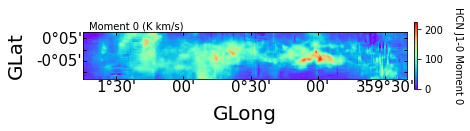

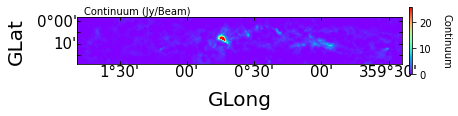

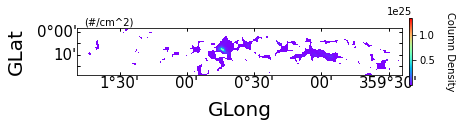

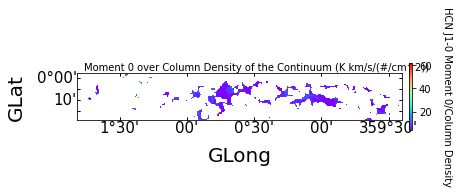

[74] [74] (155, 100)
<class 'float'> <class 'float'> 0.4


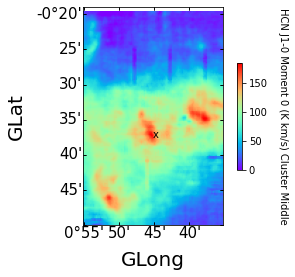

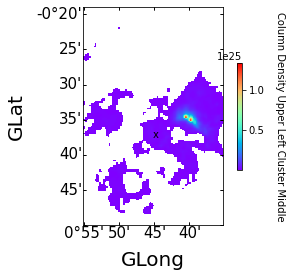

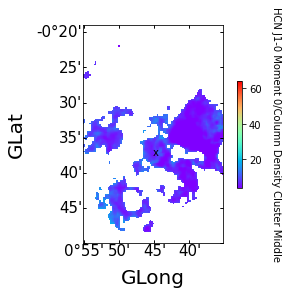

-5.606729551991791

88631847300.0 Hz
38.98800015444 arcsec 38.98800015444 arcsec
10.55599979032924 pix2
(830,)
33.745183269182775
(299,)
(299,) (299,)
[4.39453088 0.4657916 ] [[ 0.05497862 -0.00624173]
 [-0.00624173  0.00087468]] Size Linewidth All_structures:
a =  4.394530881577988 +- 0.23447520696852167
b =  0.4657916024650146 +- 0.029574997975741247
[7.62868403e+23 2.95363072e+00] [[ 2.41715201e+46 -1.07876748e+22]
 [-1.07876748e+22  4.83556671e-03]] Radius to Luminosity:
c =  7.62868403237827e+23 +- 1.5547192690096895e+23
d =  2.9536307224973477 +- 0.06953823917177857
(299,) (299,) (186,) (186,) (113,) (113,) <class 'numpy.ndarray'>
(57,) (57,)
[3.87038915 0.5388674 ] [[ 0.07899432 -0.00800114]
 [-0.00800114  0.00096931]] Size Linewidth Region of Interest:
a =  3.8703891527211183 +- 0.28105928735690533
b =  0.5388674040835526 +- 0.031133714271921402
[9.00258244e+23 2.87606197e+00] [[ 4.08880679e+46 -1.45725230e+22]
 [-1.45725230e+22  5.19757610e-03]] Radius to Luminosity  Region of

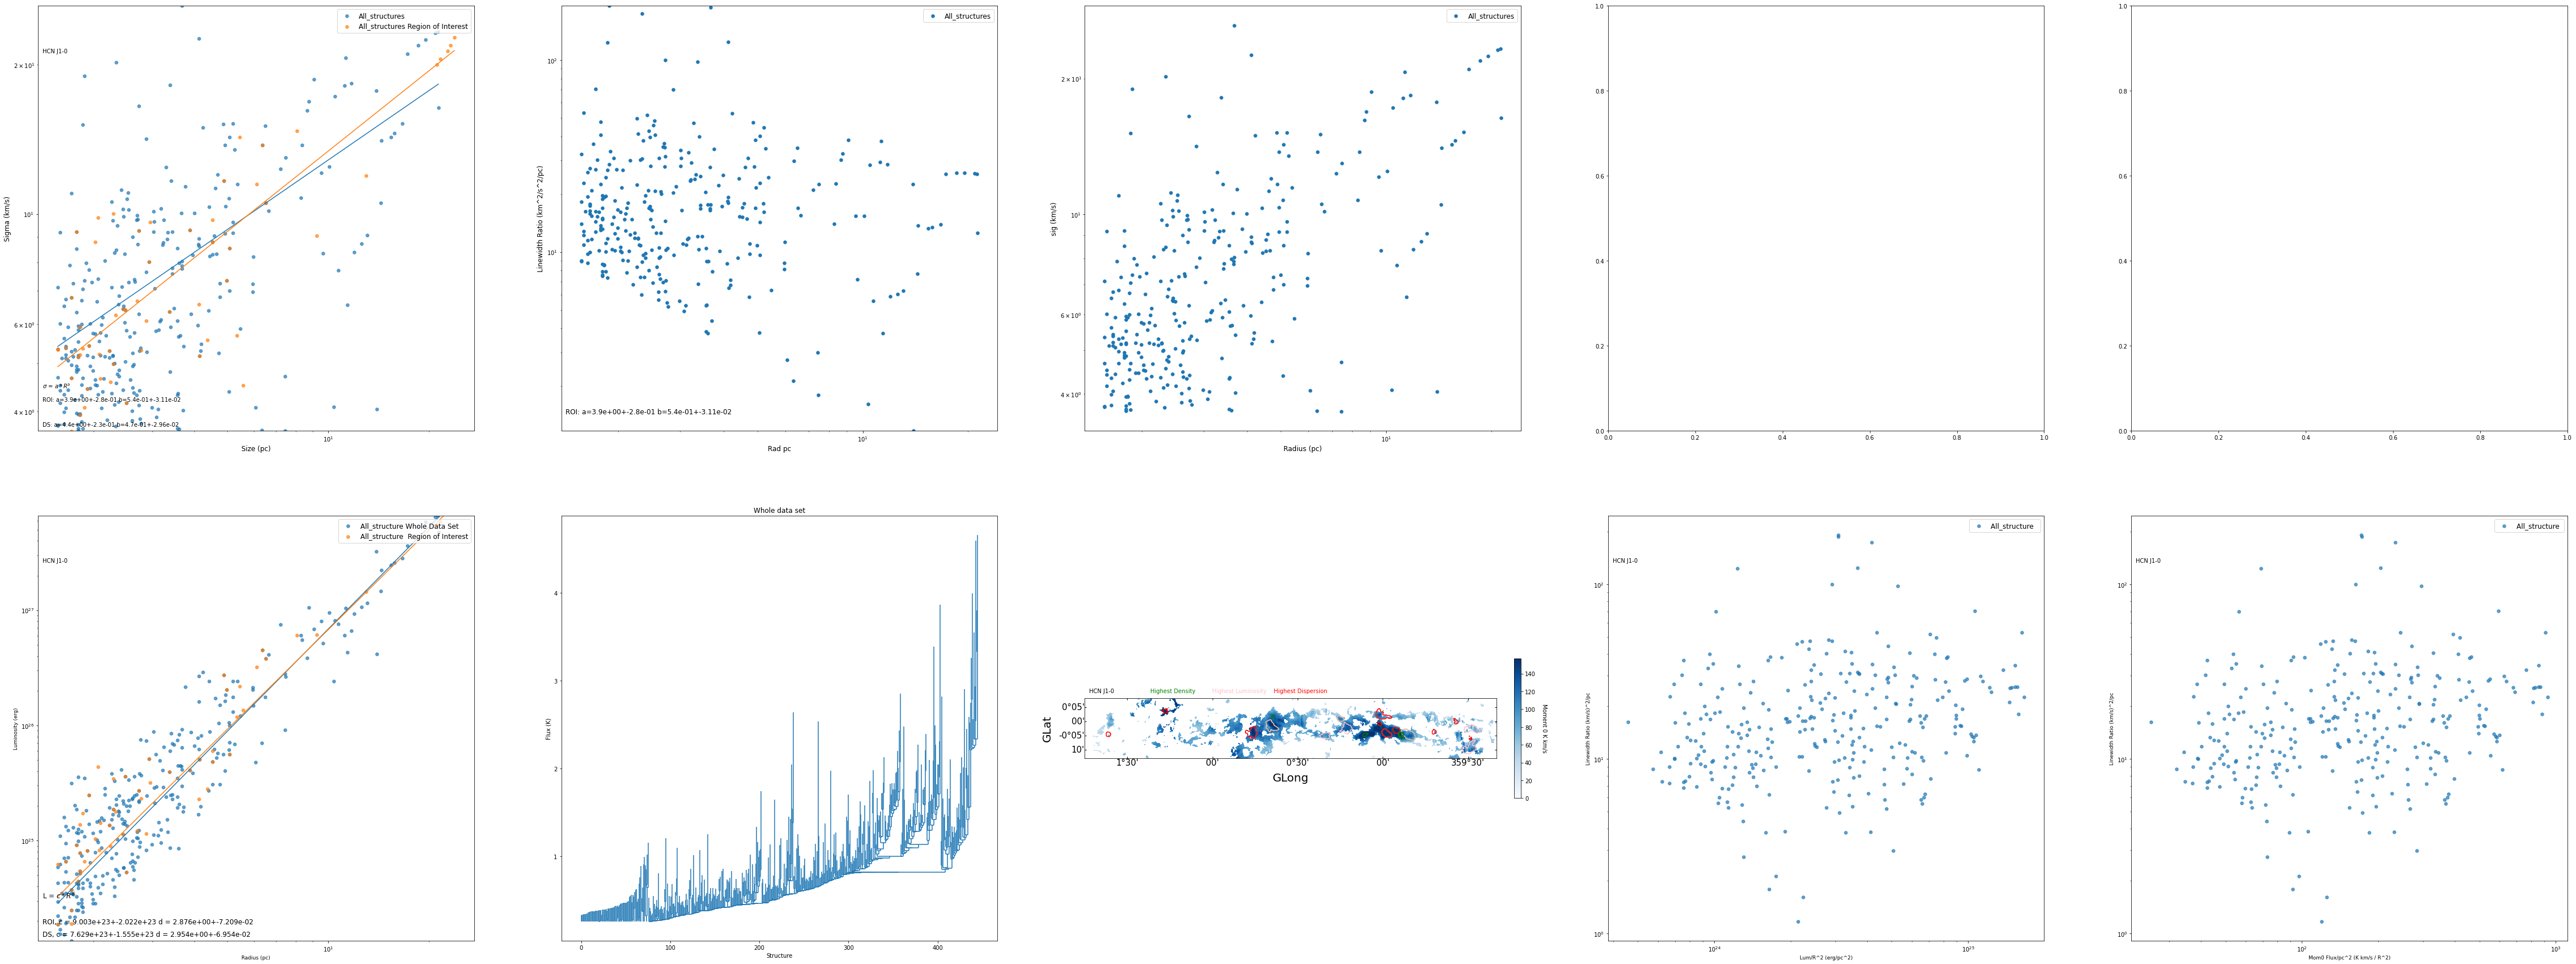

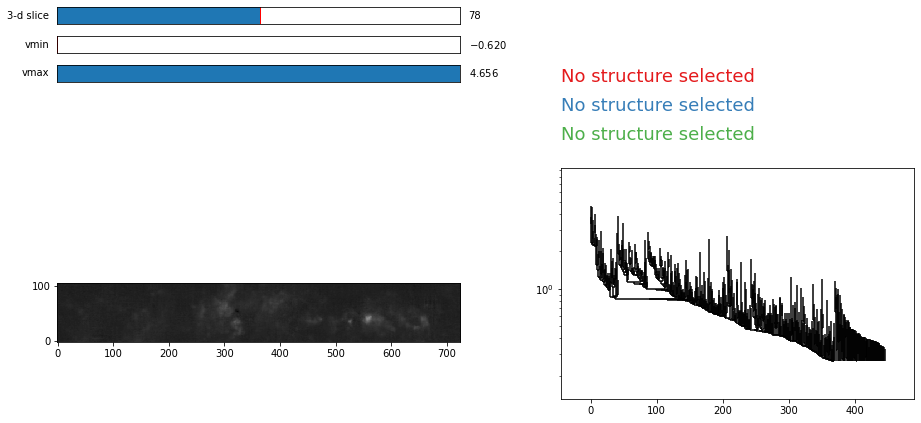

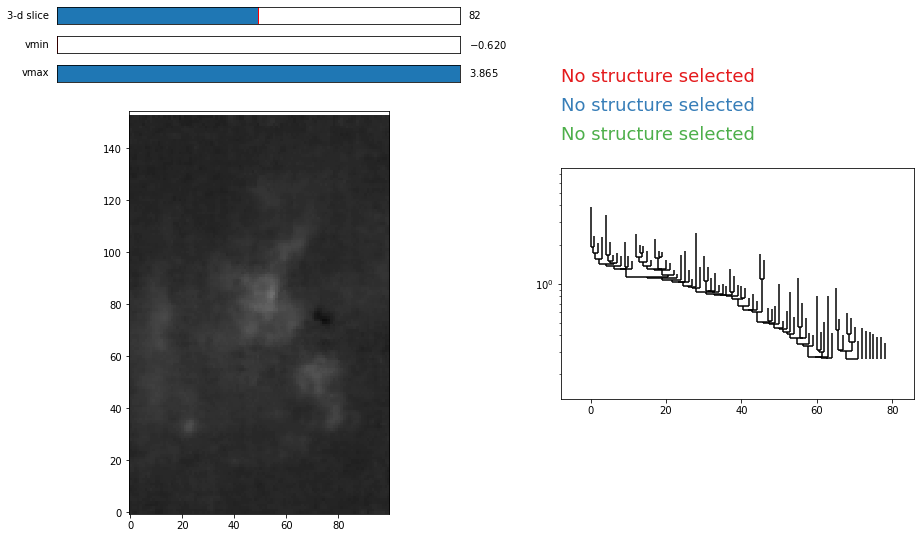

In [24]:
#Manual Contours and stuff

#HCN

###### HCN


Num = 1
Overlaps=0
Ram_Limiter = 1
Name = "HCN_1_0_Abs_CMZ"
name = "HCN_1_0_CM_Contours_DS_10_Abs_CMZ.jpeg"
LineN="HCN J1-0"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2


Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

np.save("Names_CMZ",Names)

print(Name)



path ='CMZ_3mm_HCN.fits'

#pathCont = 'CMZ_Continuum_Reproject.fits'

#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data_CMZ.npy')

Noises = np.load('Noises_K_CMZ.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image

#Put this up here for the column density map


pathCont = 'CMZ_Continuum_Splice.fits'
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
scContW = scCont[30:np.shape(scCont)[0]-30,20:np.shape(scCont)[1]-20] # Make a subcube
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = SpectralCube.read(path).downsample_axis(2,axis=0).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s).to(u.K)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat =np.copy( sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))

datn = dat[5:np.shape(dat)[0]-5,30:np.shape(dat)[1]-30,20:np.shape(dat)[2]-20] # Make a subcube
scF= scn[5:np.shape(dat)[0]-5,30:np.shape(scn)[1]-30,20:np.shape(scn)[2]-20] # Make a subcube

#Do the same thing to the continuum image

metadata = {}
metadata["Cwcs"] = scContW.wcs
print(np.shape(datn),np.shape(scContW))

try:
    #
    sssss=1
except:
    #
    sssss=1
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#For gaussian beam#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam

metadata['beam_area_ratioc']=beam_area_ratioc

metadata["arc_per_pix"]= abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
D_Es = np.load("Pixel_D.npy")*u.Mpc
#print(D_Es)
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_Es/u.Mpc


#Cubes with little dense gas and abs
'''
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))
'''
UL1 = SkyCoord('00d55m00s',  '-00d50m00s', frame='galactic')#These are away from the sources
UL2 = SkyCoord('00d35m00s','01d30m00s', frame='galactic')
scWCS = scF.wcs[:][:][0]
#scWCSNA = SCNA.wcs[:][:][0]
#moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
ROI = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
ROI_Line = Crop(scn,scn.wcs[:][:][0],UL1,UL2,5,False)
moment_0_ROI = ROI_Line.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 

moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot((LineN+" Moment 0"),"Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data)*.2,scCont.wcs,1,1,1,True)
#Make_Plot((LineN+" Moment 0"),"Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
#print(rmU[0][0])
######ratio

Np1 = SkyCoord('359d40m00s',  '00d04m00s', frame='galactic')#These are away from the sources
Np2 = SkyCoord('359d35m00s','00d08m00s', frame='galactic')
NraDP1 = [int(scContW.wcs.world_to_pixel(Np1)[0]),int(scContW.wcs.world_to_pixel(Np1)[1])]
NraDP2 = [int(scContW.wcs.world_to_pixel(Np2)[0]),int(scContW.wcs.world_to_pixel(Np2)[1])]
#print(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])
#if(str(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])))!=str(np.nan)):
#bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
bp = np.where(cSD<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_sub.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)
cSD[bp]=np.nan
rmU[bp]=np.nan
    #rmU[bp2]=np.nan

#print(cSD[0][0])

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",np.array(cSD*u.cm**2,dtype=type(.08)),float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot((LineN+" Moment 0/Column Density"),"Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)


#Region of interest in the cont

Find_Pixel_D(ROI.hdu.data,metadata,"Brightest_CD")

D_EROI = np.load("Brightest_CD.npy")*u.Mpc
pc_per_pixelcROI = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_EROI/u.Mpc

cSDROI = (Flux_to_Mass(ROI.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam,metadata,D_Name = "Brightest_CD.npy")/(pc_per_pixelcROI*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmROI=moment_0_ROI.hdu.data/cSDROI
rmUROI = rmROI*u.K*u.km/u.s#Just put back in the units
rmUROI = np.array(rmUROI /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all

######ratio
    
#bproi = np.where(cSDROI<=np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
bproi = np.where(cSDROI<=7*10**22/u.cm**2)
#bp2 = np.where( moment_0_ROI.hdu.data < m*.01)
#print(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.01)
cSDROI[bproi]=np.nan
rmUROI[bproi]=np.nan
#rmUROI[bp2]=np.nan

z,yf,xf = np.where(ROI_Line.hdu.data==np.nanmax(ROI_Line.hdu.data))
print(xf,yf,np.shape(ROI.hdu.data))
xf,yf = float(xf/np.shape(ROI.hdu.data)[1]),float(yf/np.shape(ROI.hdu.data)[0])
xf,yf = .5,.4
print(type(xf),type(.5),yf)
Make_Plot_Anno((LineN+" Moment 0 (K km/s) Cluster Middle"),"x",moment_0_ROI.hdu.data,0,np.nanmax(moment_0_ROI.hdu.data),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster Middle","x",np.array(cSDROI*u.cm**2,dtype=type(.08)),float(np.nanmin(cSDROI*u.cm**2)),float(np.nanmax(cSDROI*u.cm**2)),ROI.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno((LineN+" Moment 0/Column Density Cluster Middle"),"x",rmUROI,np.nanmean(rmUROI)*.5,abs(np.nanmean(rmUROI))*8,ROI.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))




header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
    print(freq)
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =scF[0][0][0].unit# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio =1.13309* metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] = np.sqrt(abs(header["CDELT1"])*u.degree**2*abs(header["CDELT2"]))
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*D_Es/u.Mpc)**2#mpc^2/pix^2

#print(area_res,type(area_res))
print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0



metadata["ARND"] = abs(header["CDELT1"])*abs(header["CDELT2"])








d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=beam_area_ratio.value) #The main culprit
#dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m,min_npix=beam_area_ratio.value) #The main culprit


dUL = astrodendro.Dendrogram.compute(ROI_Line.hdu.data,min_value=m*5,min_delta=m,min_npix=beam_area_ratio.value) #The main culprit



##Analyze dendograms
print(np.shape(d))




fig = plt.figure(1,figsize=(80,80))


axAlpha = pylab.subplot(5, 5, 7)


axGamma = pylab.subplot(5, 5, 9)




p=d.plotter()
p.plot_tree(axAlpha)
axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")

            
'''

p=dNA.plotter()
p.plot_tree(axBeta)
axBeta.set_xlabel("Structure")
axBeta.set_ylabel("Flux (K)")
axBeta.set_title("No absorption region")

'''
#p=dUL.plotter()
#p.plot_tree(axGamma)
#xGamma.set_xlabel("Structure")
#axGamma.set_ylabel("Flux (K)")
#axGamma.set_title("Region of Interest")
''''''

pc_per_pixel = abs(header["CDELT1"])/180*np.pi*D_Es/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
Rads,Sigmas,CD,Lumin ,SIDS,MOM0FLUX= Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)

#Plot contours for the top ten clusters


scCropped =scF.moment0().hdu.data
scCropped[np.where(scF.moment0().hdu.data<.22)]=np.nan
print(np.nanmean(np.nanstd(scF.moment0().hdu.data))*1)
scCropped[bp]=np.nan
axBeta = pylab.subplot(5,5,8,projection=scF.moment0().wcs)
#axBeta.imshow(scCropped.moment0().hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,norm=colors.LogNorm(vmin=5))
imBeta = axBeta.imshow(scCropped, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(scCropped)*.7 )



ColumnCon= np.concatenate((CD[0],CD[1]))
SIDScon = np.concatenate((SIDS[0],SIDS[1]))
#nth = 0#sorted(ColumnCon)[len(ColumnCon)-30]
nth = 0#sorted(CD[0])[len(CD[0])-10]
nth2 = 0#sorted(Lumin[0])[len(Lumin[0])-10]
nth3 = 0#sorted(Sigmas[0])[len(Sigmas[0])-10]
#top = np.where(CD[0]>=nth)
#print(list(top))
'''
for n in range(len(ColumnCon)):
    
    if(ColumnCon[n]>=nth):
        #print(n,SIDS[0])
        p.plot_contour(axBeta, structure=int(SIDScon[n]), lw=.1, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
'''
G1 = True
G2 = True
G3 = True
for n in range(len(CD[0])):
    
    if(CD[0][n]>=nth):
        #print(n,SIDS[0])
        if(G1):
            G1=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green',label="Higest Density")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Lumin[0][n]>=nth2):
        #print(n,SIDS[0])
        if(G2):
            G2=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink",label="Highest Luminosity (Leaves)")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink")
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Sigmas[0][n]>=nth3):
        #print(n,SIDS[0])
        if(G3):
            G3=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red',label="Highest Dispersion")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
   
  


RA = axBeta.coords[0]                                                                  # 
Dec = axBeta.coords[1]

RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
pylab.ylabel('GLat',fontsize=20,labelpad=1)
axBeta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=LineN,fontsize=10,xy=(.01,1.1),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.16,1.1),xycoords="axes fraction",c="green")  
pylab.annotate(s="Highest Luminosity",fontsize=10,xy=(.31,1.1),xycoords="axes fraction",c="pink")  
pylab.annotate(s="Highest Dispersion",fontsize=10,xy=(.46,1.1),xycoords="axes fraction",c="red")  

    
    
    
    
#RadsNA,SigmasNA,CDNA,LuminNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL = Dendro_Arrays(dUL,ROI_Line.hdu.data,vel,ROI.hdu.data,metadata)


#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)







    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)



xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])



LuminCon = np.concatenate((Lumin[0],Lumin[1]))

MOM0FLUXcon = np.concatenate((MOM0FLUX[0],MOM0FLUX[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])



#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)

radgpFORRAT = Rcon[gp2]*10**6
siggpFORRAT = Scon[gp2]


lumFORRAT = LuminCon[gp2]
mom0FORRAT = MOM0FLUXcon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]


print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))



print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))






ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)



print(np.shape(Rcon*10**6),np.shape(Scon),np.shape(Rads[0]*10**6),np.shape(Sigmas[0]),np.shape(Rads[1]*10**6),np.shape(Sigmas[1]),type(Rads[0]))
#xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(Rads[0]*10**6,Sigmas[0],s=30),ax2.scatter(Rads[1]*10**6,Sigmas[1],s=30)
xpcon = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30,alpha=.7)
#p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)
p = ax2.plot(xs,ysCon)

#pNA = ax2.plot(xsNA,ysNA)
#xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30,alpha=.7)

xpconhh = ax2.scatter(RconUL*10**6,SconUL,label="All_structures Region of Interest",s=30,alpha=.7)
xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])
p22 = ax2.plot(xsUL,ysUL)


st="DS: a="+ str(np.format_float_scientific(poptCon[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[0][0]),1))+" b="+str(np.format_float_scientific(poptCon[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")

st="ROI: a="+ str(np.format_float_scientific(poptUL[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[0][0]),1))+" b="+str(np.format_float_scientific(poptUL[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.07),xycoords="axes fraction")
ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)





xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)
#pF = ax3.plot(xsCD,ysCD)
#ax3.annotate(s=r'$\sigma^2/R$ = $e*N^f$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#st = "e = "+ str(np.format_float_scientific(CDpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[0][0]),3))+" f = "+str(np.format_float_scientific(CDpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[1][1]),3))

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad pc",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)
#pFLL = ax4.plot(xsRL,ysRL)

#st = "c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
#ax4.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#ax4.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
#ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")














LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
print(np.shape(radgpUL),np.shape(lgpUL))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth

print(poptUL,pcovUL,"Size Linewidth Region of Interest:")
print("a = ",poptUL[0],"+-",np.sqrt(pcovUL[0][0]))
print("b = ",poptUL[1],"+-",np.sqrt(pcovUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity  Region of Interest:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)








xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)
#xspLu2NA = ax7.scatter(radgpNA,lgpNA,label="All_structure Sparse Region",s=30,alpha=.7)
#pFLLu2NA = ax7.plot(xsRLNA,ysRLNA)

xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure  Region of Interest",s=30,alpha=.7)

pFLLu = ax7.plot(xsRLUL,ysRLUL)


st = "DS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.10),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")
st2 = "ROI, c = "+ str(np.format_float_scientific(RLpoptUL[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptUL[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[1][1]),3))
ax7.annotate(s=st2,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

#st3 = "SR, c = "+ str(np.format_float_scientific(RLpoptNA[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptNA[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[1][1]),3))
#ax7.annotate(s=st3,fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#print(FRs)



lum_rat = axGamma.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axGamma.set_yscale('log')
axGamma.set_xscale('log')
axGamma.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axGamma.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axGamma.legend(prop={'size': 12},loc="upper right")
axGamma.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)



#mom0_rat = axDelta.scatter(mom0FORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  Region of Interest",s=30,alpha=.7)
gp4=np.where(MOM0FLUXcon>0)
mom0FORFlux=MOM0FLUXcon[gp4]
radgpFORFlux=Rcon[gp4]*10**6
rgpFORFlux=Scon[gp4]**2/Rcon[gp4]/10**6
mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")

NameColROI = (Name+"_Column_ROI")
NameLumROI = (Name+"_Luminosities_ROI")
NameRROI = (NameR+"_ROI")
NameSROI = (NameS+"_ROI")
NameFlux = (Name+"Flux_Dense")
NameRFF = (Name+"Rad_For_Flux")

v1 = d.viewer()
v1.show()
v3 = dUL.viewer()
v3.show()

#np.save(NameCol,CD)
np.save(NameLum,Lumin)

np.save(NameS,Sigmas)
np.save(NameR,Rads) #Still in [leaves] [breanches] format

#np.save(NameColROI,CDUL)
np.save(NameLumROI,LuminUL)

np.save(NameSROI,SigmasUL)
np.save(NameRROI,RadsUL) #Still in [leaves] [breanches] format

np.save(NameFlux,mom0FORFlux/radgpFORFlux**2)
np.save(NameRFF,rgpFORFlux)



CO_3_2_Abs_CMZ
Fixed_Spliced_CO_V2.fits
0.6261983184086268
(139, 165, 765) (139, 165, 765)
(129, 105, 725) (105, 725)


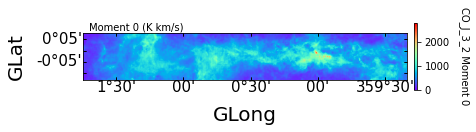

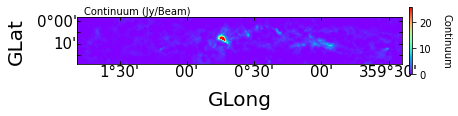


345795990000.0 Hz
B
{'Cwcs': WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-SIN'  'GLAT-SIN'  
CRVAL : 0.541666678728  -0.0416666712776  
CRPIX : 363.0  53.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00333333353753  0.00333333353753  
NAXIS : 725  105, 'beam_area_ratioc': <Quantity 2.30594067 pix2>, 'arc_per_pix': <Quantity 12.00000074 arcsec / pix>, 'wavelength': <Quantity 0.00086696 m>, 'data_unit': 'K', 'arc_per_pix_y': <Quantity 12.00000074 arcsec / pix>, 'arc_per_pix_x': <Quantity 12.00000074 arcsec / pix>, 'BMIN': <Quantity -0.00333333 deg>, 'BMAJ': <Quantity -0.00333333 deg>, 'beam_major': <Quantity -12.00000074 arcsec>, 'beam_minor': <Quantity -12.00000074 arcsec>, 'beam_area_ratio': <Quantity 1. pix2>}
1.0 pix2
(11531,)
[-233.44650848 -229.82279333 -226.19907819 -222.57536305 -218.95164791
 -215.32793277 -211.70421763 -208.08050249 -204.45678735 -200.83307221
 -197.20935707 -193.58564192 -189.96192678 -186.33821164 -182.7144965
 -179.09078136 -175.46

TypeError: data_unit should be an instance of UnitBase or Quantity

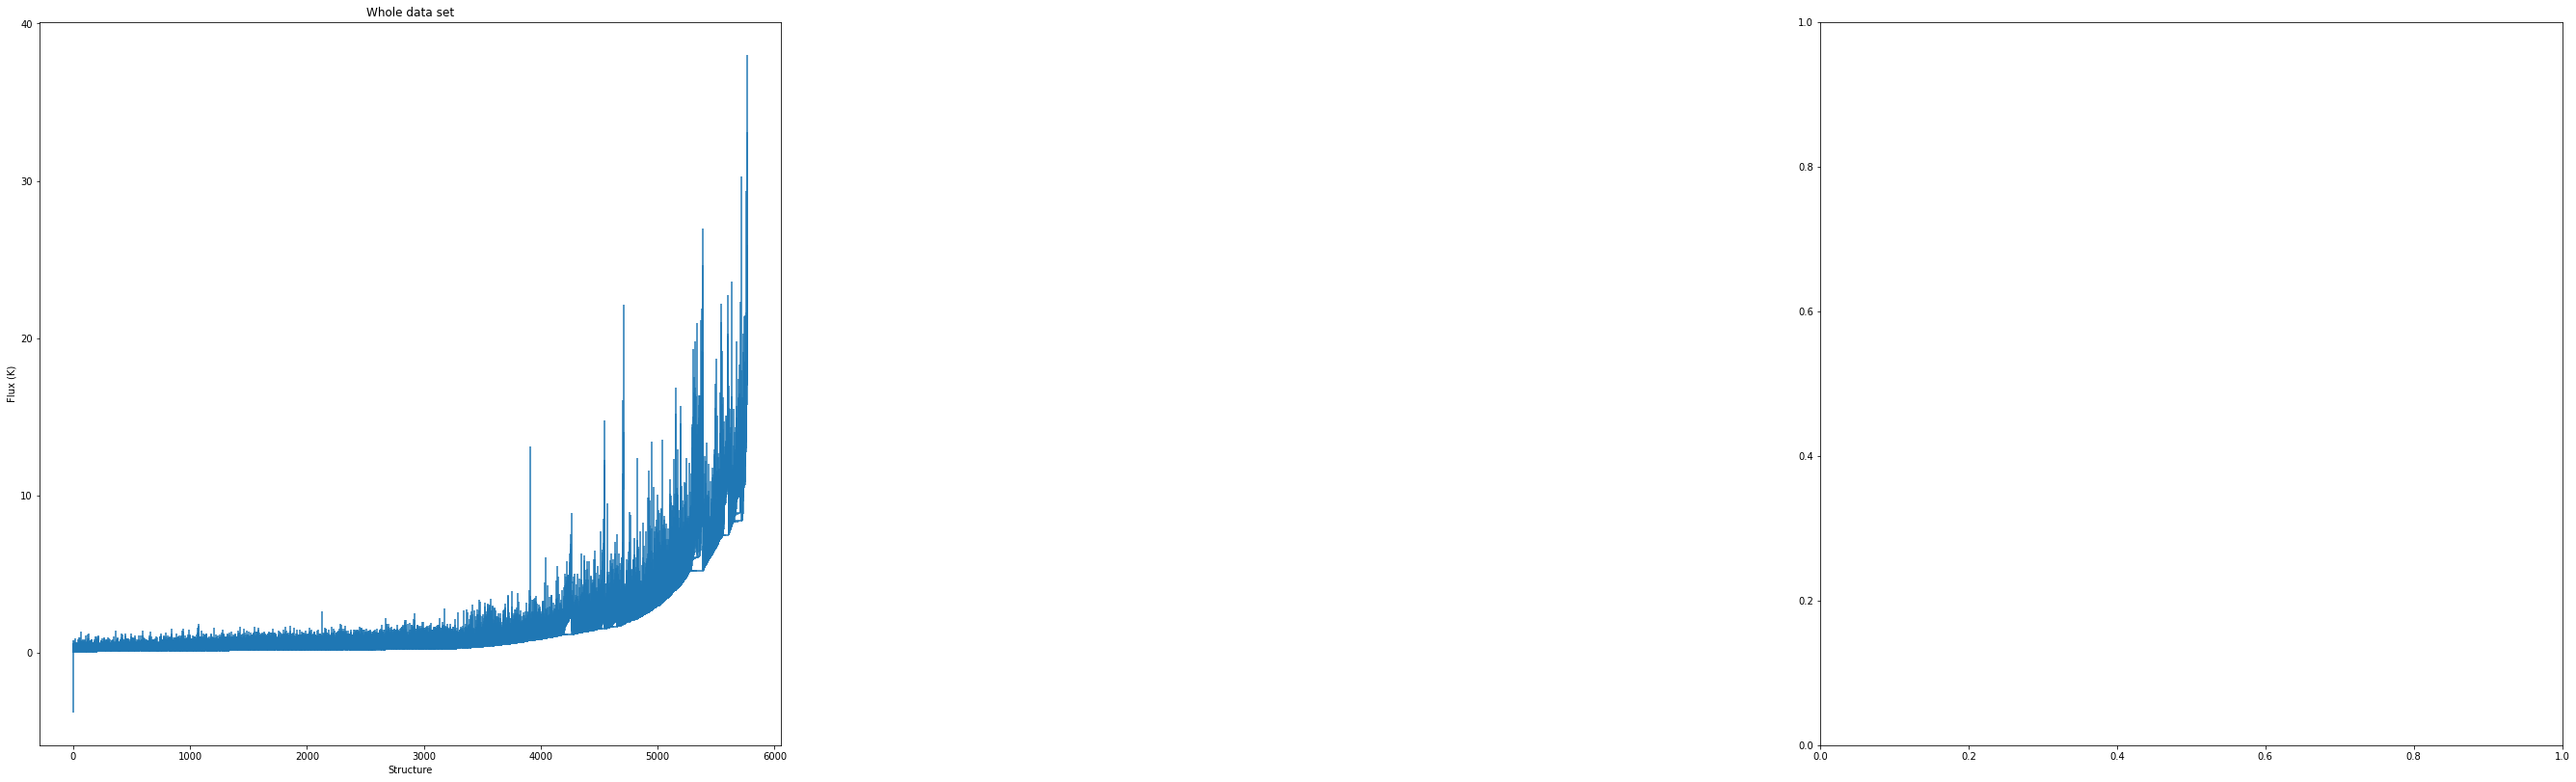

In [14]:
#Manual Contours and stuff

#co32

###### co32



Num = 4
Overlaps=0
Ram_Limiter = 1
Name = "CO_3_2_Abs_CMZ"
name = "CO_3_2_CM_Contours_DS_10_Abs_CMZ.jpeg"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2
LineN="CO_J_3_2"

Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

np.save("Names_CMZ",Names)

print(Name)



#path ="12CO_GC_359-000_mosaic.fit"
path ="Fixed_Spliced_CO_V2.fits"
#pathCont = 'CMZ_Continuum_Reproject.fits'

#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data_CMZ.npy')

Noises = np.load('Noises_K_CMZ.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image

#Put this up here for the column density map


pathCont = 'CMZ_Continuum_Splice.fits'
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
scContW = scCont[30:np.shape(scCont)[0]-30,20:np.shape(scCont)[1]-20] # Make a subcube
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = SpectralCube.read(path)
Q.allow_huge_operations=True
Q = Q.downsample_axis(2,axis=0).with_spectral_unit(u.km/u.s,velocity_convention="radio").spectral_slab(-250. *u.km / u.s, 250. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat =np.copy( sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))

datn = dat[5:np.shape(dat)[0]-5,30:np.shape(dat)[1]-30,20:np.shape(dat)[2]-20] # Make a subcube
scF= scn[5:np.shape(dat)[0]-5,30:np.shape(scn)[1]-30,20:np.shape(scn)[2]-20] # Make a subcube

#Do the same thing to the continuum image

metadata = {}
metadata["Cwcs"] = scContW.wcs
print(np.shape(datn),np.shape(scContW))

try:
    #
    sssss=1
except:
    #
    sssss=1
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#For gaussian beam#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam

metadata['beam_area_ratioc']=beam_area_ratioc

metadata["arc_per_pix"]= abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
D_Es = np.load("Pixel_D.npy")*u.Mpc
#print(D_Es)
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*D_Es/u.Mpc


#Cubes with little dense gas and abs
'''
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))
'''
UL1 = SkyCoord('00d55m00s',  '-00d50m00s', frame='galactic')#These are away from the sources
UL2 = SkyCoord('00d35m00s','01d30m00s', frame='galactic')
scWCS = scF.wcs[:][:][0]
#scWCSNA = SCNA.wcs[:][:][0]
#moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
ROI = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
ROI_Line = Crop(scn,scn.wcs[:][:][0],UL1,UL2,5,False)
moment_0_ROI = ROI_Line.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 

moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot((LineN+" Moment 0"),"Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data)*.2,scCont.wcs,1,1,1,True)
#Make_Plot((LineN+" Moment 0"),"Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


######ratio

Np1 = SkyCoord('359d40m00s',  '00d04m00s', frame='galactic')#These are away from the sources
Np2 = SkyCoord('359d35m00s','00d08m00s', frame='galactic')
NraDP1 = [int(scContW.wcs.world_to_pixel(Np1)[0]),int(scContW.wcs.world_to_pixel(Np1)[1])]
NraDP2 = [int(scContW.wcs.world_to_pixel(Np2)[0]),int(scContW.wcs.world_to_pixel(Np2)[1])]
#print(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])
#if(str(np.nanmean((cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50])))!=str(np.nan)):
#bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50]))*.001)

#print(cSD[0][0])


header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
    print(freq)
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix
try:

    metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
    metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
    beam_area_ratio =1.13309* metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
    metadata['beam_area_ratio']=beam_area_ratio
    print("A")
except:

    metadata['BMIN']=header["CDELT1"]*u.deg
    metadata['BMAJ']=header["CDELT1"]*u.deg
    metadata['beam_major'] =  metadata["BMAJ"]*3600.0 * u.arcsec/u.deg
    metadata['beam_minor'] =metadata["BMIN"]*3600.0 * u.arcsec/u.deg
    beam_area_ratio = 1*u.pix**2
    metadata['beam_area_ratio']=beam_area_ratio
    print("B")
    
print(metadata)


metadata['spatial_scale'] = np.sqrt(abs(header["CDELT1"])*u.degree**2*abs(header["CDELT2"]))
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*D_Es/u.Mpc)**2#mpc^2/pix^2

#print(area_res,type(area_res))

print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0



metadata["ARND"] = abs(header["CDELT1"])*abs(header["CDELT2"])








d = astrodendro.Dendrogram.compute(datn,min_npix=beam_area_ratio.value) #The main culprit
#dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m,min_npix=beam_area_ratio.value) #The main culprit






##Analyze dendograms
print(np.shape(d))




fig = plt.figure(1,figsize=(80,80))


axAlpha = pylab.subplot(5, 5, 7)


axGamma = pylab.subplot(5, 5, 9)




p=d.plotter()
p.plot_tree(axAlpha)
axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")

            
'''

p=dNA.plotter()
p.plot_tree(axBeta)
axBeta.set_xlabel("Structure")
axBeta.set_ylabel("Flux (K)")
axBeta.set_title("No absorption region")

'''
#p=dUL.plotter()
#p.plot_tree(axGamma)
#xGamma.set_xlabel("Structure")
#axGamma.set_ylabel("Flux (K)")
#axGamma.set_title("Region of Interest")
''''''

pc_per_pixel = abs(header["CDELT1"])/180*np.pi*D_Es/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
print(vel)
Rads,Sigmas,CD,Lumin ,SIDS,MOM0FLUX= Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata,False)

#Plot contours for the top ten clusters


scCropped =scF.moment0().hdu.data
scCropped[np.where(scF.moment0().hdu.data<.22)]=np.nan
print(np.nanmean(np.nanstd(scF.moment0().hdu.data))*1)
scCropped[bp]=np.nan
axBeta = pylab.subplot(5,5,8,projection=scF.moment0().wcs)
#axBeta.imshow(scCropped.moment0().hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,norm=colors.LogNorm(vmin=5))
imBeta = axBeta.imshow(scCropped, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(scCropped)*.7 )



ColumnCon= np.concatenate((CD[0],CD[1]))
SIDScon = np.concatenate((SIDS[0],SIDS[1]))
#nth = 0#sorted(ColumnCon)[len(ColumnCon)-30]
nth = 0#sorted(CD[0])[len(CD[0])-1]
nth2 = 0#sorted(Lumin[0])[len(Lumin[0])-1]
nth3 = 0#sorted(Sigmas[0])[len(Sigmas[0])-1]
#top = np.where(CD[0]>=nth)
#print(list(top))
'''
for n in range(len(ColumnCon)):
    
    if(ColumnCon[n]>=nth):
        #print(n,SIDS[0])
        p.plot_contour(axBeta, structure=int(SIDScon[n]), lw=.1, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
'''
G1 = True
G2 = True
G3 = True
for n in range(len(CD[0])):
    
    if(CD[0][n]>=nth):
        #print(n,SIDS[0])
        if(G1):
            G1=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green',label="Higest Density")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=1, colors='green')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Lumin[0][n]>=nth2):
        #print(n,SIDS[0])
        if(G2):
            G2=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink",label="Highest Luminosity (Leaves)")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=2, colors="pink")
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
    if(Sigmas[0][n]>=nth3):
        #print(n,SIDS[0])
        if(G3):
            G3=False
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red',label="Highest Dispersion")
        else:
            p.plot_contour(axBeta, structure=int(SIDS[0][n]), lw=3, colors='red')
        #NOT USING LEAVSE FOR STRUCTURES, USING ALL STRUCTURES
        #solved?
   
  


RA = axBeta.coords[0]                                                                  # 
Dec = axBeta.coords[1]

RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('GLong',fontsize=20,labelpad=1)                               
pylab.ylabel('GLat',fontsize=20,labelpad=1)
axBeta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=LineN,fontsize=10,xy=(.01,1.1),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.16,1.1),xycoords="axes fraction",c="green")  
pylab.annotate(s="Highest Luminosity",fontsize=10,xy=(.31,1.1),xycoords="axes fraction",c="pink")  
pylab.annotate(s="Highest Dispersion",fontsize=10,xy=(.46,1.1),xycoords="axes fraction",c="red")  

    
    
    
    
#RadsNA,SigmasNA,CDNA,LuminNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL = Rads,Sigmas,CD,Lumin ,SIDS,MOM0FLUX


#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)







    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)



xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])



LuminCon = np.concatenate((Lumin[0],Lumin[1]))

MOM0FLUXcon = np.concatenate((MOM0FLUX[0],MOM0FLUX[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])



#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)

radgpFORRAT = Rcon[gp2]*10**6
siggpFORRAT = Scon[gp2]


lumFORRAT = LuminCon[gp2]
mom0FORRAT = MOM0FLUXcon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]


print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))



print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))






ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)



print(np.shape(Rcon*10**6),np.shape(Scon),np.shape(Rads[0]*10**6),np.shape(Sigmas[0]),np.shape(Rads[1]*10**6),np.shape(Sigmas[1]),type(Rads[0]))
#xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(Rads[0]*10**6,Sigmas[0],s=30),ax2.scatter(Rads[1]*10**6,Sigmas[1],s=30)
xpcon = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30,alpha=.7)
#p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)
p = ax2.plot(xs,ysCon)

#pNA = ax2.plot(xsNA,ysNA)
#xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30,alpha=.7)

xpconhh = ax2.scatter(RconUL*10**6,SconUL,label="All_structures Region of Interest",s=30,alpha=.7)
xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])
p22 = ax2.plot(xsUL,ysUL)


st="DS: a="+ str(np.format_float_scientific(poptCon[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[0][0]),1))+" b="+str(np.format_float_scientific(poptCon[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")

st="ROI: a="+ str(np.format_float_scientific(poptUL[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[0][0]),1))+" b="+str(np.format_float_scientific(poptUL[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.07),xycoords="axes fraction")
ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)





xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)
#pF = ax3.plot(xsCD,ysCD)
#ax3.annotate(s=r'$\sigma^2/R$ = $e*N^f$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#st = "e = "+ str(np.format_float_scientific(CDpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[0][0]),3))+" f = "+str(np.format_float_scientific(CDpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(CDpcov[1][1]),3))

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad pc",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)
#pFLL = ax4.plot(xsRL,ysRL)

#st = "c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
#ax4.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")
#ax4.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
#ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")














LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
print(np.shape(radgpUL),np.shape(lgpUL))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth

print(poptUL,pcovUL,"Size Linewidth Region of Interest:")
print("a = ",poptUL[0],"+-",np.sqrt(pcovUL[0][0]))
print("b = ",poptUL[1],"+-",np.sqrt(pcovUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity  Region of Interest:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)








xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)
#xspLu2NA = ax7.scatter(radgpNA,lgpNA,label="All_structure Sparse Region",s=30,alpha=.7)
#pFLLu2NA = ax7.plot(xsRLNA,ysRLNA)

xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure  Region of Interest",s=30,alpha=.7)

pFLLu = ax7.plot(xsRLUL,ysRLUL)


st = "DS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.10),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")
st2 = "ROI, c = "+ str(np.format_float_scientific(RLpoptUL[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptUL[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[1][1]),3))
ax7.annotate(s=st2,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

#st3 = "SR, c = "+ str(np.format_float_scientific(RLpoptNA[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptNA[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[1][1]),3))
#ax7.annotate(s=st3,fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#print(FRs)



lum_rat = axGamma.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axGamma.set_yscale('log')
axGamma.set_xscale('log')
axGamma.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axGamma.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axGamma.legend(prop={'size': 12},loc="upper right")
axGamma.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)



#mom0_rat = axDelta.scatter(mom0FORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  Region of Interest",s=30,alpha=.7)
gp4=np.where(MOM0FLUXcon>0)
mom0FORFlux=MOM0FLUXcon[gp4]
radgpFORFlux=Rcon[gp4]*10**6
rgpFORFlux=Scon[gp4]**2/Rcon[gp4]/10**6
mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")

NameColROI = (Name+"_Column_ROI")
NameLumROI = (Name+"_Luminosities_ROI")
NameRROI = (NameR+"_ROI")
NameSROI = (NameS+"_ROI")
NameFlux = (Name+"Flux_Dense")
NameRFF = (Name+"Rad_For_Flux")

v1 = d.viewer()
v1.show()
v3 = dUL.viewer()
v3.show()

#np.save(NameCol,CD)
np.save(NameLum,Lumin)

np.save(NameS,Sigmas)
np.save(NameR,Rads) #Still in [leaves] [breanches] format

#np.save(NameColROI,CDUL)
np.save(NameLumROI,LuminUL)

np.save(NameSROI,SigmasUL)
np.save(NameRROI,RadsUL) #Still in [leaves] [breanches] format

np.save(NameFlux,mom0FORFlux/radgpFORFlux**2)
np.save(NameRFF,rgpFORFlux)

